<a href="https://colab.research.google.com/github/Sahar-Sheikhi/Waste-image-Classification-Computer-Vision-/blob/main/waste_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
# Import images from a zip file
!unzip /content/waste_images.zip
# !unzip waste_images.zip

# Remove the zip file
!rm /content/waste_images.zip

# Import necessary Libraries

In [ ]:
# Import libraries
import os
import cv2
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from keras.preprocessing.image import load_img # Import the necessary function
import random
from tqdm import tqdm
import glob
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import random
import matplotlib.pyplot as plt
import seaborn as sns



# View Classes

In [ ]:
# Path to the data set directory
dataset_path = '/content/waste_images'

# List Classes excluding hidden directories
classes = [category for category in os.listdir(dataset_path) if not category.startswith('.')]
print("Classes:")
print(classes)

Classes:
['cardboard', 'paper', 'metal', 'glass', 'plastic', 'trash']


# Dataset Representation

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import pandas as pd

image_paths = {}
num_of_all_images = 0
for cat in classes:
    image_paths[cat] = os.listdir(os.path.join('./waste_images',cat))
    print('There are', len(os.listdir(os.path.join('./waste_images',cat))),
          cat,'images' )
    num_of_all_images += len(os.listdir(os.path.join('./waste_images',cat)))
print('____________________________\nNumber of all images: ',num_of_all_images)

There are 137 trash images
There are 482 plastic images
There are 403 cardboard images
There are 410 metal images
There are 594 paper images
There are 501 glass images
____________________________
Number of all images:  2527


# Data Balance Check

['trash', 'plastic', 'paper', 'glass', 'cardboard', 'metal']
There are 137 trash images
There are 482 plastic images
There are 594 paper images
There are 501 glass images
There are 403 cardboard images
There are 410 metal images
____________________________
Number of all images:  2527


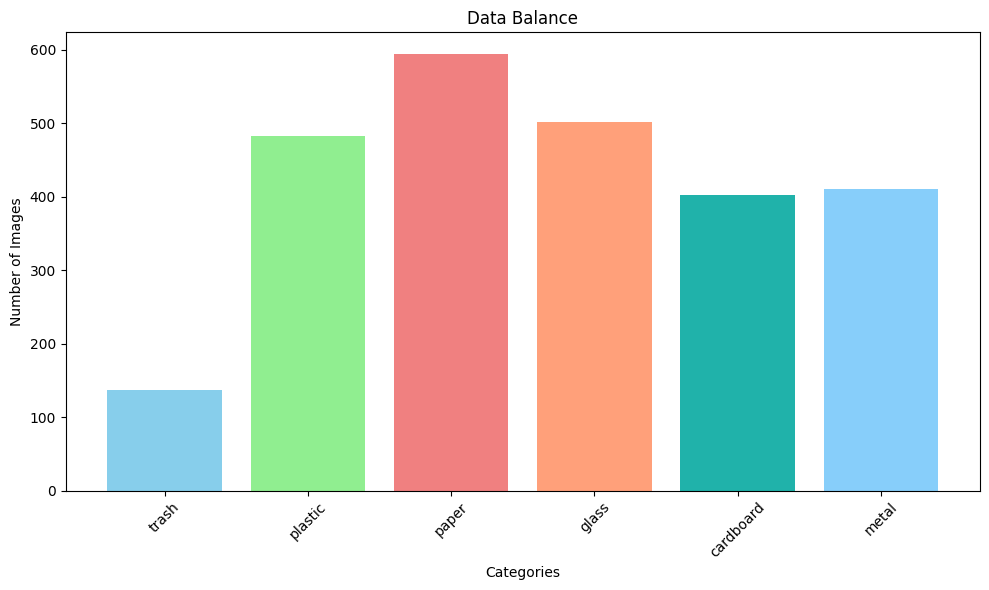

In [ ]:
# CHECK DATA BALANCE

# Specify the path to the data set directory
dataset_path = '/content/waste_images'

# List categories excluding hidden directories
classes = [category for category in os.listdir(dataset_path) if not category.startswith('.')]
print(classes)

image_paths = {}
num_of_all_images = 0
class_counts = []

for cat in classes:
    image_paths[cat] = os.listdir(os.path.join(dataset_path, cat))
    num_images = len(image_paths[cat])
    class_counts.append(num_images)
    print(f'There are {num_images} {cat} images')
    num_of_all_images += num_images

print('____________________________\nNumber of all images: ', num_of_all_images)

# Define colors for each category
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightseagreen', 'lightskyblue']

# Plotting the balance of data with different colors
plt.figure(figsize=(10, 6))
plt.bar(classes, class_counts, color=colors)
plt.xlabel('Categories')
plt.ylabel('Number of Images')
plt.title('Data Balance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Data Balance

['cardboard', 'paper', 'metal', 'glass', 'plastic', 'trash']
There are 403 cardboard images
There are 594 paper images
There are 410 metal images
There are 501 glass images
There are 482 plastic images
There are 137 trash images
____________________________
Number of all images:  2527


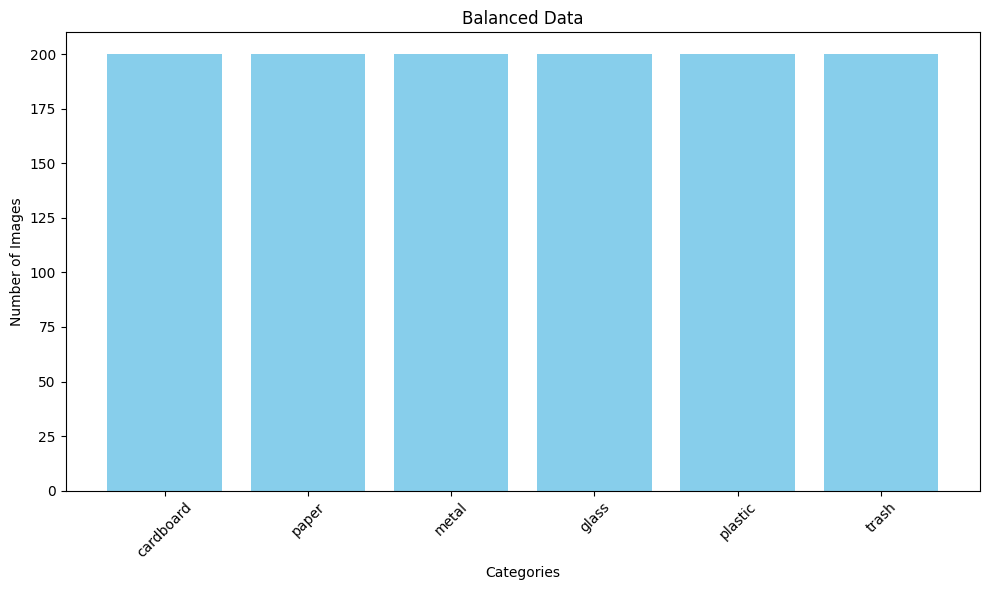


Number of images per category after balancing:
cardboard: 200
paper: 200
metal: 200
glass: 200
plastic: 200
trash: 200
Balanced data saved to /content/dataset_balanced.csv


In [ ]:
# BALANCING THE DATA

# Specify the path to the data set directory
dataset_path = '/content/waste_images'

# List categories excluding hidden directories
classes = [category for category in os.listdir(dataset_path) if not category.startswith('.')]
print(classes)

image_paths = {}
num_of_all_images = 0
class_counts = []

for cat in classes:
    image_paths[cat] = os.listdir(os.path.join(dataset_path, cat))
    num_images = len(image_paths[cat])
    class_counts.append(num_images)
    print(f'There are {num_images} {cat} images')
    num_of_all_images += num_images

print('____________________________\nNumber of all images: ', num_of_all_images)

# Balance data to ? images per class
target_num_images = 200
balanced_image_paths = {}

for cat in classes:
    images = image_paths[cat]
    if len(images) < target_num_images:
        # Oversample (randomly select with replacement)
        balanced_images = random.choices(images, k=target_num_images)
    else:
        # Undersample (randomly select 500 images)
        balanced_images = random.sample(images, target_num_images)

    balanced_image_paths[cat] = balanced_images

# Plotting the balance of data after balancing
balanced_class_counts = [len(balanced_image_paths[cat]) for cat in classes]

plt.figure(figsize=(10, 6))
plt.bar(classes, balanced_class_counts, color='skyblue')
plt.xlabel('Categories')
plt.ylabel('Number of Images')
plt.title('Balanced Data')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Optionally, you can print the number of images per category after balancing
print('\nNumber of images per category after balancing:')
for cat in classes:
    print(f'{cat}: {len(balanced_image_paths[cat])}')

# Save balanced dataset to CSV
balanced_data = []

for cat in classes:
    for img in balanced_image_paths[cat]:
        balanced_data.append({'image_path': os.path.join(cat, img), 'label': cat})

balanced_df = pd.DataFrame(balanced_data)

balanced_csv_path = '/content/dataset_balanced.csv'
balanced_df.to_csv(balanced_csv_path, index=False)

print(f'Balanced data saved to {balanced_csv_path}')


#  inspect random images

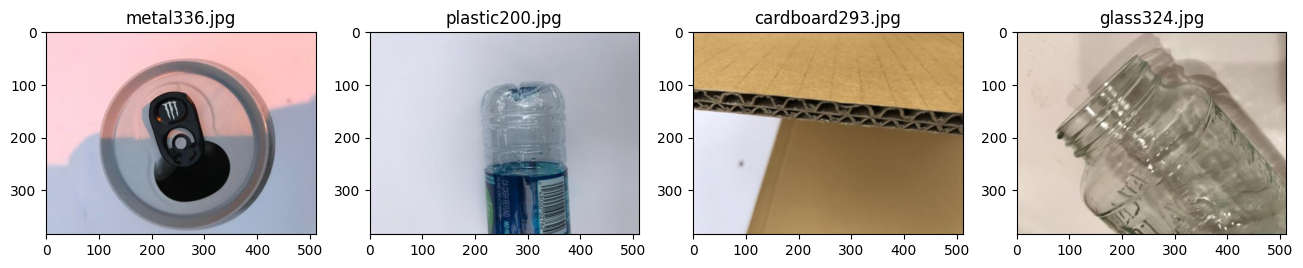

In [ ]:

fig, axs = plt.subplots(1,4, figsize=(16,4))

for ax in axs:
    # choose a random category
    cat = np.random.choice(classes)

    # choose a random image in that category
    file_name = np.random.choice(os.listdir(os.path.join('./waste_images',cat)))

    # load and display the image
    img = load_img(os.path.join('./waste_images',cat,file_name))
    ax.imshow(img)
    ax.set_title(file_name)

# Normalization

In [ ]:
# Specify the path to the balanced dataset CSV file
balanced_csv_path = '/content/dataset_balanced.csv'

# Load the balanced dataset CSV
balanced_df = pd.read_csv(balanced_csv_path)

# Iterate through each row in the CSV
for index, row in balanced_df.iterrows():
    image_path = os.path.join(dataset_path, row['image_path'])

    # Load the image
    image = cv2.imread(image_path)

    if image is None:
        print(f"Error: Could not read image at {image_path}")
        continue

    # Normalize the image
    normalized_image = image.astype(np.float32) / 255.0

    # Save or overwrite the normalized image
    cv2.imwrite(image_path, normalized_image * 255)  # Ensure saving as integer values

    print(f"Normalized image: {row['image_path']}")

print("Normalization completed.")


Normalized image: glass/glass363.jpg
Normalized image: glass/glass149.jpg
Normalized image: glass/glass462.jpg
Normalized image: glass/glass22.jpg
Normalized image: glass/glass460.jpg
Normalized image: glass/glass376.jpg
Normalized image: glass/glass405.jpg
Normalized image: glass/glass365.jpg
Normalized image: glass/glass61.jpg
Normalized image: glass/glass13.jpg
Normalized image: glass/glass28.jpg
Normalized image: glass/glass69.jpg
Normalized image: glass/glass6.jpg
Normalized image: glass/glass346.jpg
Normalized image: glass/glass182.jpg
Normalized image: glass/glass231.jpg
Normalized image: glass/glass455.jpg
Normalized image: glass/glass282.jpg
Normalized image: glass/glass293.jpg
Normalized image: glass/glass493.jpg
Normalized image: glass/glass99.jpg
Normalized image: glass/glass50.jpg
Normalized image: glass/glass214.jpg
Normalized image: glass/glass94.jpg
Normalized image: glass/glass82.jpg
Normalized image: glass/glass52.jpg
Normalized image: glass/glass331.jpg
Normalized im

# SPLITTING THE DATA

In [ ]:


import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.xception import preprocess_input, Xception
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tqdm import tqdm

# Load balanced dataset CSV
balanced_csv = '/content/dataset_balanced.csv'
df = pd.read_csv(balanced_csv)

# Define number of images for train, val, test
num_train_images = 1000
num_val_images = 100
num_test_images = 100

# Ensure we have enough data for the split
total_images = num_train_images + num_val_images + num_test_images
assert len(df) >= total_images, f"Not enough images ({len(df)}) to split as requested."

# Shuffle the dataframe
df = df.sample(frac=1).reset_index(drop=True)

# Split dataset into train, val, test
train_df = df[:num_train_images]
val_df = df[num_train_images:num_train_images + num_val_images]
test_df = df[num_train_images + num_val_images:num_train_images + num_val_images + num_test_images]

# Save split datasets as CSVs
train_csv = '/content/train.csv'
val_csv = '/content/val.csv'
test_csv = '/content/test.csv'

train_df.to_csv(train_csv, index=False)
val_df.to_csv(val_csv, index=False)
test_df.to_csv(test_csv, index=False)

# Report number of images in each set
print(f"Number of images in train set: {len(train_df)}")
print(f"Number of images in validation set: {len(val_df)}")
print(f"Number of images in test set: {len(test_df)}")
print("Data split and saved successfully.")


Number of images in train set: 1000
Number of images in validation set: 100
Number of images in test set: 100
Data split and saved successfully.


# **XCEPT**

In [ ]:
# Specify paths
train_csv = '/content/train.csv'
val_csv = '/content/val.csv'
test_csv = '/content/test.csv'
dataset_path = '/content/waste_images'  # Adjust this to your dataset path

# Load CSV files
train_df = pd.read_csv(train_csv)
val_df = pd.read_csv(val_csv)
test_df = pd.read_csv(test_csv)

# Extract image paths and labels
train_paths, train_labels = train_df['image_path'].values, train_df['label'].values
val_paths, val_labels = val_df['image_path'].values, val_df['label'].values
test_paths, test_labels = test_df['image_path'].values, test_df['label'].values

# Encode labels
label_encoder = LabelEncoder()
train_labels_enc = label_encoder.fit_transform(train_labels)
val_labels_enc = label_encoder.transform(val_labels)
test_labels_enc = label_encoder.transform(test_labels)

# Parameters
batch_size = 32
image_size = (224, 224)

# Function to preprocess images
def load_preprocess_image(image_path, label):
    image_path_str = image_path.numpy().decode('utf-8')  # Decode the bytes to string
    img = load_img(os.path.join(dataset_path, image_path_str), target_size=image_size)
    img_array = img_to_array(img)
    img_array = preprocess_input(img_array)
    return img_array, label

def wrap_load_preprocess_image(image_path, label):
    img, label = tf.py_function(load_preprocess_image, [image_path, label], [tf.float32, tf.int64])
    img.set_shape((299, 299, 3))
    label.set_shape(())
    return img, label

# Create tf.data.Dataset objects
def create_dataset(paths, labels, batch_size, is_training=False):
    dataset = tf.data.Dataset.from_tensor_slices((paths, labels))
    dataset = dataset.map(wrap_load_preprocess_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    if is_training:
        dataset = dataset.shuffle(buffer_size=len(paths)).repeat()
    dataset = dataset.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)
    return dataset

train_dataset = create_dataset(train_paths, train_labels_enc, batch_size, is_training=True)
val_dataset = create_dataset(val_paths, val_labels_enc, batch_size, is_training=False)
test_dataset = create_dataset(test_paths, test_labels_enc, batch_size, is_training=False)

# Build and Compile the Xception Model
base_model = Xception(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(np.unique(train_labels)), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Custom tqdm callback for progress visualization
class TQDMCallback(tf.keras.callbacks.Callback):
    def __init__(self, epochs):
        self.epochs = epochs

    def on_epoch_begin(self, epoch, logs=None):
        self.epoch_pbar = tqdm(total=self.params['steps'], desc=f'Epoch {epoch + 1}/{self.epochs}', position=0)

    def on_epoch_end(self, epoch, logs=None):
        self.epoch_pbar.close()

    def on_batch_end(self, batch, logs=None):
        self.epoch_pbar.update(1)

# Train the model with tqdm integration
tqdm_callback = TQDMCallback(epochs=10)
steps_per_epoch = len(train_paths) // batch_size
validation_steps = len(val_paths) // batch_size

history = model.fit(train_dataset,
                    validation_data=val_dataset,
                    epochs=10,
                    steps_per_epoch=steps_per_epoch,
                    validation_steps=validation_steps,
                    verbose=0,
                    callbacks=[tqdm_callback])

# Evaluate the model on validation set
val_loss, val_acc = model.evaluate(val_dataset, verbose=0)
print(f"\nValidation Accuracy: {val_acc:.4f}")

# Make predictions on validation set
val_pred = model.predict(val_dataset)
val_pred_labels = np.argmax(val_pred, axis=1)

# Print classification report for validation data
val_report = classification_report(val_labels_enc, val_pred_labels[:len(val_labels_enc)], target_names=label_encoder.classes_, output_dict=True)
print("\nClassification Report for Validation Data:")
print(f"{'Class':<12} {'Precision':<12} {'Recall':<12} {'F1-score':<12} {'Support':<12}")
print("-" * 60)
for class_name in label_encoder.classes_:
    precision = val_report[class_name]['precision']
    recall = val_report[class_name]['recall']
    f1_score = val_report[class_name]['f1-score']
    support = val_report[class_name]['support']
    print(f"{class_name:<12} {precision:<12.4f} {recall:<12.4f} {f1_score:<12.4f} {support:<12}")
print("-" * 60)
val_accuracy = val_report['accuracy']
print(f"{'Accuracy:':<12} {val_accuracy:<12.4f}")

# Evaluate the model on test set
test_loss, test_acc = model.evaluate(test_dataset, verbose=0)
print(f"\nTest Accuracy: {test_acc:.4f}")

# Make predictions on test set
test_pred = model.predict(test_dataset)
test_pred_labels = np.argmax(test_pred, axis=1)

# Print classification report for test data
test_report = classification_report(test_labels_enc, test_pred_labels[:len(test_labels_enc)], target_names=label_encoder.classes_, output_dict=True)
print("\nClassification Report for Test Data:")
print(f"{'Class':<12} {'Precision':<12} {'Recall':<12} {'F1-score':<12} {'Support':<12}")
print("-" * 60)
for class_name in label_encoder.classes_:
    precision = test_report[class_name]['precision']
    recall = test_report[class_name]['recall']
    f1_score = test_report[class_name]['f1-score']
    support = test_report[class_name]['support']
    print(f"{class_name:<12} {precision:<12.4f} {recall:<12.4f} {f1_score:<12.4f} {support:<12}")
print("-" * 60)
test_accuracy = test_report['accuracy']
print(f"{'Accuracy:':<12} {test_accuracy:<12.4f}")


Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 149, 149, 32)         864       ['input_5[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 149, 149, 32)         128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, 149, 149, 32)         0         ['block1_conv1_bn[0][0]'

Epoch 10/10: 100%|██████████| 31/31 [00:32<00:00,  1.03s/it]



Validation Accuracy: 0.8800
4/4 [==============================] - 2s 276ms/step

Classification Report for Validation Data:
Class        Precision    Recall       F1-score     Support     
------------------------------------------------------------
cardboard    1.0000       0.9048       0.9500       21          
glass        0.9474       0.8571       0.9000       21          
metal        0.9375       0.9375       0.9375       16          
paper        0.9444       0.8095       0.8718       21          
plastic      0.6250       0.7143       0.6667       7           
trash        0.7000       1.0000       0.8235       14          
------------------------------------------------------------
Accuracy:    0.8800      

Test Accuracy: 0.8700
4/4 [==============================] - 1s 275ms/step

Classification Report for Test Data:
Class        Precision    Recall       F1-score     Support     
------------------------------------------------------------
cardboard    0.8750       0.933

In [ ]:
# Print training, validation, and test accuracy
train_accuracy = history.history['accuracy'][-1]
val_accuracy = history.history['val_accuracy'][-1]

print(f"Training accuracy: {train_accuracy}")
print(f"Validation accuracy: {val_accuracy}")
# print(f"Test accuracy: {test_accuracy}

Training accuracy: 1.0
Validation accuracy: 0.8854166865348816


# Fix Xcept

In [ ]:
# Import necessary libraries
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.xception import Xception, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tqdm import tqdm

# Specify paths
train_csv = '/content/train.csv'
val_csv = '/content/val.csv'
test_csv = '/content/test.csv'
dataset_path = '/content/waste_images'  # Adjust this to your dataset path

# Load CSV files
train_df = pd.read_csv(train_csv)
val_df = pd.read_csv(val_csv)
test_df = pd.read_csv(test_csv)

# Extract image paths and labels
train_paths, train_labels = train_df['image_path'].values, train_df['label'].values
val_paths, val_labels = val_df['image_path'].values, val_df['label'].values
test_paths, test_labels = test_df['image_path'].values, test_df['label'].values

# Encode labels
label_encoder = LabelEncoder()
train_labels_enc = label_encoder.fit_transform(train_labels)
val_labels_enc = label_encoder.transform(val_labels)
test_labels_enc = label_encoder.transform(test_labels)

# Parameters
batch_size = 32
image_size = (299, 299)

# Function to preprocess images
def load_preprocess_image(image_path, label):
    image_path_str = image_path.numpy().decode('utf-8')  # Decode the bytes to string
    img = load_img(os.path.join(dataset_path, image_path_str), target_size=image_size)
    img_array = img_to_array(img)
    img_array = preprocess_input(img_array)
    return img_array, label

def wrap_load_preprocess_image(image_path, label):
    img, label = tf.py_function(load_preprocess_image, [image_path, label], [tf.float32, tf.int64])
    img.set_shape((224, 224, 3))
    label.set_shape(())
    return img, label

# Create tf.data.Dataset objects
def create_dataset(paths, labels, batch_size, is_training=False):
    dataset = tf.data.Dataset.from_tensor_slices((paths, labels))
    dataset = dataset.map(wrap_load_preprocess_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    if is_training:
        dataset = dataset.shuffle(buffer_size=len(paths)).repeat()
    dataset = dataset.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)
    return dataset

train_dataset = create_dataset(train_paths, train_labels_enc, batch_size, is_training=True)
val_dataset = create_dataset(val_paths, val_labels_enc, batch_size, is_training=False)
test_dataset = create_dataset(test_paths, test_labels_enc, batch_size, is_training=False)

# Build and Compile the Xception Model
base_model = Xception(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(np.unique(train_labels)), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Custom tqdm callback for progress visualization
class TQDMCallback(tf.keras.callbacks.Callback):
    def __init__(self, epochs):
        self.epochs = epochs

    def on_epoch_begin(self, epoch, logs=None):
        self.epoch_pbar = tqdm(total=self.params['steps'], desc=f'Epoch {epoch + 1}/{self.epochs}', position=0)

    def on_epoch_end(self, epoch, logs=None):
        self.epoch_pbar.close()

    def on_batch_end(self, batch, logs=None):
        self.epoch_pbar.update(1)

# Train the model with tqdm integration
tqdm_callback = TQDMCallback(epochs=10)
steps_per_epoch = len(train_paths) // batch_size
validation_steps = len(val_paths) // batch_size

history = model.fit(train_dataset,
                    validation_data=val_dataset,
                    epochs=10,
                    steps_per_epoch=steps_per_epoch,
                    validation_steps=validation_steps,
                    verbose=0,
                    callbacks=[tqdm_callback])

# Evaluate the model on validation set
val_loss, val_acc = model.evaluate(val_dataset, verbose=0)
print(f"\nValidation Accuracy: {val_acc:.4f}")

# Evaluate the model on training set
train_loss, train_acc = model.evaluate(train_dataset.take(steps_per_epoch), verbose=0)
print(f"\nTraining Accuracy: {train_acc:.4f}")

# Make predictions on validation set
val_pred = model.predict(val_dataset)
val_pred_labels = np.argmax(val_pred, axis=1)

# Print classification report for validation data
val_report = classification_report(val_labels_enc, val_pred_labels[:len(val_labels_enc)], target_names=label_encoder.classes_, output_dict=True)
print("\nClassification Report for Validation Data:")
print(f"{'Class':<12} {'Precision':<12} {'Recall':<12} {'F1-score':<12} {'Support':<12}")
print("-" * 60)
for class_name in label_encoder.classes_:
    precision = val_report[class_name]['precision']
    recall = val_report[class_name]['recall']
    f1_score = val_report[class_name]['f1-score']
    support = val_report[class_name]['support']
    print(f"{class_name:<12} {precision:<12.4f} {recall:<12.4f} {f1_score:<12.4f} {support:<12}")
print("-" * 60)
val_accuracy = val_report['accuracy']
print(f"{'Accuracy:':<12} {val_accuracy:<12.4f}")

# Evaluate the model on test set
test_loss, test_acc = model.evaluate(test_dataset, verbose=0)
print(f"\nTest Accuracy: {test_acc:.4f}")

# Make predictions on test set
test_pred = model.predict(test_dataset)
test_pred_labels = np.argmax(test_pred, axis=1)

# Print classification report for test data
test_report = classification_report(test_labels_enc, test_pred_labels[:len(test_labels_enc)], target_names=label_encoder.classes_, output_dict=True)
print("\nClassification Report for Test Data:")
print(f"{'Class':<12} {'Precision':<12} {'Recall':<12} {'F1-score':<12} {'Support':<12}")
print("-" * 60)
for class_name in label_encoder.classes_:
    precision = test_report[class_name]['precision']
    recall = test_report[class_name]['recall']
    f1_score = test_report[class_name]['f1-score']
    support = test_report[class_name]['support']
    print(f"{class_name:<12} {precision:<12.4f} {recall:<12.4f} {f1_score:<12.4f} {support:<12}")
print("-" * 60)
test_accuracy = test_report['accuracy']
print(f"{'Accuracy:':<12} {test_accuracy:<12.4f}")

# Print training accuracy from the history
train_acc_history = history.history['accuracy']
print("\nTraining Accuracy History:")
for epoch, acc in enumerate(train_acc_history):
    print(f"Epoch {epoch + 1}: {acc:.4f}")

# Print validation accuracy from the history
val_acc_history = history.history['val_accuracy']
print("\nValidation Accuracy History:")
for epoch, acc in enumerate(val_acc_history):
    print(f"Epoch {epoch + 1}: {acc:.4f}")


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 149, 149, 32)         864       ['input_1[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 149, 149, 32)         128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, 149, 149, 32)         0         ['block1_conv1_bn[0][0]'] 

Epoch 1/10:   0%|          | 0/31 [00:00<?, ?it/s]

ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "model" is incompatible with the layer: expected shape=(None, 299, 299, 3), found shape=(None, 224, 224, 3)


# Xcept Scratch

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Specify paths (same as before)
train_csv = '/content/train.csv'
val_csv = '/content/val.csv'
test_csv = '/content/test.csv'
dataset_path = '/content/waste_images'  # Adjust this to your dataset path

# Load CSV files (same as before)
train_df = pd.read_csv(train_csv)
val_df = pd.read_csv(val_csv)
test_df = pd.read_csv(test_csv)

# Extract image paths and labels (same as before)
train_paths, train_labels = train_df['image_path'].values, train_df['label'].values
val_paths, val_labels = val_df['image_path'].values, val_df['label'].values
test_paths, test_labels = test_df['image_path'].values, test_df['label'].values

# Encode labels (same as before)
label_encoder = LabelEncoder()
train_labels_enc = label_encoder.fit_transform(train_labels)
val_labels_enc = label_encoder.transform(val_labels)
test_labels_enc = label_encoder.transform(test_labels)

# Parameters (same as before)
batch_size = 32
image_size = (299, 299)

# Function to preprocess images (same as before)
def load_preprocess_image(image_path, label):
    image_path_str = image_path.numpy().decode('utf-8')  # Decode the bytes to string
    img = load_img(os.path.join(dataset_path, image_path_str), target_size=image_size)
    img_array = img_to_array(img)
    img_array = preprocess_input(img_array)
    return img_array, label

def wrap_load_preprocess_image(image_path, label):
    img, label = tf.py_function(load_preprocess_image, [image_path, label], [tf.float32, tf.int64])
    img.set_shape((299, 299, 3))
    label.set_shape(())
    return img, label

# Create tf.data.Dataset objects (same as before)
def create_dataset(paths, labels, batch_size, is_training=False):
    dataset = tf.data.Dataset.from_tensor_slices((paths, labels))
    dataset = dataset.map(wrap_load_preprocess_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    if is_training:
        dataset = dataset.shuffle(buffer_size=len(paths)).repeat()
    dataset = dataset.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)
    return dataset

train_dataset = create_dataset(train_paths, train_labels_enc, batch_size, is_training=True)
val_dataset = create_dataset(val_paths, val_labels_enc, batch_size, is_training=False)
test_dataset = create_dataset(test_paths, test_labels_enc, batch_size, is_training=False)

# Build CNN model from scratch
model_scratch = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(299, 299, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(len(np.unique(train_labels)), activation='softmax')
])

# Compile the model (same optimizer, loss, and metrics as before)
model_scratch.compile(optimizer=Adam(learning_rate=0.0001),
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

# Print model summary
model_scratch.summary()

# Train the model from scratch
history_scratch = model_scratch.fit(train_dataset,
                                    validation_data=val_dataset,
                                    epochs=10,
                                    steps_per_epoch=len(train_paths) // batch_size,
                                    validation_steps=len(val_paths) // batch_size,
                                    verbose=1)

# Evaluate the model on validation set
val_loss_scratch, val_acc_scratch = model_scratch.evaluate(val_dataset, verbose=0)
print(f"\nValidation Accuracy (from scratch): {val_acc_scratch:.4f}")

# Evaluate the model on test set
test_loss_scratch, test_acc_scratch = model_scratch.evaluate(test_dataset, verbose=0)
print(f"\nTest Accuracy (from scratch): {test_acc_scratch:.4f}")

# Make predictions on validation set
val_pred_scratch = model_scratch.predict(val_dataset)
val_pred_labels_scratch = np.argmax(val_pred_scratch, axis=1)

# Print classification report for validation data (from scratch)
val_report_scratch = classification_report(val_labels_enc, val_pred_labels_scratch[:len(val_labels_enc)],
                                           target_names=label_encoder.classes_, output_dict=True)
print("\nClassification Report for Validation Data (from scratch):")
print(f"{'Class':<12} {'Precision':<12} {'Recall':<12} {'F1-score':<12} {'Support':<12}")
print("-" * 60)
for class_name in label_encoder.classes_:
    precision = val_report_scratch[class_name]['precision']
    recall = val_report_scratch[class_name]['recall']
    f1_score = val_report_scratch[class_name]['f1-score']
    support = val_report_scratch[class_name]['support']
    print(f"{class_name:<12} {precision:<12.4f} {recall:<12.4f} {f1_score:<12.4f} {support:<12}")
print("-" * 60)
val_accuracy_scratch = val_report_scratch['accuracy']
print(f"{'Accuracy:':<12} {val_accuracy_scratch:<12.4f}")

# Make predictions on test set
test_pred_scratch = model_scratch.predict(test_dataset)
test_pred_labels_scratch = np.argmax(test_pred_scratch, axis=1)

# Print classification report for test data (from scratch)
test_report_scratch = classification_report(test_labels_enc, test_pred_labels_scratch[:len(test_labels_enc)],
                                            target_names=label_encoder.classes_, output_dict=True)
print("\nClassification Report for Test Data (from scratch):")
print(f"{'Class':<12} {'Precision':<12} {'Recall':<12} {'F1-score':<12} {'Support':<12}")
print("-" * 60)
for class_name in label_encoder.classes_:
    precision = test_report_scratch[class_name]['precision']
    recall = test_report_scratch[class_name]['recall']
    f1_score = test_report_scratch[class_name]['f1-score']
    support = test_report_scratch[class_name]['support']
    print(f"{class_name:<12} {precision:<12.4f} {recall:<12.4f} {f1_score:<12.4f} {support:<12}")
print("-" * 60)
test_accuracy_scratch = test_report_scratch['accuracy']
print(f"{'Accuracy:':<12} {test_accuracy_scratch:<12.4f}")


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 297, 297, 32)      896       
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 148, 148, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_23 (Conv2D)          (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 73, 73, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_24 (Conv2D)          (None, 71, 71, 128)       73856     
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 35, 35, 128)      

# ResNet50

In [ ]:
## ResNet50
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.resnet import preprocess_input, ResNet50
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tqdm import tqdm

# Specify paths
train_csv = '/content/train.csv'
val_csv = '/content/val.csv'
test_csv = '/content/test.csv'
dataset_path = '/content/waste_images'  # Adjust this to your dataset path

# Load CSV files
train_df = pd.read_csv(train_csv)
val_df = pd.read_csv(val_csv)
test_df = pd.read_csv(test_csv)

# Extract image paths and labels
train_paths, train_labels = train_df['image_path'].values, train_df['label'].values
val_paths, val_labels = val_df['image_path'].values, val_df['label'].values
test_paths, test_labels = test_df['image_path'].values, test_df['label'].values

# Encode labels
label_encoder = LabelEncoder()
train_labels_enc = label_encoder.fit_transform(train_labels)
val_labels_enc = label_encoder.transform(val_labels)
test_labels_enc = label_encoder.transform(test_labels)

# Parameters
batch_size = 32
image_size = (224, 224)  # ResNet-50 input size

# Function to preprocess images
def load_preprocess_image(image_path, label):
    image_path_str = image_path.numpy().decode('utf-8')  # Decode the bytes to string
    img = load_img(os.path.join(dataset_path, image_path_str), target_size=image_size)
    img_array = img_to_array(img)
    img_array = preprocess_input(img_array)
    return img_array, label

def wrap_load_preprocess_image(image_path, label):
    img, label = tf.py_function(load_preprocess_image, [image_path, label], [tf.float32, tf.int64])
    img.set_shape((image_size[0], image_size[1], 3))
    label.set_shape(())
    return img, label

# Create tf.data.Dataset objects
def create_dataset(paths, labels, batch_size, is_training=False):
    dataset = tf.data.Dataset.from_tensor_slices((paths, labels))
    dataset = dataset.map(wrap_load_preprocess_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    if is_training:
        dataset = dataset.shuffle(buffer_size=len(paths)).repeat()
    dataset = dataset.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)
    return dataset

train_dataset = create_dataset(train_paths, train_labels_enc, batch_size, is_training=True)
val_dataset = create_dataset(val_paths, val_labels_enc, batch_size, is_training=False)
test_dataset = create_dataset(test_paths, test_labels_enc, batch_size, is_training=False)

# Build and Compile the ResNet-50 Model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(image_size[0], image_size[1], 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(np.unique(train_labels)), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Custom tqdm callback for progress visualization
class TQDMCallback(tf.keras.callbacks.Callback):
    def __init__(self, epochs):
        self.epochs = epochs

    def on_epoch_begin(self, epoch, logs=None):
        self.epoch_pbar = tqdm(total=self.params['steps'], desc=f'Epoch {epoch + 1}/{self.epochs}', position=0)

    def on_epoch_end(self, epoch, logs=None):
        self.epoch_pbar.close()

    def on_batch_end(self, batch, logs=None):
        self.epoch_pbar.update(1)

# Train the model with tqdm integration
tqdm_callback = TQDMCallback(epochs=10)
steps_per_epoch = len(train_paths) // batch_size
validation_steps = len(val_paths) // batch_size

history = model.fit(train_dataset,
                    validation_data=val_dataset,
                    epochs=10,
                    steps_per_epoch=steps_per_epoch,
                    validation_steps=validation_steps,
                    verbose=0,
                    callbacks=[tqdm_callback])

# Evaluate the model on validation set
val_loss, val_acc = model.evaluate(val_dataset, verbose=0)
print(f"\nValidation Accuracy: {val_acc:.4f}")

# Make predictions on validation set
val_pred = model.predict(val_dataset)
val_pred_labels = np.argmax(val_pred, axis=1)

# Print classification report for validation data
val_report = classification_report(val_labels_enc, val_pred_labels[:len(val_labels_enc)], target_names=label_encoder.classes_, output_dict=True)
print("\nClassification Report for Validation Data:")
print(f"{'Class':<12} {'Precision':<12} {'Recall':<12} {'F1-score':<12} {'Support':<12}")
print("-" * 60)
for class_name in label_encoder.classes_:
    precision = val_report[class_name]['precision']
    recall = val_report[class_name]['recall']
    f1_score = val_report[class_name]['f1-score']
    support = val_report[class_name]['support']
    print(f"{class_name:<12} {precision:<12.4f} {recall:<12.4f} {f1_score:<12.4f} {support:<12}")
print("-" * 60)
val_accuracy = val_report['accuracy']
print(f"{'Accuracy:':<12} {val_accuracy:<12.4f}")

# Evaluate the model on test set
test_loss, test_acc = model.evaluate(test_dataset, verbose=0)
print(f"\nTest Accuracy: {test_acc:.4f}")

# Make predictions on test set
test_pred = model.predict(test_dataset)
test_pred_labels = np.argmax(test_pred, axis=1)

# Print classification report for test data
test_report = classification_report(test_labels_enc, test_pred_labels[:len(test_labels_enc)], target_names=label_encoder.classes_, output_dict=True)
print("\nClassification Report for Test Data:")
print(f"{'Class':<12} {'Precision':<12} {'Recall':<12} {'F1-score':<12} {'Support':<12}")
print("-" * 60)
for class_name in label_encoder.classes_:
    precision = test_report[class_name]['precision']
    recall = test_report[class_name]['recall']
    f1_score = test_report[class_name]['f1-score']
    support = test_report[class_name]['support']
    print(f"{class_name:<12} {precision:<12.4f} {recall:<12.4f} {f1_score:<12.4f} {support:<12}")
print("-" * 60)
test_accuracy = test_report['accuracy']
print(f"{'Accuracy:':<12} {test_accuracy:<12.4f}")


94765736/94765736 [==============================] - 1s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                       

Epoch 10/10: 100%|██████████| 31/31 [00:14<00:00,  2.17it/s]



Validation Accuracy: 0.8800
4/4 [==============================] - 2s 148ms/step

Classification Report for Validation Data:
Class        Precision    Recall       F1-score     Support     
------------------------------------------------------------
cardboard    0.9167       0.9167       0.9167       12          
glass        0.7500       0.9375       0.8333       16          
metal        0.9231       0.7500       0.8276       16          
paper        0.8421       0.9412       0.8889       17          
plastic      1.0000       0.8571       0.9231       21          
trash        0.8889       0.8889       0.8889       18          
------------------------------------------------------------
Accuracy:    0.8800      

Test Accuracy: 0.9200
4/4 [==============================] - 1s 133ms/step

Classification Report for Test Data:
Class        Precision    Recall       F1-score     Support     
------------------------------------------------------------
cardboard    0.9444       0.944


Underfitting and Overfitting Analysis:


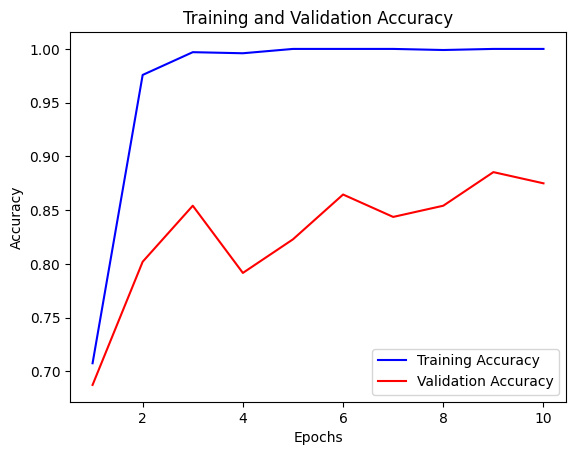

In [ ]:
# Underfitting and Overfitting Analysis
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

print("\nUnderfitting and Overfitting Analysis:")
epochs = range(1, len(train_acc) + 1)
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# VGG16

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

Epoch 10/10: 100%|██████████| 31/31 [00:15<00:00,  1.94it/s]



Validation Accuracy: 0.7900
4/4 [==============================] - 1s 203ms/step

Classification Report for Validation Data:
Class        Precision    Recall       F1-score     Support     
------------------------------------------------------------
cardboard    0.8333       0.9524       0.8889       21          
glass        0.7727       0.8095       0.7907       21          
metal        0.9167       0.6875       0.7857       16          
paper        0.9231       0.5714       0.7059       21          
plastic      0.5556       0.7143       0.6250       7           
trash        0.7000       1.0000       0.8235       14          
------------------------------------------------------------
Validation Accuracy: 0.7900      

Test Accuracy: 0.8200
4/4 [==============================] - 1s 137ms/step

Classification Report for Test Data:
Class        Precision    Recall       F1-score     Support     
------------------------------------------------------------
cardboard    0.8750    

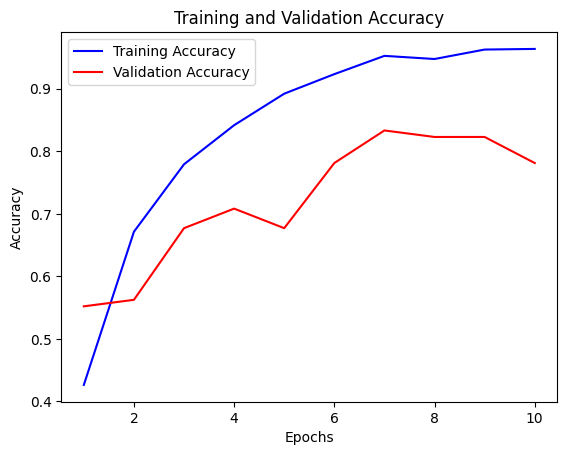

In [ ]:

import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input, VGG16
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tqdm import tqdm

# Specify paths
train_csv = '/content/train.csv'
val_csv = '/content/val.csv'
test_csv = '/content/test.csv'
dataset_path = '/content/waste_images'  # Adjust this to your dataset path

# Load CSV files
train_df = pd.read_csv(train_csv)
val_df = pd.read_csv(val_csv)
test_df = pd.read_csv(test_csv)

# Extract image paths and labels
train_paths, train_labels = train_df['image_path'].values, train_df['label'].values
val_paths, val_labels = val_df['image_path'].values, val_df['label'].values
test_paths, test_labels = test_df['image_path'].values, test_df['label'].values

# Encode labels
label_encoder = LabelEncoder()
train_labels_enc = label_encoder.fit_transform(train_labels)
val_labels_enc = label_encoder.transform(val_labels)
test_labels_enc = label_encoder.transform(test_labels)

# Parameters
batch_size = 32
image_size = (224, 224)  # VGG16 input size

# Function to preprocess images
def load_preprocess_image(image_path, label):
    image_path_str = image_path.numpy().decode('utf-8')  # Decode the bytes to string
    img = load_img(os.path.join(dataset_path, image_path_str), target_size=image_size)
    img_array = img_to_array(img)
    img_array = preprocess_input(img_array)
    return img_array, label

def wrap_load_preprocess_image(image_path, label):
    img, label = tf.py_function(load_preprocess_image, [image_path, label], [tf.float32, tf.int64])
    img.set_shape((image_size[0], image_size[1], 3))
    label.set_shape(())
    return img, label

# Create tf.data.Dataset objects
def create_dataset(paths, labels, batch_size, is_training=False):
    dataset = tf.data.Dataset.from_tensor_slices((paths, labels))
    dataset = dataset.map(wrap_load_preprocess_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    if is_training:
        dataset = dataset.shuffle(buffer_size=len(paths)).repeat()
    dataset = dataset.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)
    return dataset

train_dataset = create_dataset(train_paths, train_labels_enc, batch_size, is_training=True)
val_dataset = create_dataset(val_paths, val_labels_enc, batch_size, is_training=False)
test_dataset = create_dataset(test_paths, test_labels_enc, batch_size, is_training=False)

# Build and Compile the VGG16 Model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(image_size[0], image_size[1], 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(np.unique(train_labels)), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Custom tqdm callback for progress visualization
class TQDMCallback(tf.keras.callbacks.Callback):
    def __init__(self, epochs):
        self.epochs = epochs

    def on_epoch_begin(self, epoch, logs=None):
        self.epoch_pbar = tqdm(total=self.params['steps'], desc=f'Epoch {epoch + 1}/{self.epochs}', position=0)

    def on_epoch_end(self, epoch, logs=None):
        self.epoch_pbar.close()

    def on_batch_end(self, batch, logs=None):
        self.epoch_pbar.update(1)

# Train the model with tqdm integration
tqdm_callback = TQDMCallback(epochs=10)
steps_per_epoch = len(train_paths) // batch_size
validation_steps = len(val_paths) // batch_size

history = model.fit(train_dataset,
                    validation_data=val_dataset,
                    epochs=10,
                    steps_per_epoch=steps_per_epoch,
                    validation_steps=validation_steps,
                    verbose=0,
                    callbacks=[tqdm_callback])

# Evaluate the model on validation set
val_loss, val_acc = model.evaluate(val_dataset, verbose=0)
print(f"\nValidation Accuracy: {val_acc:.4f}")

# Make predictions on validation set
val_pred = model.predict(val_dataset)
val_pred_labels = np.argmax(val_pred, axis=1)

# Print classification report for validation data
val_report = classification_report(val_labels_enc, val_pred_labels[:len(val_labels_enc)], target_names=label_encoder.classes_, output_dict=True)
print("\nClassification Report for Validation Data:")
print(f"{'Class':<12} {'Precision':<12} {'Recall':<12} {'F1-score':<12} {'Support':<12}")
print("-" * 60)
for class_name in label_encoder.classes_:
    precision = val_report[class_name]['precision']
    recall = val_report[class_name]['recall']
    f1_score = val_report[class_name]['f1-score']
    support = val_report[class_name]['support']
    print(f"{class_name:<12} {precision:<12.4f} {recall:<12.4f} {f1_score:<12.4f} {support:<12}")
print("-" * 60)
val_accuracy = val_report['accuracy']
print(f"{'Validation Accuracy:':<12} {val_accuracy:<12.4f}")

# Evaluate the model on test set
test_loss, test_acc = model.evaluate(test_dataset, verbose=0)
print(f"\nTest Accuracy: {test_acc:.4f}")

# Make predictions on test set
test_pred = model.predict(test_dataset)
test_pred_labels = np.argmax(test_pred, axis=1)

# Print classification report for test data
test_report = classification_report(test_labels_enc, test_pred_labels[:len(test_labels_enc)], target_names=label_encoder.classes_, output_dict=True)
print("\nClassification Report for Test Data:")
print(f"{'Class':<12} {'Precision':<12} {'Recall':<12} {'F1-score':<12} {'Support':<12}")
print("-" * 60)
for class_name in label_encoder.classes_:
    precision = test_report[class_name]['precision']
    recall = test_report[class_name]['recall']
    f1_score = test_report[class_name]['f1-score']
    support = test_report[class_name]['support']
    print(f"{class_name:<12} {precision:<12.4f} {recall:<12.4f} {f1_score:<12.4f} {support:<12}")
print("-" * 60)
test_accuracy = test_report['accuracy']
print(f"{'Test Accuracy:':<12} {test_accuracy:<12.4f}")

# Underfitting and Overfitting Analysis
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

print("\nUnderfitting and Overfitting Analysis:")
epochs = range(1, len(train_acc) + 1)
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
# Print training, validation, and test accuracy
train_accuracy = history.history['accuracy'][-1]
val_accuracy = history.history['val_accuracy'][-1]

print(f"Training accuracy: {train_accuracy}")
print(f"Validation accuracy: {val_accuracy}")
print(f"Test accuracy: {test_accuracy}")



Training accuracy: 0.9637096524238586
Validation accuracy: 0.78125
Test accuracy: 0.82


# Vgg scratch

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tqdm import tqdm
import matplotlib.pyplot as plt

# Specify paths
train_csv = '/content/train.csv'
val_csv = '/content/val.csv'
test_csv = '/content/test.csv'
dataset_path = '/content/waste_images'  # Adjust this to your dataset path

# Load CSV files
train_df = pd.read_csv(train_csv)
val_df = pd.read_csv(val_csv)
test_df = pd.read_csv(test_csv)

# Extract image paths and labels
train_paths, train_labels = train_df['image_path'].values, train_df['label'].values
val_paths, val_labels = val_df['image_path'].values, val_df['label'].values
test_paths, test_labels = test_df['image_path'].values, test_df['label'].values

# Encode labels
label_encoder = LabelEncoder()
train_labels_enc = label_encoder.fit_transform(train_labels)
val_labels_enc = label_encoder.transform(val_labels)
test_labels_enc = label_encoder.transform(test_labels)

# Parameters
batch_size = 32
image_size = (224, 224)  # VGG16 input size

# Function to preprocess images
def load_preprocess_image(image_path, label):
    image_path_str = image_path.numpy().decode('utf-8')  # Decode the bytes to string
    img = load_img(os.path.join(dataset_path, image_path_str), target_size=image_size)
    img_array = img_to_array(img)
    img_array = img_array / 255.0  # Normalize pixel values to [0, 1]
    return img_array, label

def wrap_load_preprocess_image(image_path, label):
    img, label = tf.py_function(load_preprocess_image, [image_path, label], [tf.float32, tf.int64])
    img.set_shape((image_size[0], image_size[1], 3))
    label.set_shape(())
    return img, label

# Create tf.data.Dataset objects
def create_dataset(paths, labels, batch_size, is_training=False):
    dataset = tf.data.Dataset.from_tensor_slices((paths, labels))
    dataset = dataset.map(wrap_load_preprocess_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    if is_training:
        dataset = dataset.shuffle(buffer_size=len(paths)).repeat()
    dataset = dataset.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)
    return dataset

train_dataset = create_dataset(train_paths, train_labels_enc, batch_size, is_training=True)
val_dataset = create_dataset(val_paths, val_labels_enc, batch_size, is_training=False)
test_dataset = create_dataset(test_paths, test_labels_enc, batch_size, is_training=False)

# Build the model from scratch
model = tf.keras.Sequential([
    Input(shape=(image_size[0], image_size[1], 3)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), strides=(2, 2)),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), strides=(2, 2)),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), strides=(2, 2)),

    Conv2D(512, (3, 3), activation='relu', padding='same'),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), strides=(2, 2)),

    Conv2D(512, (3, 3), activation='relu', padding='same'),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), strides=(2, 2)),

    Flatten(),
    Dense(4096, activation='relu'),
    Dense(4096, activation='relu'),
    Dense(len(np.unique(train_labels)), activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Custom tqdm callback for progress visualization
class TQDMCallback(tf.keras.callbacks.Callback):
    def __init__(self, epochs):
        self.epochs = epochs

    def on_epoch_begin(self, epoch, logs=None):
        self.epoch_pbar = tqdm(total=self.params['steps'], desc=f'Epoch {epoch + 1}/{self.epochs}', position=0)

    def on_epoch_end(self, epoch, logs=None):
        self.epoch_pbar.close()

    def on_batch_end(self, batch, logs=None):
        self.epoch_pbar.update(1)

# Train the model with tqdm integration
tqdm_callback = TQDMCallback(epochs=10)
steps_per_epoch = len(train_paths) // batch_size
validation_steps = len(val_paths) // batch_size

history = model.fit(train_dataset,
                    validation_data=val_dataset,
                    epochs=10,
                    steps_per_epoch=steps_per_epoch,
                    validation_steps=validation_steps,
                    verbose=0,
                    callbacks=[tqdm_callback])

# Evaluate the model on validation set
val_loss, val_acc = model.evaluate(val_dataset, verbose=0)
print(f"\nValidation Accuracy: {val_acc:.4f}")

# Evaluate the model on test set
test_loss, test_acc = model.evaluate(test_dataset, verbose=0)
print(f"\nTest Accuracy: {test_acc:.4f}")

# Underfitting and Overfitting Analysis
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

print("\nUnderfitting and Overfitting Analysis:")
epochs = range(1, len(train_acc) + 1)
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 64)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 128)       0         
 g2D)                                                   

Epoch 3/10:   0%|          | 0/31 [00:00<?, ?it/s]

KeyboardInterrupt: 

# MLP 64-32

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_9 (Dense)             (None, 64)                9633856   
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 6)                 198       
                                                                 
Total params: 9636134 (36.76 MB)
Trainable params: 9636134 (36.76 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 10/10: 100%|██████████| 31/31 [00:03<00:00,  8.10it/s]



Validation Accuracy: 0.3300
4/4 [==============================] - 0s 62ms/step

Classification Report for Validation Data:
Class        Precision    Recall       F1-score     Support     
------------------------------------------------------------
cardboard    0.6667       0.3333       0.4444       12          
glass        0.0909       0.0625       0.0741       16          
metal        0.5000       0.1250       0.2000       16          
paper        0.2273       0.5882       0.3279       17          
plastic      0.5000       0.5238       0.5116       21          
trash        0.3846       0.2778       0.3226       18          
------------------------------------------------------------
Validation Accuracy: 0.3300      

Test Accuracy: 0.5300
4/4 [==============================] - 0s 61ms/step

Classification Report for Test Data:
Class        Precision    Recall       F1-score     Support     
------------------------------------------------------------
cardboard    0.8000      

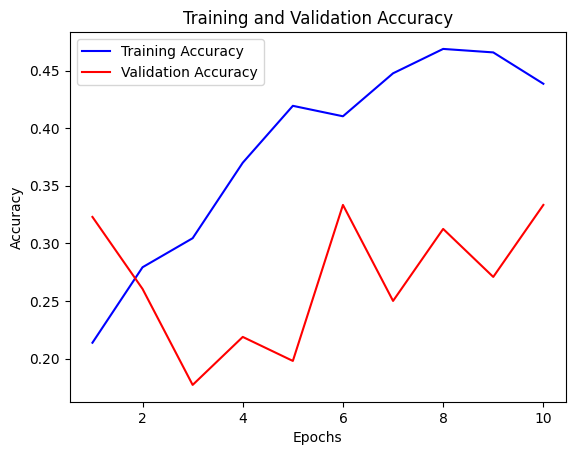

In [ ]:


print("")
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tqdm import tqdm
import matplotlib.pyplot as plt

# Specify paths
train_csv = '/content/train.csv'
val_csv = '/content/val.csv'
test_csv = '/content/test.csv'
dataset_path = '/content/waste_images'  # Adjust this to your dataset path

# Load CSV files
train_df = pd.read_csv(train_csv)
val_df = pd.read_csv(val_csv)
test_df = pd.read_csv(test_csv)

# Extract image paths and labels
train_paths, train_labels = train_df['image_path'].values, train_df['label'].values
val_paths, val_labels = val_df['image_path'].values, val_df['label'].values
test_paths, test_labels = test_df['image_path'].values, test_df['label'].values

# Encode labels
label_encoder = LabelEncoder()
train_labels_enc = label_encoder.fit_transform(train_labels)
val_labels_enc = label_encoder.transform(val_labels)
test_labels_enc = label_encoder.transform(test_labels)

# Parameters
batch_size = 32
image_size = (224, 224)  # Adjust based on your image size or model input size

# Function to preprocess images
def load_preprocess_image(image_path, label):
    image_path_str = image_path.numpy().decode('utf-8')  # Decode the bytes to string
    img = load_img(os.path.join(dataset_path, image_path_str), target_size=image_size)
    img_array = img_to_array(img)
    img_array /= 255.0  # Normalize to [0, 1]
    return img_array, label

def wrap_load_preprocess_image(image_path, label):
    img, label = tf.py_function(load_preprocess_image, [image_path, label], [tf.float32, tf.int64])
    img.set_shape((image_size[0], image_size[1], 3))
    label.set_shape(())
    return img, label

# Create tf.data.Dataset objects
def create_dataset(paths, labels, batch_size, is_training=False):
    dataset = tf.data.Dataset.from_tensor_slices((paths, labels))
    dataset = dataset.map(wrap_load_preprocess_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    if is_training:
        dataset = dataset.shuffle(buffer_size=len(paths)).repeat()
    dataset = dataset.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)
    return dataset

train_dataset = create_dataset(train_paths, train_labels_enc, batch_size, is_training=True)
val_dataset = create_dataset(val_paths, val_labels_enc, batch_size, is_training=False)
test_dataset = create_dataset(test_paths, test_labels_enc, batch_size, is_training=False)

# Build and Compile the MLP Model
model = Sequential([
    Flatten(input_shape=(image_size[0], image_size[1], 3)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(len(np.unique(train_labels)), activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Custom tqdm callback for progress visualization
class TQDMCallback(tf.keras.callbacks.Callback):
    def __init__(self, epochs):
        self.epochs = epochs

    def on_epoch_begin(self, epoch, logs=None):
        self.epoch_pbar = tqdm(total=self.params['steps'], desc=f'Epoch {epoch + 1}/{self.epochs}', position=0)

    def on_epoch_end(self, epoch, logs=None):
        self.epoch_pbar.close()

    def on_batch_end(self, batch, logs=None):
        self.epoch_pbar.update(1)
# Train the model with tqdm integration
tqdm_callback = TQDMCallback(epochs=10)

# Calculate steps_per_epoch based on the number of batches in your dataset
steps_per_epoch = len(train_paths) // batch_size

history = model.fit(train_dataset,
                    validation_data=val_dataset,
                    epochs=10,
                    steps_per_epoch=steps_per_epoch,  # Specify steps_per_epoch here
                    validation_steps=validation_steps,
                    verbose=0,
                    callbacks=[tqdm_callback])


# Evaluate the model on validation set
val_loss, val_acc = model.evaluate(val_dataset, verbose=0)
print(f"\nValidation Accuracy: {val_acc:.4f}")

# Make predictions on validation set
val_pred = model.predict(val_dataset)
val_pred_labels = np.argmax(val_pred, axis=1)

# Print classification report for validation data
val_report = classification_report(val_labels_enc, val_pred_labels[:len(val_labels_enc)], target_names=label_encoder.classes_, output_dict=True)
print("\nClassification Report for Validation Data:")
print(f"{'Class':<12} {'Precision':<12} {'Recall':<12} {'F1-score':<12} {'Support':<12}")
print("-" * 60)
for class_name in label_encoder.classes_:
    precision = val_report[class_name]['precision']
    recall = val_report[class_name]['recall']
    f1_score = val_report[class_name]['f1-score']
    support = val_report[class_name]['support']
    print(f"{class_name:<12} {precision:<12.4f} {recall:<12.4f} {f1_score:<12.4f} {support:<12}")
print("-" * 60)
val_accuracy = val_report['accuracy']
print(f"{'Validation Accuracy:':<12} {val_accuracy:<12.4f}")

# Evaluate the model on test set
test_loss, test_acc = model.evaluate(test_dataset, verbose=0)
print(f"\nTest Accuracy: {test_acc:.4f}")

# Make predictions on test set
test_pred = model.predict(test_dataset)
test_pred_labels = np.argmax(test_pred, axis=1)

# Print classification report for test data
test_report = classification_report(test_labels_enc, test_pred_labels[:len(test_labels_enc)], target_names=label_encoder.classes_, output_dict=True)
print("\nClassification Report for Test Data:")
print(f"{'Class':<12} {'Precision':<12} {'Recall':<12} {'F1-score':<12} {'Support':<12}")
print("-" * 60)
for class_name in label_encoder.classes_:
    precision = test_report[class_name]['precision']
    recall = test_report[class_name]['recall']
    f1_score = test_report[class_name]['f1-score']
    support = test_report[class_name]['support']
    print(f"{class_name:<12} {precision:<12.4f} {recall:<12.4f} {f1_score:<12.4f} {support:<12}")
print("-" * 60)
test_accuracy = test_report['accuracy']
print(f"{'Test Accuracy:':<12} {test_accuracy:<12.4f}")

# Underfitting and Overfitting Analysis
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

print("\nUnderfitting and Overfitting Analysis:")
epochs = range(1, len(train_acc) + 1)
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


MLP

# MLP 256-128-64

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 150528)            0         
                                                                 
 dense_2 (Dense)             (None, 256)               38535424  
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 6)                 390       
                                                                 
Total params: 38576966 (147.16 MB)
Trainable params: 38576966 (147.16 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 10/10: 100%|██████████| 31/31 [00:26<00:00,  1.15it/s]



Validation Accuracy: 0.4100
4/4 [==============================] - 0s 78ms/step

Classification Report for Validation Data:
Class        Precision    Recall       F1-score     Support     
------------------------------------------------------------
cardboard    0.6316       0.5714       0.6000       21          
glass        0.0000       0.0000       0.0000       21          
metal        0.3636       0.5000       0.4211       16          
paper        0.5000       0.2857       0.3636       21          
plastic      0.3000       0.4286       0.3529       7           
trash        0.3243       0.8571       0.4706       14          
------------------------------------------------------------
Validation Accuracy: 0.4100      


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Test Accuracy: 0.3500
4/4 [==============================] - 0s 77ms/step

Classification Report for Test Data:
Class        Precision    Recall       F1-score     Support     
------------------------------------------------------------
cardboard    0.3125       0.3333       0.3226       15          
glass        1.0000       0.0909       0.1667       11          
metal        0.2222       0.1905       0.2051       21          
paper        0.3889       0.3889       0.3889       18          
plastic      0.5833       0.3333       0.4242       21          
trash        0.3143       0.7857       0.4490       14          
------------------------------------------------------------
Test Accuracy: 0.3500      

Underfitting and Overfitting Analysis:


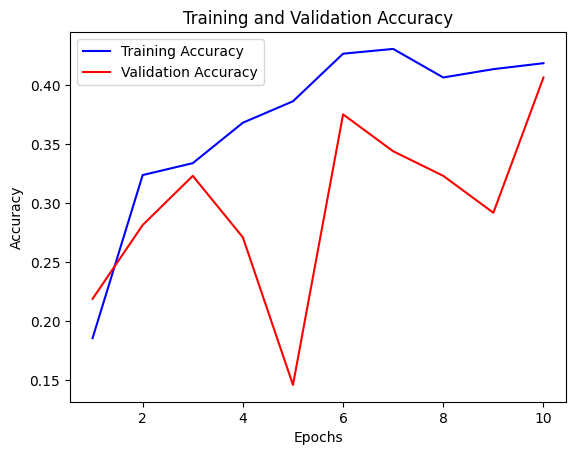

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tqdm import tqdm
import matplotlib.pyplot as plt

# Specify paths
train_csv = '/content/train.csv'
val_csv = '/content/val.csv'
test_csv = '/content/test.csv'
dataset_path = '/content/waste_images'  # Adjust this to your dataset path

# Load CSV files
train_df = pd.read_csv(train_csv)
val_df = pd.read_csv(val_csv)
test_df = pd.read_csv(test_csv)

# Extract image paths and labels
train_paths, train_labels = train_df['image_path'].values, train_df['label'].values
val_paths, val_labels = val_df['image_path'].values, val_df['label'].values
test_paths, test_labels = test_df['image_path'].values, test_df['label'].values

# Encode labels
label_encoder = LabelEncoder()
train_labels_enc = label_encoder.fit_transform(train_labels)
val_labels_enc = label_encoder.transform(val_labels)
test_labels_enc = label_encoder.transform(test_labels)

# Parameters
batch_size = 32
image_size = (224, 224)  # Adjust based on your image size or model input size

# Function to preprocess images
def load_preprocess_image(image_path, label):
    image_path_str = image_path.numpy().decode('utf-8')  # Decode the bytes to string
    img = load_img(os.path.join(dataset_path, image_path_str), target_size=image_size)
    img_array = img_to_array(img)
    img_array /= 255.0  # Normalize to [0, 1]
    return img_array, label

def wrap_load_preprocess_image(image_path, label):
    img, label = tf.py_function(load_preprocess_image, [image_path, label], [tf.float32, tf.int64])
    img.set_shape((image_size[0], image_size[1], 3))
    label.set_shape(())
    return img, label

# Create tf.data.Dataset objects
def create_dataset(paths, labels, batch_size, is_training=False):
    dataset = tf.data.Dataset.from_tensor_slices((paths, labels))
    dataset = dataset.map(wrap_load_preprocess_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    if is_training:
        dataset = dataset.shuffle(buffer_size=len(paths)).repeat()
    dataset = dataset.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)
    return dataset

train_dataset = create_dataset(train_paths, train_labels_enc, batch_size, is_training=True)
val_dataset = create_dataset(val_paths, val_labels_enc, batch_size, is_training=False)
test_dataset = create_dataset(test_paths, test_labels_enc, batch_size, is_training=False)

# Build and Compile the MLP Model
model = Sequential([
    Flatten(input_shape=(image_size[0], image_size[1], 3)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(len(np.unique(train_labels)), activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Custom tqdm callback for progress visualization
class TQDMCallback(tf.keras.callbacks.Callback):
    def __init__(self, epochs):
        self.epochs = epochs

    def on_epoch_begin(self, epoch, logs=None):
        self.epoch_pbar = tqdm(total=self.params['steps'], desc=f'Epoch {epoch + 1}/{self.epochs}', position=0)

    def on_epoch_end(self, epoch, logs=None):
        self.epoch_pbar.close()

    def on_batch_end(self, batch, logs=None):
        self.epoch_pbar.update(1)

# Train the model with tqdm integration
tqdm_callback = TQDMCallback(epochs=10)

# Calculate steps_per_epoch based on the number of batches in your dataset
steps_per_epoch = len(train_paths) // batch_size
validation_steps = len(val_paths) // batch_size

history = model.fit(train_dataset,
                    validation_data=val_dataset,
                    epochs=10,
                    steps_per_epoch=steps_per_epoch,  # Specify steps_per_epoch here
                    validation_steps=validation_steps,
                    verbose=0,
                    callbacks=[tqdm_callback])

# Evaluate the model on validation set
val_loss, val_acc = model.evaluate(val_dataset, verbose=0)
print(f"\nValidation Accuracy: {val_acc:.4f}")

# Make predictions on validation set
val_pred = model.predict(val_dataset)
val_pred_labels = np.argmax(val_pred, axis=1)

# Print classification report for validation data
val_report = classification_report(val_labels_enc, val_pred_labels[:len(val_labels_enc)], target_names=label_encoder.classes_, output_dict=True)
print("\nClassification Report for Validation Data:")
print(f"{'Class':<12} {'Precision':<12} {'Recall':<12} {'F1-score':<12} {'Support':<12}")
print("-" * 60)
for class_name in label_encoder.classes_:
    precision = val_report[class_name]['precision']
    recall = val_report[class_name]['recall']
    f1_score = val_report[class_name]['f1-score']
    support = val_report[class_name]['support']
    print(f"{class_name:<12} {precision:<12.4f} {recall:<12.4f} {f1_score:<12.4f} {support:<12}")
print("-" * 60)
val_accuracy = val_report['accuracy']
print(f"{'Validation Accuracy:':<12} {val_accuracy:<12.4f}")

# Evaluate the model on test set
test_loss, test_acc = model.evaluate(test_dataset, verbose=0)
print(f"\nTest Accuracy: {test_acc:.4f}")

# Make predictions on test set
test_pred = model.predict(test_dataset)
test_pred_labels = np.argmax(test_pred, axis=1)

# Print classification report for test data
test_report = classification_report(test_labels_enc, test_pred_labels[:len(test_labels_enc)], target_names=label_encoder.classes_, output_dict=True)
print("\nClassification Report for Test Data:")
print(f"{'Class':<12} {'Precision':<12} {'Recall':<12} {'F1-score':<12} {'Support':<12}")
print("-" * 60)
for class_name in label_encoder.classes_:
    precision = test_report[class_name]['precision']
    recall = test_report[class_name]['recall']
    f1_score = test_report[class_name]['f1-score']
    support = test_report[class_name]['support']
    print(f"{class_name:<12} {precision:<12.4f} {recall:<12.4f} {f1_score:<12.4f} {support:<12}")
print("-" * 60)
test_accuracy = test_report['accuracy']
print(f"{'Test Accuracy:':<12} {test_accuracy:<12.4f}")

# Underfitting and Overfitting Analysis
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

print("\nUnderfitting and Overfitting Analysis:")
epochs = range(1, len(train_acc) + 1)
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# MLP 256 TL

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tqdm import tqdm
import matplotlib.pyplot as plt

# Specify paths
train_csv = '/content/train.csv'
val_csv = '/content/val.csv'
test_csv = '/content/test.csv'
dataset_path = '/content/waste_images'  # Adjust this to your dataset path

# Load CSV files
train_df = pd.read_csv(train_csv)
val_df = pd.read_csv(val_csv)
test_df = pd.read_csv(test_csv)

# Extract image paths and labels
train_paths, train_labels = train_df['image_path'].values, train_df['label'].values
val_paths, val_labels = val_df['image_path'].values, val_df['label'].values
test_paths, test_labels = test_df['image_path'].values, test_df['label'].values

# Encode labels
label_encoder = LabelEncoder()
train_labels_enc = label_encoder.fit_transform(train_labels)
val_labels_enc = label_encoder.transform(val_labels)
test_labels_enc = label_encoder.transform(test_labels)

# Parameters
batch_size = 32
image_size = (224, 224)  # Adjust based on your image size or model input size

# Function to preprocess images
def load_preprocess_image(image_path, label):
    image_path_str = image_path.numpy().decode('utf-8')  # Decode the bytes to string
    img = load_img(os.path.join(dataset_path, image_path_str), target_size=image_size)
    img_array = img_to_array(img)
    img_array /= 255.0  # Normalize to [0, 1]
    return img_array, label

def wrap_load_preprocess_image(image_path, label):
    img, label = tf.py_function(load_preprocess_image, [image_path, label], [tf.float32, tf.int64])
    img.set_shape((image_size[0], image_size[1], 3))
    label.set_shape(())
    return img, label

# Create tf.data.Dataset objects
def create_dataset(paths, labels, batch_size, is_training=False):
    dataset = tf.data.Dataset.from_tensor_slices((paths, labels))
    dataset = dataset.map(wrap_load_preprocess_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    if is_training:
        dataset = dataset.shuffle(buffer_size=len(paths)).repeat()
    dataset = dataset.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)
    return dataset

train_dataset = create_dataset(train_paths, train_labels_enc, batch_size, is_training=True)
val_dataset = create_dataset(val_paths, val_labels_enc, batch_size, is_training=False)
test_dataset = create_dataset(test_paths, test_labels_enc, batch_size, is_training=False)

# Load pre-trained model
base_model = tf.keras.applications.MobileNetV2(input_shape=(image_size[0], image_size[1], 3),
                                               include_top=False,
                                               weights='imagenet')

# Freeze base model layers
base_model.trainable = False

# Build MLP on top of base model
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(len(np.unique(train_labels)), activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

# Custom tqdm callback for progress visualization
class TQDMCallback(tf.keras.callbacks.Callback):
    def __init__(self, epochs):
        self.epochs = epochs

    def on_epoch_begin(self, epoch, logs=None):
        self.epoch_pbar = tqdm(total=self.params['steps'], desc=f'Epoch {epoch + 1}/{self.epochs}', position=0)

    def on_epoch_end(self, epoch, logs=None):
        self.epoch_pbar.close()

    def on_batch_end(self, batch, logs=None):
        self.epoch_pbar.update(1)

# Train the model with tqdm integration
tqdm_callback = TQDMCallback(epochs=10)

# Calculate steps_per_epoch based on the number of batches in your dataset
steps_per_epoch = len(train_paths) // batch_size
validation_steps = len(val_paths) // batch_size

history = model.fit(train_dataset,
                    validation_data=val_dataset,
                    epochs=10,
                    steps_per_epoch=steps_per_epoch,  # Specify steps_per_epoch here
                    validation_steps=validation_steps,
                    verbose=0,
                    callbacks=[tqdm_callback])

# Evaluate the model on validation set
val_loss, val_acc = model.evaluate(val_dataset, verbose=0)
print(f"\nValidation Accuracy: {val_acc:.4f}")

# Make predictions on validation set
val_pred = model.predict(val_dataset)
val_pred_labels = np.argmax(val_pred, axis=1)

# Print classification report for validation data
val_report = classification_report(val_labels_enc, val_pred_labels[:len(val_labels_enc)], target_names=label_encoder.classes_, output_dict=True)
print("\nClassification Report for Validation Data:")
print(f"{'Class':<12} {'Precision':<12} {'Recall':<12} {'F1-score':<12} {'Support':<12}")
print("-" * 60)
for class_name in label_encoder.classes_:
    precision = val_report[class_name]['precision']
    recall = val_report[class_name]['recall']
    f1_score = val_report[class_name]['f1-score']
    support = val_report[class_name]['support']
    print(f"{class_name:<12} {precision:<12.4f} {recall:<12.4f} {f1_score:<12.4f} {support:<12}")
print("-" * 60)
val_accuracy = val_report['accuracy']
print(f"{'Validation Accuracy:':<12} {val_accuracy:<12.4f}")

# Evaluate the model on test set
test_loss, test_acc = model.evaluate(test_dataset, verbose=0)
print(f"\nTest Accuracy: {test_acc:.4f}")

# Make predictions on test set
test_pred = model.predict(test_dataset)
test_pred_labels = np.argmax(test_pred, axis=1)

# Print classification report for test data
test_report = classification_report(test_labels_enc, test_pred_labels[:len(test_labels_enc)], target_names=label_encoder.classes_, output_dict=True)
print("\nClassification Report for Test Data:")
print(f"{'Class':<12} {'Precision':<12} {'Recall':<12} {'F1-score':<12} {'Support':<12}")
print("-" * 60)
for class_name in label_encoder.classes_:
    precision = test_report[class_name]['precision']
    recall = test_report[class_name]['recall']
    f1_score = test_report[class_name]['f1-score']
    support = test_report[class_name]['support']
    print(f"{class_name:<12} {precision:<12.4f} {recall:<12.4f} {f1_score:<12.4f} {support:<12}")
print("-" * 60)
test_accuracy = test_report['accuracy']
print(f"{'Test Accuracy:':<12} {test_accuracy:<12.4f}")

# Underfitting and Overfitting Analysis
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

print("\nUnderfitting and Overfitting Analysis:")
epochs = range(1, len(train_acc) + 1)
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# EfficientNet

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.efficientnet import preprocess_input, EfficientNetB0
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tqdm import tqdm

# Specify paths
train_csv = '/content/train.csv'
val_csv = '/content/val.csv'
test_csv = '/content/test.csv'
dataset_path = '/content/waste_images'  # Adjust this to your dataset path

# Load CSV files
train_df = pd.read_csv(train_csv)
val_df = pd.read_csv(val_csv)
test_df = pd.read_csv(test_csv)

# Extract image paths and labels
train_paths, train_labels = train_df['image_path'].values, train_df['label'].values
val_paths, val_labels = val_df['image_path'].values, val_df['label'].values
test_paths, test_labels = test_df['image_path'].values, test_df['label'].values

# Encode labels
label_encoder = LabelEncoder()
train_labels_enc = label_encoder.fit_transform(train_labels)
val_labels_enc = label_encoder.transform(val_labels)
test_labels_enc = label_encoder.transform(test_labels)

# Parameters
batch_size = 32
image_size = (224, 224)  # EfficientNet input size

# Function to preprocess images
def load_preprocess_image(image_path, label):
    image_path_str = image_path.numpy().decode('utf-8')  # Decode the bytes to string
    img = load_img(os.path.join(dataset_path, image_path_str), target_size=image_size)
    img_array = img_to_array(img)
    img_array = preprocess_input(img_array)
    return img_array, label

def wrap_load_preprocess_image(image_path, label):
    img, label = tf.py_function(load_preprocess_image, [image_path, label], [tf.float32, tf.int64])
    img.set_shape((image_size[0], image_size[1], 3))
    label.set_shape(())
    return img, label

# Create tf.data.Dataset objects
def create_dataset(paths, labels, batch_size, is_training=False):
    dataset = tf.data.Dataset.from_tensor_slices((paths, labels))
    dataset = dataset.map(wrap_load_preprocess_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    if is_training:
        dataset = dataset.shuffle(buffer_size=len(paths)).repeat()
    dataset = dataset.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)
    return dataset

train_dataset = create_dataset(train_paths, train_labels_enc, batch_size, is_training=True)
val_dataset = create_dataset(val_paths, val_labels_enc, batch_size, is_training=False)
test_dataset = create_dataset(test_paths, test_labels_enc, batch_size, is_training=False)

# Build and Compile the EfficientNet Model
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(image_size[0], image_size[1], 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(np.unique(train_labels)), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Custom tqdm callback for progress visualization
class TQDMCallback(tf.keras.callbacks.Callback):
    def __init__(self, epochs):
        self.epochs = epochs

    def on_epoch_begin(self, epoch, logs=None):
        self.epoch_pbar = tqdm(total=self.params['steps'], desc=f'Epoch {epoch + 1}/{self.epochs}', position=0)

    def on_epoch_end(self, epoch, logs=None):
        self.epoch_pbar.close()

    def on_batch_end(self, batch, logs=None):
        self.epoch_pbar.update(1)

# Train the model with tqdm integration
tqdm_callback = TQDMCallback(epochs=10)
steps_per_epoch = len(train_paths) // batch_size
validation_steps = len(val_paths) // batch_size

history = model.fit(train_dataset,
                    validation_data=val_dataset,
                    epochs=10,
                    steps_per_epoch=steps_per_epoch,
                    validation_steps=validation_steps,
                    verbose=0,
                    callbacks=[tqdm_callback])

# Evaluate the model on validation set
val_loss, val_acc = model.evaluate(val_dataset, verbose=0)
print(f"\nValidation Accuracy: {val_acc:.4f}")

# Make predictions on validation set
val_pred = model.predict(val_dataset)
val_pred_labels = np.argmax(val_pred, axis=1)

# Print classification report for validation data
val_report = classification_report(val_labels_enc, val_pred_labels[:len(val_labels_enc)], target_names=label_encoder.classes_, output_dict=True)
print("\nClassification Report for Validation Data:")
print(f"{'Class':<12} {'Precision':<12} {'Recall':<12} {'F1-score':<12} {'Support':<12}")
print("-" * 60)
for class_name in label_encoder.classes_:
    precision = val_report[class_name]['precision']
    recall = val_report[class_name]['recall']
    f1_score = val_report[class_name]['f1-score']
    support = val_report[class_name]['support']
    print(f"{class_name:<12} {precision:<12.4f} {recall:<12.4f} {f1_score:<12.4f} {support:<12}")
print("-" * 60)
val_accuracy = val_report['accuracy']
print(f"{'Validation Accuracy:':<12} {val_accuracy:<12.4f}")

# Evaluate the model on test set
test_loss, test_acc = model.evaluate(test_dataset, verbose=0)
print(f"\nTest Accuracy: {test_acc:.4f}")

# Make predictions on test set
test_pred = model.predict(test_dataset)
test_pred_labels = np.argmax(test_pred, axis=1)

# Print classification report for test data
test_report = classification_report(test_labels_enc, test_pred_labels[:len(test_labels_enc)], target_names=label_encoder.classes_, output_dict=True)
print("\nClassification Report for Test Data:")
print(f"{'Class':<12} {'Precision':<12} {'Recall':<12} {'F1-score':<12} {'Support':<12}")
print("-" * 60)
for class_name in label_encoder.classes_:
    precision = test_report[class_name]['precision']
    recall = test_report[class_name]['recall']
    f1_score = test_report[class_name]['f1-score']
    support = test_report[class_name]['support']
    print(f"{class_name:<12} {precision:<12.4f} {recall:<12.4f} {f1_score:<12.4f} {support:<12}")
print("-" * 60)
test_accuracy = test_report['accuracy']
print(f"{'Test Accuracy:':<12} {test_accuracy:<12.4f}")

# Underfitting and Overfitting Analysis
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

print("\nUnderfitting and Overfitting Analysis:")
epochs = range(1, len(train_acc) + 1)
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling_4 (Rescaling)     (None, 224, 224, 3)          0         ['input_3[0][0]']             
                                                                                                  
 normalization_2 (Normaliza  (None, 224, 224, 3)          7         ['rescaling_4[0][0]']         
 tion)                                                                                            
                                                                                                  
 rescaling_5 (Rescaling)     (None, 224, 224, 3)          0         ['normalization_2[0][0]'

Epoch 1/10:   0%|          | 0/31 [00:00<?, ?it/s]

KeyboardInterrupt: 

# efficient 0.00001

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling_4 (Rescaling)     (None, 224, 224, 3)          0         ['input_3[0][0]']             
                                                                                                  
 normalization_2 (Normaliza  (None, 224, 224, 3)          7         ['rescaling_4[0][0]']         
 tion)                                                                                            
                                                                                                  
 rescaling_5 (Rescaling)     (None, 224, 224, 3)          0         ['normalization_2[0][0]'

Epoch 10/10: 100%|██████████| 31/31 [00:11<00:00,  2.65it/s]



Training Accuracy: 0.8840

Validation Accuracy: 0.7100
4/4 [==============================] - 3s 100ms/step

Classification Report for Validation Data:
Class        Precision    Recall       F1-score     Support     
------------------------------------------------------------
cardboard    0.9000       0.8571       0.8780       21          
glass        0.6667       0.6667       0.6667       21          
metal        0.8182       0.5625       0.6667       16          
paper        0.8824       0.7143       0.7895       21          
plastic      0.3077       0.5714       0.4000       7           
trash        0.6111       0.7857       0.6875       14          
------------------------------------------------------------
Validation Accuracy: 0.7100      

Test Accuracy: 0.6800
4/4 [==============================] - 0s 99ms/step

Classification Report for Test Data:
Class        Precision    Recall       F1-score     Support     
----------------------------------------------------------

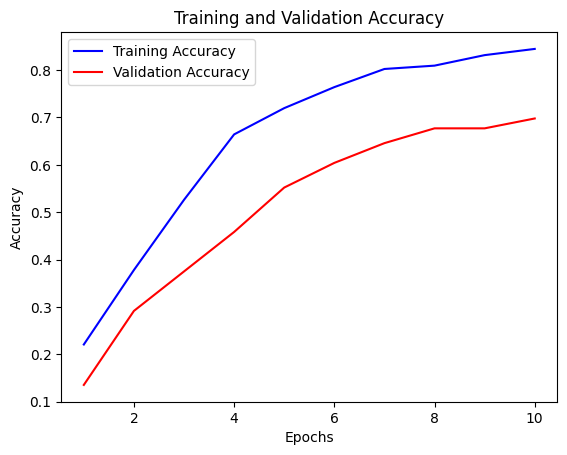

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.efficientnet import preprocess_input, EfficientNetB0
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tqdm import tqdm
import matplotlib.pyplot as plt

# Specify paths
train_csv = '/content/train.csv'
val_csv = '/content/val.csv'
test_csv = '/content/test.csv'
dataset_path = '/content/waste_images'  # Adjust this to your dataset path

# Load CSV files
train_df = pd.read_csv(train_csv)
val_df = pd.read_csv(val_csv)
test_df = pd.read_csv(test_csv)

# Extract image paths and labels
train_paths, train_labels = train_df['image_path'].values, train_df['label'].values
val_paths, val_labels = val_df['image_path'].values, val_df['label'].values
test_paths, test_labels = test_df['image_path'].values, test_df['label'].values

# Encode labels
label_encoder = LabelEncoder()
train_labels_enc = label_encoder.fit_transform(train_labels)
val_labels_enc = label_encoder.transform(val_labels)
test_labels_enc = label_encoder.transform(test_labels)

# Parameters
batch_size = 32
image_size = (224, 224)  # EfficientNet input size

# Function to preprocess images
def load_preprocess_image(image_path, label):
    image_path_str = image_path.numpy().decode('utf-8')  # Decode the bytes to string
    img = load_img(os.path.join(dataset_path, image_path_str), target_size=image_size)
    img_array = img_to_array(img)
    img_array = preprocess_input(img_array)
    return img_array, label

def wrap_load_preprocess_image(image_path, label):
    img, label = tf.py_function(load_preprocess_image, [image_path, label], [tf.float32, tf.int64])
    img.set_shape((image_size[0], image_size[1], 3))
    label.set_shape(())
    return img, label

# Create tf.data.Dataset objects
def create_dataset(paths, labels, batch_size, is_training=False):
    dataset = tf.data.Dataset.from_tensor_slices((paths, labels))
    dataset = dataset.map(wrap_load_preprocess_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    if is_training:
        dataset = dataset.shuffle(buffer_size=len(paths)).repeat()
    dataset = dataset.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)
    return dataset

train_dataset = create_dataset(train_paths, train_labels_enc, batch_size, is_training=True)
val_dataset = create_dataset(val_paths, val_labels_enc, batch_size, is_training=False)
test_dataset = create_dataset(test_paths, test_labels_enc, batch_size, is_training=False)

# Separate training dataset for evaluation (no shuffle or repeat)
train_eval_dataset = create_dataset(train_paths, train_labels_enc, batch_size, is_training=False)

# Build and Compile the EfficientNet Model
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(image_size[0], image_size[1], 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(np.unique(train_labels)), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=Adam(learning_rate=0.00001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Custom tqdm callback for progress visualization
class TQDMCallback(tf.keras.callbacks.Callback):
    def __init__(self, epochs):
        self.epochs = epochs

    def on_epoch_begin(self, epoch, logs=None):
        self.epoch_pbar = tqdm(total=self.params['steps'], desc=f'Epoch {epoch + 1}/{self.epochs}', position=0)

    def on_epoch_end(self, epoch, logs=None):
        self.epoch_pbar.close()

    def on_batch_end(self, batch, logs=None):
        self.epoch_pbar.update(1)

# Train the model with tqdm integration
tqdm_callback = TQDMCallback(epochs=10)
steps_per_epoch = len(train_paths) // batch_size
validation_steps = len(val_paths) // batch_size

history = model.fit(train_dataset,
                    validation_data=val_dataset,
                    epochs=10,
                    steps_per_epoch=steps_per_epoch,
                    validation_steps=validation_steps,
                    verbose=0,
                    callbacks=[tqdm_callback])

# Evaluate the model on training set
train_loss, train_acc = model.evaluate(train_eval_dataset, verbose=0)
print(f"\nTraining Accuracy: {train_acc:.4f}")

# Evaluate the model on validation set
val_loss, val_acc = model.evaluate(val_dataset, verbose=0)
print(f"\nValidation Accuracy: {val_acc:.4f}")

# Make predictions on validation set
val_pred = model.predict(val_dataset)
val_pred_labels = np.argmax(val_pred, axis=1)

# Print classification report for validation data
val_report = classification_report(val_labels_enc, val_pred_labels[:len(val_labels_enc)], target_names=label_encoder.classes_, output_dict=True)
print("\nClassification Report for Validation Data:")
print(f"{'Class':<12} {'Precision':<12} {'Recall':<12} {'F1-score':<12} {'Support':<12}")
print("-" * 60)
for class_name in label_encoder.classes_:
    precision = val_report[class_name]['precision']
    recall = val_report[class_name]['recall']
    f1_score = val_report[class_name]['f1-score']
    support = val_report[class_name]['support']
    print(f"{class_name:<12} {precision:<12.4f} {recall:<12.4f} {f1_score:<12.4f} {support:<12}")
print("-" * 60)
val_accuracy = val_report['accuracy']
print(f"{'Validation Accuracy:':<12} {val_accuracy:<12.4f}")

# Evaluate the model on test set
test_loss, test_acc = model.evaluate(test_dataset, verbose=0)
print(f"\nTest Accuracy: {test_acc:.4f}")

# Make predictions on test set
test_pred = model.predict(test_dataset)
test_pred_labels = np.argmax(test_pred, axis=1)

# Print classification report for test data
test_report = classification_report(test_labels_enc, test_pred_labels[:len(test_labels_enc)], target_names=label_encoder.classes_, output_dict=True)
print("\nClassification Report for Test Data:")
print(f"{'Class':<12} {'Precision':<12} {'Recall':<12} {'F1-score':<12} {'Support':<12}")
print("-" * 60)
for class_name in label_encoder.classes_:
    precision = test_report[class_name]['precision']
    recall = test_report[class_name]['recall']
    f1_score = test_report[class_name]['f1-score']
    support = test_report[class_name]['support']
    print(f"{class_name:<12} {precision:<12.4f} {recall:<12.4f} {f1_score:<12.4f} {support:<12}")
print("-" * 60)
test_accuracy = test_report['accuracy']
print(f"{'Test Accuracy:':<12} {test_accuracy:<12.4f}")

# Underfitting and Overfitting Analysis
train_acc_history = history.history['accuracy']
val_acc_history = history.history['val_accuracy']

print("\nUnderfitting and Overfitting Analysis:")
epochs = range(1, len(train_acc_history) + 1)
plt.plot(epochs, train_acc_history, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc_history, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# efficient 0.0001

Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_11 (InputLayer)       [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling_20 (Rescaling)    (None, 224, 224, 3)          0         ['input_11[0][0]']            
                                                                                                  
 normalization_10 (Normaliz  (None, 224, 224, 3)          7         ['rescaling_20[0][0]']        
 ation)                                                                                           
                                                                                                  
 rescaling_21 (Rescaling)    (None, 224, 224, 3)          0         ['normalization_10[0][0

Epoch 10/10: 100%|██████████| 31/31 [00:11<00:00,  2.76it/s]



Training Accuracy: 1.0000

Validation Accuracy: 0.8600
4/4 [==============================] - 2s 85ms/step

Classification Report for Validation Data:
Class        Precision    Recall       F1-score     Support     
------------------------------------------------------------
cardboard    1.0000       0.9048       0.9500       21          
glass        0.7727       0.8095       0.7907       21          
metal        1.0000       0.8750       0.9333       16          
paper        0.9474       0.8571       0.9000       21          
plastic      0.5000       0.5714       0.5333       7           
trash        0.7778       1.0000       0.8750       14          
------------------------------------------------------------
Validation Accuracy: 0.8600      

Test Accuracy: 0.8700
4/4 [==============================] - 0s 91ms/step

Classification Report for Test Data:
Class        Precision    Recall       F1-score     Support     
-----------------------------------------------------------

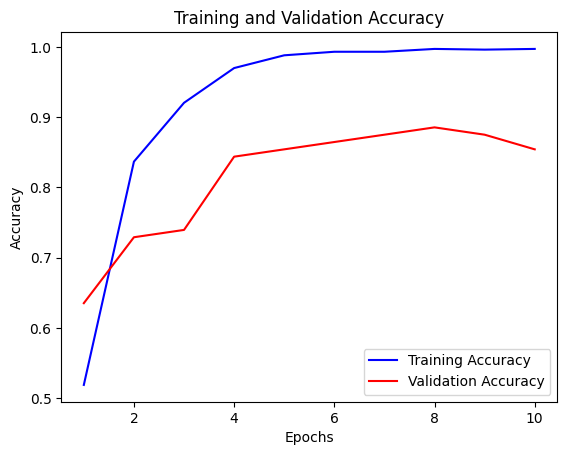

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.efficientnet import preprocess_input, EfficientNetB0
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tqdm import tqdm
import matplotlib.pyplot as plt

# Specify paths
train_csv = '/content/train.csv'
val_csv = '/content/val.csv'
test_csv = '/content/test.csv'
dataset_path = '/content/waste_images'  # Adjust this to your dataset path

# Load CSV files
train_df = pd.read_csv(train_csv)
val_df = pd.read_csv(val_csv)
test_df = pd.read_csv(test_csv)

# Extract image paths and labels
train_paths, train_labels = train_df['image_path'].values, train_df['label'].values
val_paths, val_labels = val_df['image_path'].values, val_df['label'].values
test_paths, test_labels = test_df['image_path'].values, test_df['label'].values

# Encode labels
label_encoder = LabelEncoder()
train_labels_enc = label_encoder.fit_transform(train_labels)
val_labels_enc = label_encoder.transform(val_labels)
test_labels_enc = label_encoder.transform(test_labels)

# Parameters
batch_size = 32
image_size = (224, 224)  # EfficientNet input size

# Function to preprocess images
def load_preprocess_image(image_path, label):
    image_path_str = image_path.numpy().decode('utf-8')  # Decode the bytes to string
    img = load_img(os.path.join(dataset_path, image_path_str), target_size=image_size)
    img_array = img_to_array(img)
    img_array = preprocess_input(img_array)
    return img_array, label

def wrap_load_preprocess_image(image_path, label):
    img, label = tf.py_function(load_preprocess_image, [image_path, label], [tf.float32, tf.int64])
    img.set_shape((image_size[0], image_size[1], 3))
    label.set_shape(())
    return img, label

# Create tf.data.Dataset objects
def create_dataset(paths, labels, batch_size, is_training=False):
    dataset = tf.data.Dataset.from_tensor_slices((paths, labels))
    dataset = dataset.map(wrap_load_preprocess_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    if is_training:
        dataset = dataset.shuffle(buffer_size=len(paths)).repeat()
    dataset = dataset.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)
    return dataset

train_dataset = create_dataset(train_paths, train_labels_enc, batch_size, is_training=True)
val_dataset = create_dataset(val_paths, val_labels_enc, batch_size, is_training=False)
test_dataset = create_dataset(test_paths, test_labels_enc, batch_size, is_training=False)

# Separate training dataset for evaluation (no shuffle or repeat)
train_eval_dataset = create_dataset(train_paths, train_labels_enc, batch_size, is_training=False)

# Build and Compile the EfficientNet Model
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(image_size[0], image_size[1], 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(np.unique(train_labels)), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Custom tqdm callback for progress visualization
class TQDMCallback(tf.keras.callbacks.Callback):
    def __init__(self, epochs):
        self.epochs = epochs

    def on_epoch_begin(self, epoch, logs=None):
        self.epoch_pbar = tqdm(total=self.params['steps'], desc=f'Epoch {epoch + 1}/{self.epochs}', position=0)

    def on_epoch_end(self, epoch, logs=None):
        self.epoch_pbar.close()

    def on_batch_end(self, batch, logs=None):
        self.epoch_pbar.update(1)

# Train the model with tqdm integration
tqdm_callback = TQDMCallback(epochs=10)
steps_per_epoch = len(train_paths) // batch_size
validation_steps = len(val_paths) // batch_size

history = model.fit(train_dataset,
                    validation_data=val_dataset,
                    epochs=10,
                    steps_per_epoch=steps_per_epoch,
                    validation_steps=validation_steps,
                    verbose=0,
                    callbacks=[tqdm_callback])

# Evaluate the model on training set
train_loss, train_acc = model.evaluate(train_eval_dataset, verbose=0)
print(f"\nTraining Accuracy: {train_acc:.4f}")

# Evaluate the model on validation set
val_loss, val_acc = model.evaluate(val_dataset, verbose=0)
print(f"\nValidation Accuracy: {val_acc:.4f}")

# Make predictions on validation set
val_pred = model.predict(val_dataset)
val_pred_labels = np.argmax(val_pred, axis=1)

# Print classification report for validation data
val_report = classification_report(val_labels_enc, val_pred_labels[:len(val_labels_enc)], target_names=label_encoder.classes_, output_dict=True)
print("\nClassification Report for Validation Data:")
print(f"{'Class':<12} {'Precision':<12} {'Recall':<12} {'F1-score':<12} {'Support':<12}")
print("-" * 60)
for class_name in label_encoder.classes_:
    precision = val_report[class_name]['precision']
    recall = val_report[class_name]['recall']
    f1_score = val_report[class_name]['f1-score']
    support = val_report[class_name]['support']
    print(f"{class_name:<12} {precision:<12.4f} {recall:<12.4f} {f1_score:<12.4f} {support:<12}")
print("-" * 60)
val_accuracy = val_report['accuracy']
print(f"{'Validation Accuracy:':<12} {val_accuracy:<12.4f}")

# Evaluate the model on test set
test_loss, test_acc = model.evaluate(test_dataset, verbose=0)
print(f"\nTest Accuracy: {test_acc:.4f}")

# Make predictions on test set
test_pred = model.predict(test_dataset)
test_pred_labels = np.argmax(test_pred, axis=1)

# Print classification report for test data
test_report = classification_report(test_labels_enc, test_pred_labels[:len(test_labels_enc)], target_names=label_encoder.classes_, output_dict=True)
print("\nClassification Report for Test Data:")
print(f"{'Class':<12} {'Precision':<12} {'Recall':<12} {'F1-score':<12} {'Support':<12}")
print("-" * 60)
for class_name in label_encoder.classes_:
    precision = test_report[class_name]['precision']
    recall = test_report[class_name]['recall']
    f1_score = test_report[class_name]['f1-score']
    support = test_report[class_name]['support']
    print(f"{class_name:<12} {precision:<12.4f} {recall:<12.4f} {f1_score:<12.4f} {support:<12}")
print("-" * 60)
test_accuracy = test_report['accuracy']
print(f"{'Test Accuracy:':<12} {test_accuracy:<12.4f}")

# Underfitting and Overfitting Analysis
train_acc_history = history.history['accuracy']
val_acc_history = history.history['val_accuracy']

print("\nUnderfitting and Overfitting Analysis:")
epochs = range(1, len(train_acc_history) + 1)
plt.plot(epochs, train_acc_history, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc_history, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# efficient learning plot


Training with learning rate: 0.001
16705208/16705208 [==============================] - 0s 0us/step


Epoch 3/3: 100%|██████████| 31/31 [05:10<00:00, 10.01s/it]



Training with learning rate: 0.0001


Epoch 3/3: 100%|██████████| 31/31 [04:58<00:00,  9.62s/it]



Training with learning rate: 1e-05


Epoch 3/3: 100%|██████████| 31/31 [04:44<00:00,  9.19s/it]


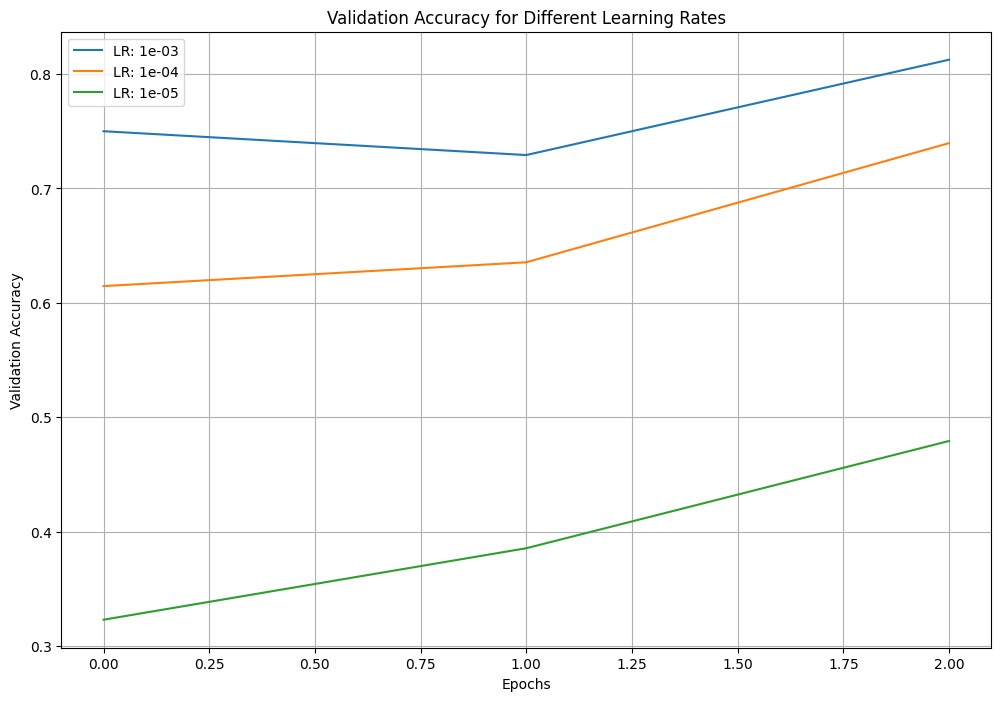


Underfitting and Overfitting Analysis:


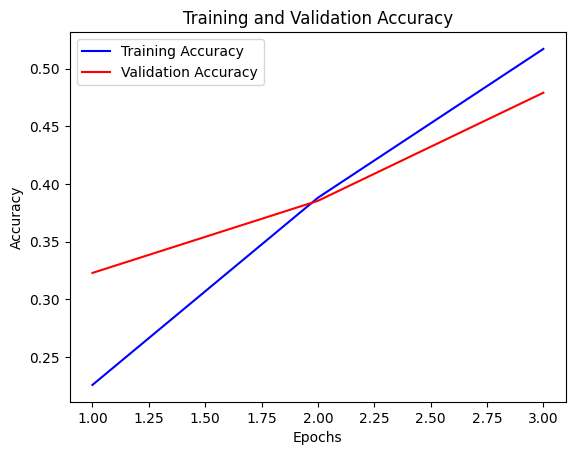


Training Accuracy: 0.5400

Validation Accuracy: 0.5000
4/4 [==============================] - 7s 1s/step

Classification Report for Validation Data:
Class        Precision    Recall       F1-score     Support     
------------------------------------------------------------
cardboard    0.8333       0.2381       0.3704       21          
glass        0.4444       0.7619       0.5614       21          
metal        0.3333       0.0625       0.1053       16          
paper        0.6250       0.7143       0.6667       21          
plastic      0.2857       0.2857       0.2857       7           
trash        0.4583       0.7857       0.5789       14          
------------------------------------------------------------
Validation Accuracy: 0.5000      

Test Accuracy: 0.4100
4/4 [==============================] - 6s 1s/step

Classification Report for Test Data:
Class        Precision    Recall       F1-score     Support     
------------------------------------------------------------
ca

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.efficientnet import preprocess_input, EfficientNetB0
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tqdm import tqdm
import matplotlib.pyplot as plt

# Specify paths
train_csv = '/content/train.csv'
val_csv = '/content/val.csv'
test_csv = '/content/test.csv'
dataset_path = '/content/waste_images'  # Adjust this to your dataset path

# Load CSV files
train_df = pd.read_csv(train_csv)
val_df = pd.read_csv(val_csv)
test_df = pd.read_csv(test_csv)

# Extract image paths and labels
train_paths, train_labels = train_df['image_path'].values, train_df['label'].values
val_paths, val_labels = val_df['image_path'].values, val_df['label'].values
test_paths, test_labels = test_df['image_path'].values, test_df['label'].values

# Encode labels
label_encoder = LabelEncoder()
train_labels_enc = label_encoder.fit_transform(train_labels)
val_labels_enc = label_encoder.transform(val_labels)
test_labels_enc = label_encoder.transform(test_labels)

# Parameters
batch_size = 32
image_size = (224, 224)  # EfficientNet input size

# Function to preprocess images
def load_preprocess_image(image_path, label):
    image_path_str = image_path.numpy().decode('utf-8')  # Decode the bytes to string
    img = load_img(os.path.join(dataset_path, image_path_str), target_size=image_size)
    img_array = img_to_array(img)
    img_array = preprocess_input(img_array)
    return img_array, label

def wrap_load_preprocess_image(image_path, label):
    img, label = tf.py_function(load_preprocess_image, [image_path, label], [tf.float32, tf.int64])
    img.set_shape((image_size[0], image_size[1], 3))
    label.set_shape(())
    return img, label

# Create tf.data.Dataset objects
def create_dataset(paths, labels, batch_size, is_training=False):
    dataset = tf.data.Dataset.from_tensor_slices((paths, labels))
    dataset = dataset.map(wrap_load_preprocess_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    if is_training:
        dataset = dataset.shuffle(buffer_size=len(paths)).repeat()
    dataset = dataset.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)
    return dataset

train_dataset = create_dataset(train_paths, train_labels_enc, batch_size, is_training=True)
val_dataset = create_dataset(val_paths, val_labels_enc, batch_size, is_training=False)
test_dataset = create_dataset(test_paths, test_labels_enc, batch_size, is_training=False)

# Separate training dataset for evaluation (no shuffle or repeat)
train_eval_dataset = create_dataset(train_paths, train_labels_enc, batch_size, is_training=False)

# Function to build and compile the model
def build_compile_model(learning_rate):
    base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(image_size[0], image_size[1], 3))
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    predictions = Dense(len(np.unique(train_labels)), activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Custom tqdm callback for progress visualization
class TQDMCallback(tf.keras.callbacks.Callback):
    def __init__(self, epochs):
        self.epochs = epochs

    def on_epoch_begin(self, epoch, logs=None):
        self.epoch_pbar = tqdm(total=self.params['steps'], desc=f'Epoch {epoch + 1}/{self.epochs}', position=0)

    def on_epoch_end(self, epoch, logs=None):
        self.epoch_pbar.close()

    def on_batch_end(self, batch, logs=None):
        self.epoch_pbar.update(1)

# Learning rates to compare
learning_rates = [1e-3, 1e-4, 1e-5]
history_dict = {}

# Reduce number of epochs for demonstration purposes
num_epochs = 3

# Train the model with different learning rates
for lr in learning_rates:
    print(f"\nTraining with learning rate: {lr}")
    model = build_compile_model(lr)
    tqdm_callback = TQDMCallback(epochs=num_epochs)
    steps_per_epoch = len(train_paths) // batch_size
    validation_steps = len(val_paths) // batch_size

    history = model.fit(train_dataset,
                        validation_data=val_dataset,
                        epochs=num_epochs,
                        steps_per_epoch=steps_per_epoch,
                        validation_steps=validation_steps,
                        verbose=0,
                        callbacks=[tqdm_callback])

    history_dict[lr] = history.history

# Plot validation accuracy for different learning rates
plt.figure(figsize=(12, 8))
for lr, history in history_dict.items():
    plt.plot(history['val_accuracy'], label=f'LR: {lr:.0e}')

plt.title('Validation Accuracy for Different Learning Rates')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Get the last trained model's history
last_history = list(history_dict.values())[-1]

# Underfitting and Overfitting Analysis
train_acc_history = last_history['accuracy']
val_acc_history = last_history['val_accuracy']

print("\nUnderfitting and Overfitting Analysis:")
epochs = range(1, len(train_acc_history) + 1)
plt.plot(epochs, train_acc_history, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc_history, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model on training set
train_loss, train_acc = model.evaluate(train_eval_dataset, verbose=0)
print(f"\nTraining Accuracy: {train_acc:.4f}")

# Evaluate the model on validation set
val_loss, val_acc = model.evaluate(val_dataset, verbose=0)
print(f"\nValidation Accuracy: {val_acc:.4f}")

# Make predictions on validation set
val_pred = model.predict(val_dataset)
val_pred_labels = np.argmax(val_pred, axis=1)

# Print classification report for validation data
val_report = classification_report(val_labels_enc, val_pred_labels[:len(val_labels_enc)], target_names=label_encoder.classes_, output_dict=True)
print("\nClassification Report for Validation Data:")
print(f"{'Class':<12} {'Precision':<12} {'Recall':<12} {'F1-score':<12} {'Support':<12}")
print("-" * 60)
for class_name in label_encoder.classes_:
    precision = val_report[class_name]['precision']
    recall = val_report[class_name]['recall']
    f1_score = val_report[class_name]['f1-score']
    support = val_report[class_name]['support']
    print(f"{class_name:<12} {precision:<12.4f} {recall:<12.4f} {f1_score:<12.4f} {support:<12}")
print("-" * 60)
val_accuracy = val_report['accuracy']
print(f"{'Validation Accuracy:':<12} {val_accuracy:<12.4f}")

# Evaluate the model on test set
test_loss, test_acc = model.evaluate(test_dataset, verbose=0)
print(f"\nTest Accuracy: {test_acc:.4f}")

# Make predictions on test set
test_pred = model.predict(test_dataset)
test_pred_labels = np.argmax(test_pred, axis=1)

# Print classification report for test data
test_report = classification_report(test_labels_enc, test_pred_labels[:len(test_labels_enc)], target_names=label_encoder.classes_, output_dict=True)
print("\nClassification Report for Test Data:")
print(f"{'Class':<12} {'Precision':<12} {'Recall':<12} {'F1-score':<12} {'Support':<12}")
print("-" * 60)
for class_name in label_encoder.classes_:
    precision = test_report[class_name]['precision']
    recall = test_report[class_name]['recall']
    f1_score = test_report[class_name]['f1-score']
    support = test_report[class_name]['support']
    print(f"{class_name:<12} {precision:<12.4f} {recall:<12.4f} {f1_score:<12.4f} {support:<12}")
print("-" * 60)
test_accuracy = test_report['accuracy']
print(f"{'Test Accuracy:':<12} {test_accuracy:<12.4f}")


# efficient adam train test curve


In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.efficientnet import preprocess_input, EfficientNetB0
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tqdm import tqdm

# Specify paths
train_csv = '/content/train.csv'
val_csv = '/content/val.csv'
test_csv = '/content/test.csv'
dataset_path = '/content/waste_images'  # Adjust this to your dataset path

# Load CSV files
train_df = pd.read_csv(train_csv)
val_df = pd.read_csv(val_csv)
test_df = pd.read_csv(test_csv)

# Extract image paths and labels
train_paths, train_labels = train_df['image_path'].values, train_df['label'].values
val_paths, val_labels = val_df['image_path'].values, val_df['label'].values
test_paths, test_labels = test_df['image_path'].values, test_df['label'].values

# Encode labels
label_encoder = LabelEncoder()
train_labels_enc = label_encoder.fit_transform(train_labels)
val_labels_enc = label_encoder.transform(val_labels)
test_labels_enc = label_encoder.transform(test_labels)

# Parameters
batch_size = 32
image_size = (224, 224)  # EfficientNet input size

# Function to preprocess images
def load_preprocess_image(image_path, label):
    image_path_str = image_path.numpy().decode('utf-8')  # Decode the bytes to string
    img = load_img(os.path.join(dataset_path, image_path_str), target_size=image_size)
    img_array = img_to_array(img)
    img_array = preprocess_input(img_array)
    return img_array, label

def wrap_load_preprocess_image(image_path, label):
    img, label = tf.py_function(load_preprocess_image, [image_path, label], [tf.float32, tf.int64])
    img.set_shape((image_size[0], image_size[1], 3))
    label.set_shape(())
    return img, label

# Create tf.data.Dataset objects
def create_dataset(paths, labels, batch_size, is_training=False):
    dataset = tf.data.Dataset.from_tensor_slices((paths, labels))
    dataset = dataset.map(wrap_load_preprocess_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    if is_training:
        dataset = dataset.shuffle(buffer_size=len(paths)).repeat()
    dataset = dataset.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)
    return dataset

train_dataset = create_dataset(train_paths, train_labels_enc, batch_size, is_training=True)
val_dataset = create_dataset(val_paths, val_labels_enc, batch_size, is_training=False)
test_dataset = create_dataset(test_paths, test_labels_enc, batch_size, is_training=False)

# Build and Compile the EfficientNet Model
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(image_size[0], image_size[1], 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(np.unique(train_labels)), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Custom tqdm callback for progress visualization
class TQDMCallback(tf.keras.callbacks.Callback):
    def __init__(self, epochs):
        self.epochs = epochs

    def on_epoch_begin(self, epoch, logs=None):
        self.epoch_pbar = tqdm(total=self.params['steps'], desc=f'Epoch {epoch + 1}/{self.epochs}', position=0)

    def on_epoch_end(self, epoch, logs=None):
        self.epoch_pbar.close()

    def on_batch_end(self, batch, logs=None):
        self.epoch_pbar.update(1)

# Train the model with tqdm integration
tqdm_callback = TQDMCallback(epochs=10)
steps_per_epoch = len(train_paths) // batch_size
validation_steps = len(val_paths) // batch_size

history = model.fit(train_dataset,
                    validation_data=val_dataset,
                    epochs=10,
                    steps_per_epoch=steps_per_epoch,
                    validation_steps=validation_steps,
                    verbose=0,
                    callbacks=[tqdm_callback])

# Evaluate the model on validation set
val_loss, val_acc = model.evaluate(val_dataset, verbose=0)
print(f"\nValidation Accuracy: {val_acc:.4f}")

# Make predictions on validation set
val_pred = model.predict(val_dataset)
val_pred_labels = np.argmax(val_pred, axis=1)

# Print classification report for validation data
val_report = classification_report(val_labels_enc, val_pred_labels[:len(val_labels_enc)], target_names=label_encoder.classes_, output_dict=True)
print("\nClassification Report for Validation Data:")
print(f"{'Class':<12} {'Precision':<12} {'Recall':<12} {'F1-score':<12} {'Support':<12}")
print("-" * 60)
for class_name in label_encoder.classes_:
    precision = val_report[class_name]['precision']
    recall = val_report[class_name]['recall']
    f1_score = val_report[class_name]['f1-score']
    support = val_report[class_name]['support']
    print(f"{class_name:<12} {precision:<12.4f} {recall:<12.4f} {f1_score:<12.4f} {support:<12}")
print("-" * 60)
val_accuracy = val_report['accuracy']
print(f"{'Validation Accuracy:':<12} {val_accuracy:<12.4f}")

# Evaluate the model on test set
test_loss, test_acc = model.evaluate(test_dataset, verbose=0)
print(f"\nTest Accuracy: {test_acc:.4f}")

# Make predictions on test set
test_pred = model.predict(test_dataset)
test_pred_labels = np.argmax(test_pred, axis=1)

# Print classification report for test data
test_report = classification_report(test_labels_enc, test_pred_labels[:len(test_labels_enc)], target_names=label_encoder.classes_, output_dict=True)
print("\nClassification Report for Test Data:")
print(f"{'Class':<12} {'Precision':<12} {'Recall':<12} {'F1-score':<12} {'Support':<12}")
print("-" * 60)
for class_name in label_encoder.classes_:
    precision = test_report[class_name]['precision']
    recall = test_report[class_name]['recall']
    f1_score = test_report[class_name]['f1-score']
    support = test_report[class_name]['support']
    print(f"{class_name:<12} {precision:<12.4f} {recall:<12.4f} {f1_score:<12.4f} {support:<12}")
print("-" * 60)
test_accuracy = test_report['accuracy']
print(f"{'Test Accuracy:':<12} {test_accuracy:<12.4f}")

# Underfitting and Overfitting Analysis
train_acc = history.history['accuracy']
test_acc = history.history['test_accuracy']


print("\nUnderfitting and Overfitting Analysis:")
epochs = range(1, len(train_acc) + 1)
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Test Accuracy')
plt.title('Training and Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling_2 (Rescaling)     (None, 224, 224, 3)          0         ['input_2[0][0]']             
                                                                                                  
 normalization_1 (Normaliza  (None, 224, 224, 3)          7         ['rescaling_2[0][0]']         
 tion)                                                                                            
                                                                                                  
 rescaling_3 (Rescaling)     (None, 224, 224, 3)          0         ['normalization_1[0][0]'] 

Epoch 10/10: 100%|██████████| 31/31 [00:10<00:00,  2.92it/s]



Validation Accuracy: 0.9700
4/4 [==============================] - 2s 97ms/step

Classification Report for Validation Data:
Class        Precision    Recall       F1-score     Support     
------------------------------------------------------------
cardboard    1.0000       1.0000       1.0000       10          
glass        0.8824       0.9375       0.9091       16          
metal        1.0000       0.9500       0.9744       20          
paper        1.0000       1.0000       1.0000       16          
plastic      0.9412       0.9412       0.9412       17          
trash        1.0000       1.0000       1.0000       21          
------------------------------------------------------------
Validation Accuracy: 0.9700      

Test Accuracy: 0.9700
4/4 [==============================] - 0s 82ms/step

Classification Report for Test Data:
Class        Precision    Recall       F1-score     Support     
------------------------------------------------------------
cardboard    1.0000      

KeyError: 'test_accuracy'


Underfitting and Overfitting Analysis:


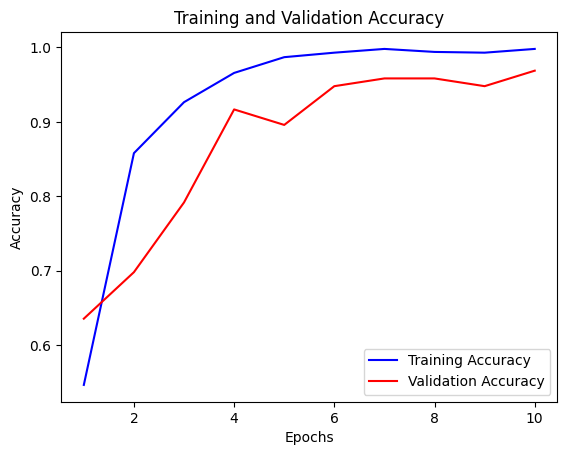

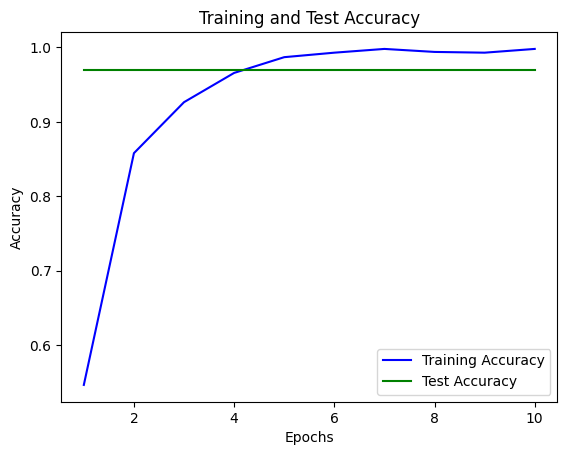


Training Accuracy: 0.9980
Validation Accuracy: 0.9688
Test Accuracy: 0.9700


In [ ]:
import matplotlib.pyplot as plt

# Underfitting and Overfitting Analysis
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

print("\nUnderfitting and Overfitting Analysis:")
epochs = range(1, len(train_acc) + 1)
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot Training and Test Accuracy
plt.figure()
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, [test_acc] * len(epochs), 'g', label='Test Accuracy')
plt.title('Training and Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Print the accuracy results
print(f"\nTraining Accuracy: {train_acc[-1]:.4f}")
print(f"Validation Accuracy: {val_acc[-1]:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")


#efficient confusion

Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_12 (InputLayer)       [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling_22 (Rescaling)    (None, 224, 224, 3)          0         ['input_12[0][0]']            
                                                                                                  
 normalization_11 (Normaliz  (None, 224, 224, 3)          7         ['rescaling_22[0][0]']        
 ation)                                                                                           
                                                                                                  
 rescaling_23 (Rescaling)    (None, 224, 224, 3)          0         ['normalization_11[0][0

Epoch 10/10: 100%|██████████| 31/31 [00:10<00:00,  3.06it/s]



Validation Accuracy: 0.8600
4/4 [==============================] - 2s 102ms/step

Classification Report for Validation Data:
Class        Precision    Recall       F1-score     Support     
------------------------------------------------------------
cardboard    1.0000       0.9048       0.9500       21          
glass        0.8421       0.7619       0.8000       21          
metal        0.8750       0.8750       0.8750       16          
paper        0.9500       0.9048       0.9268       21          
plastic      0.4444       0.5714       0.5000       7           
trash        0.8235       1.0000       0.9032       14          
------------------------------------------------------------
Validation Accuracy: 0.8600      

Test Accuracy: 0.9100
4/4 [==============================] - 0s 92ms/step

Classification Report for Test Data:
Class        Precision    Recall       F1-score     Support     
------------------------------------------------------------
cardboard    0.9333     

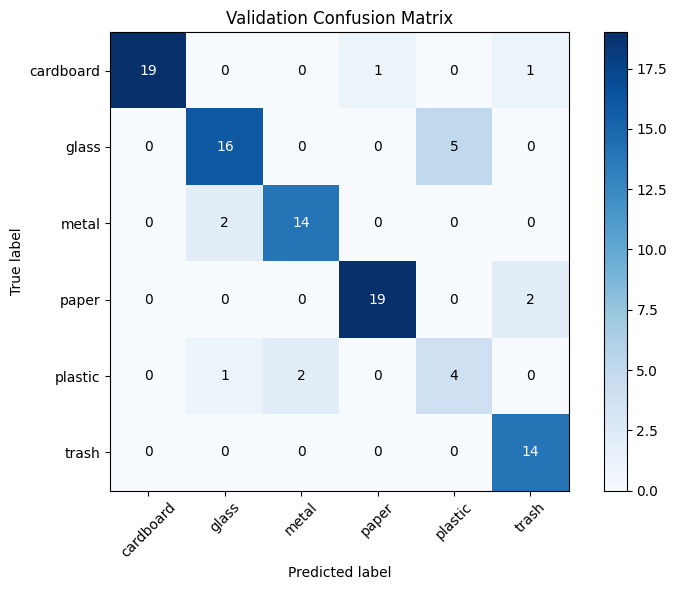

Confusion matrix, without normalization


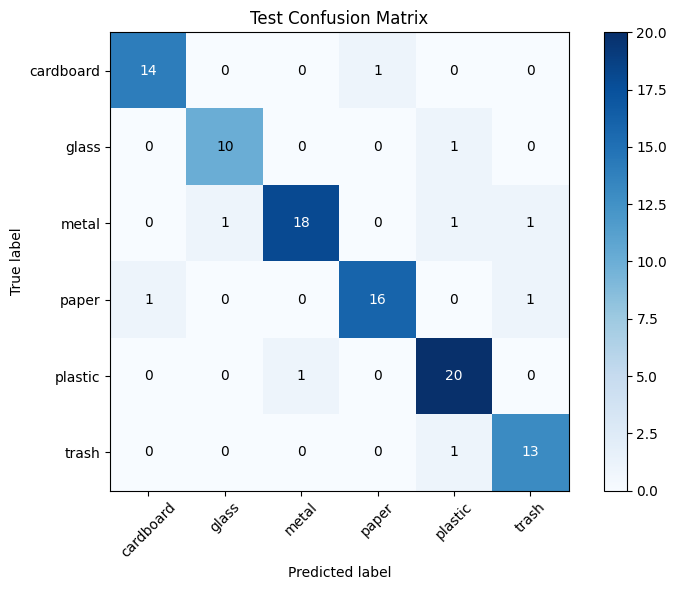


Underfitting and Overfitting Analysis:


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.efficientnet import preprocess_input, EfficientNetB0
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tqdm import tqdm

# Specify paths
train_csv = '/content/train.csv'
val_csv = '/content/val.csv'
test_csv = '/content/test.csv'
dataset_path = '/content/waste_images'  # Adjust this to your dataset path

# Load CSV files
train_df = pd.read_csv(train_csv)
val_df = pd.read_csv(val_csv)
test_df = pd.read_csv(test_csv)

# Extract image paths and labels
train_paths, train_labels = train_df['image_path'].values, train_df['label'].values
val_paths, val_labels = val_df['image_path'].values, val_df['label'].values
test_paths, test_labels = test_df['image_path'].values, test_df['label'].values

# Encode labels
label_encoder = LabelEncoder()
train_labels_enc = label_encoder.fit_transform(train_labels)
val_labels_enc = label_encoder.transform(val_labels)
test_labels_enc = label_encoder.transform(test_labels)

# Parameters
batch_size = 32
image_size = (224, 224)  # EfficientNet input size

# Function to preprocess images
def load_preprocess_image(image_path, label):
    image_path_str = image_path.numpy().decode('utf-8')  # Decode the bytes to string
    img = load_img(os.path.join(dataset_path, image_path_str), target_size=image_size)
    img_array = img_to_array(img)
    img_array = preprocess_input(img_array)
    return img_array, label

def wrap_load_preprocess_image(image_path, label):
    img, label = tf.py_function(load_preprocess_image, [image_path, label], [tf.float32, tf.int64])
    img.set_shape((image_size[0], image_size[1], 3))
    label.set_shape(())
    return img, label

# Create tf.data.Dataset objects
def create_dataset(paths, labels, batch_size, is_training=False):
    dataset = tf.data.Dataset.from_tensor_slices((paths, labels))
    dataset = dataset.map(wrap_load_preprocess_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    if is_training:
        dataset = dataset.shuffle(buffer_size=len(paths)).repeat()
    dataset = dataset.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)
    return dataset

train_dataset = create_dataset(train_paths, train_labels_enc, batch_size, is_training=True)
val_dataset = create_dataset(val_paths, val_labels_enc, batch_size, is_training=False)
test_dataset = create_dataset(test_paths, test_labels_enc, batch_size, is_training=False)

# Build and Compile the EfficientNet Model
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(image_size[0], image_size[1], 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(np.unique(train_labels)), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Custom tqdm callback for progress visualization
class TQDMCallback(tf.keras.callbacks.Callback):
    def __init__(self, epochs):
        self.epochs = epochs

    def on_epoch_begin(self, epoch, logs=None):
        self.epoch_pbar = tqdm(total=self.params['steps'], desc=f'Epoch {epoch + 1}/{self.epochs}', position=0)

    def on_epoch_end(self, epoch, logs=None):
        self.epoch_pbar.close()

    def on_batch_end(self, batch, logs=None):
        self.epoch_pbar.update(1)

# Train the model with tqdm integration
tqdm_callback = TQDMCallback(epochs=10)
steps_per_epoch = len(train_paths) // batch_size
validation_steps = len(val_paths) // batch_size

history = model.fit(train_dataset,
                    validation_data=val_dataset,
                    epochs=10,
                    steps_per_epoch=steps_per_epoch,
                    validation_steps=validation_steps,
                    verbose=0,
                    callbacks=[tqdm_callback])

# Evaluate the model on validation set
val_loss, val_acc = model.evaluate(val_dataset, verbose=0)
print(f"\nValidation Accuracy: {val_acc:.4f}")

# Make predictions on validation set
val_pred = model.predict(val_dataset)
val_pred_labels = np.argmax(val_pred, axis=1)

# Print classification report for validation data
val_report = classification_report(val_labels_enc, val_pred_labels[:len(val_labels_enc)], target_names=label_encoder.classes_, output_dict=True)
print("\nClassification Report for Validation Data:")
print(f"{'Class':<12} {'Precision':<12} {'Recall':<12} {'F1-score':<12} {'Support':<12}")
print("-" * 60)
for class_name in label_encoder.classes_:
    precision = val_report[class_name]['precision']
    recall = val_report[class_name]['recall']
    f1_score = val_report[class_name]['f1-score']
    support = val_report[class_name]['support']
    print(f"{class_name:<12} {precision:<12.4f} {recall:<12.4f} {f1_score:<12.4f} {support:<12}")
print("-" * 60)
val_accuracy = val_report['accuracy']
print(f"{'Validation Accuracy:':<12} {val_accuracy:<12.4f}")

# Evaluate the model on test set
test_loss, test_acc = model.evaluate(test_dataset, verbose=0)
print(f"\nTest Accuracy: {test_acc:.4f}")

# Make predictions on test set
test_pred = model.predict(test_dataset)
test_pred_labels = np.argmax(test_pred, axis=1)

# Print classification report for test data
test_report = classification_report(test_labels_enc, test_pred_labels[:len(test_labels_enc)], target_names=label_encoder.classes_, output_dict=True)
print("\nClassification Report for Test Data:")
print(f"{'Class':<12} {'Precision':<12} {'Recall':<12} {'F1-score':<12} {'Support':<12}")
print("-" * 60)
for class_name in label_encoder.classes_:
    precision = test_report[class_name]['precision']
    recall = test_report[class_name]['recall']
    f1_score = test_report[class_name]['f1-score']
    support = test_report[class_name]['support']
    print(f"{class_name:<12} {precision:<12.4f} {recall:<12.4f} {f1_score:<12.4f} {support:<12}")
print("-" * 60)
test_accuracy = test_report['accuracy']
print(f"{'Test Accuracy:':<12} {test_accuracy:<12.4f}")

# Plot confusion matrix for test data
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title if title else 'Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

# Plot confusion matrix for validation data
plot_confusion_matrix(val_labels_enc, val_pred_labels[:len(val_labels_enc)], label_encoder.classes_, normalize=False, title='Validation Confusion Matrix')

# Plot confusion matrix for test data
plot_confusion_matrix(test_labels_enc, test_pred_labels[:len(test_labels_enc)], label_encoder.classes_, normalize=False, title='Test Confusion Matrix')

# Underfitting and Overfitting Analysis
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

print("\nUnderfitting and Overfitting Analysis:")
epochs = range(1, len(train_acc) + 1)
plt


# efficient scratch


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Define a simplified EfficientNet-like block (for demonstration purposes)
def efficient_block(inputs, filters, kernel_size, strides, activation='swish'):
    x = Conv2D(filters, kernel_size, strides=strides, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation(activation)(x)
    return x

# Building a simplified EfficientNet from scratch
def build_efficientnet(input_shape=(224, 224, 3), num_classes=10):
    inputs = tf.keras.Input(shape=input_shape)
    x = efficient_block(inputs, filters=32, kernel_size=3, strides=2)
    x = efficient_block(x, filters=64, kernel_size=3, strides=2)
    x = efficient_block(x, filters=128, kernel_size=3, strides=2)
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs, outputs)
    return model

# Define the model
model = build_efficientnet(input_shape=(224, 224, 3), num_classes=len(np.unique(train_labels)))

# Compile the model with the same parameters as the transfer learning setup
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model with the same parameters
history = model.fit(train_dataset,
                    validation_data=val_dataset,
                    epochs=10,  # Same number of epochs as transfer learning
                    steps_per_epoch=steps_per_epoch,
                    validation_steps=validation_steps,
                    verbose=1,
                    callbacks=[tqdm_callback])

# Evaluate the model on the validation set
val_loss, val_acc = model.evaluate(val_dataset, verbose=0)
print(f"\nValidation Accuracy: {val_acc:.4f}")

# Make predictions on the validation set
val_pred = model.predict(val_dataset)
val_pred_labels = np.argmax(val_pred, axis=1)

# Print classification report for validation data
val_report = classification_report(val_labels_enc, val_pred_labels[:len(val_labels_enc)], target_names=label_encoder.classes_, output_dict=True)
print("\nClassification Report for Validation Data:")
print(f"{'Class':<12} {'Precision':<12} {'Recall':<12} {'F1-score':<12} {'Support':<12}")
print("-" * 60)
for class_name in label_encoder.classes_:
    precision = val_report[class_name]['precision']
    recall = val_report[class_name]['recall']
    f1_score = val_report[class_name]['f1-score']
    support = val_report[class_name]['support']
    print(f"{class_name:<12} {precision:<12.4f} {recall:<12.4f} {f1_score:<12.4f} {support:<12}")
print("-" * 60)
val_accuracy = val_report['accuracy']
print(f"{'Validation Accuracy:':<12} {val_accuracy:<12.4f}")

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_dataset, verbose=0)
print(f"\nTest Accuracy: {test_acc:.4f}")

# Make predictions on the test set
test_pred = model.predict(test_dataset)
test_pred_labels = np.argmax(test_pred, axis=1)

# Print classification report for test data
test_report = classification_report(test_labels_enc, test_pred_labels[:len(test_labels_enc)], target_names=label_encoder.classes_, output_dict=True)
print("\nClassification Report for Test Data:")
print(f"{'Class':<12} {'Precision':<12} {'Recall':<12} {'F1-score':<12} {'Support':<12}")
print("-" * 60)
for class_name in label_encoder.classes_:
    precision = test_report[class_name]['precision']
    recall = test_report[class_name]['recall']
    f1_score = test_report[class_name]['f1-score']
    support = test_report[class_name]['support']
    print(f"{class_name:<12} {precision:<12.4f} {recall:<12.4f} {f1_score:<12.4f} {support:<12}")
print("-" * 60)
test_accuracy = test_report['accuracy']
print(f"{'Test Accuracy:':<12} {test_accuracy:<12.4f}")


Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_8 (Conv2D)           (None, 112, 112, 32)      896       
                                                                 
 batch_normalization_8 (Bat  (None, 112, 112, 32)      128       
 chNormalization)                                                
                                                                 
 activation (Activation)     (None, 112, 112, 32)      0         
                                                                 
 conv2d_9 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 batch_normalization_9 (Bat  (None, 56, 56, 64)        256       
 chNormalization)                                          

Epoch 1/10:   0%|          | 0/31 [00:00<?, ?it/s]

Epoch 1/10


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "model_5" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(None, 299, 299, 3)


# efficientnet + augmentation



16705208/16705208 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 224, 224, 3)          0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 224, 224, 3)          7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     

Epoch 10/10: 100%|██████████| 31/31 [04:43<00:00,  9.13s/it]



Validation Accuracy: 0.8600
4/4 [==============================] - 8s 1s/step

Classification Report for Validation Data:
Class        Precision    Recall       F1-score     Support     
------------------------------------------------------------
cardboard    1.0000       0.9524       0.9756       21          
glass        0.7778       0.6667       0.7179       21          
metal        0.8824       0.9375       0.9091       16          
paper        0.9524       0.9524       0.9524       21          
plastic      0.3333       0.4286       0.3750       7           
trash        0.9333       1.0000       0.9655       14          
------------------------------------------------------------
Validation Accuracy: 0.8600      

Test Accuracy: 0.8900
4/4 [==============================] - 7s 2s/step

Classification Report for Test Data:
Class        Precision    Recall       F1-score     Support     
------------------------------------------------------------
cardboard    0.9375       1.0

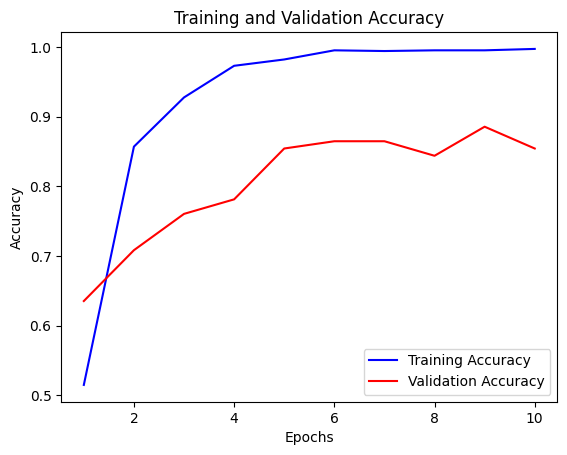

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from tensorflow.keras.applications.efficientnet import preprocess_input, EfficientNetB0
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tqdm import tqdm
import matplotlib.pyplot as plt

# Specify paths
train_csv = '/content/train.csv'
val_csv = '/content/val.csv'
test_csv = '/content/test.csv'
dataset_path = '/content/waste_images'  # Adjust this to your dataset path

# Load CSV files
train_df = pd.read_csv(train_csv)
val_df = pd.read_csv(val_csv)
test_df = pd.read_csv(test_csv)

# Extract image paths and labels
train_paths, train_labels = train_df['image_path'].values, train_df['label'].values
val_paths, val_labels = val_df['image_path'].values, val_df['label'].values
test_paths, test_labels = test_df['image_path'].values, test_df['label'].values

# Encode labels
label_encoder = LabelEncoder()
train_labels_enc = label_encoder.fit_transform(train_labels)
val_labels_enc = label_encoder.transform(val_labels)
test_labels_enc = label_encoder.transform(test_labels)

# Parameters
batch_size = 32
image_size = (224, 224)  # EfficientNet input size

# Custom preprocessing function for contrast adjustment
def custom_preprocessing_function(img):
    img = preprocess_input(img)
    img = tf.image.adjust_contrast(img, contrast_factor=1.5)  # Adjust contrast
    return img

# Data augmentation
train_datagen = ImageDataGenerator(
    preprocessing_function=custom_preprocessing_function,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.2,
    brightness_range=[0.8, 1.2]
)

val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# Function to preprocess images
def load_preprocess_image(image_path, label):
    image_path_str = image_path.numpy().decode('utf-8')  # Decode the bytes to string
    img = load_img(os.path.join(dataset_path, image_path_str), target_size=image_size)
    img_array = img_to_array(img)
    img_array = preprocess_input(img_array)
    return img_array, label

def wrap_load_preprocess_image(image_path, label):
    img, label = tf.py_function(load_preprocess_image, [image_path, label], [tf.float32, tf.int64])
    img.set_shape((image_size[0], image_size[1], 3))
    label.set_shape(())
    return img, label

# Create tf.data.Dataset objects
def create_dataset(paths, labels, batch_size, is_training=False):
    dataset = tf.data.Dataset.from_tensor_slices((paths, labels))
    dataset = dataset.map(wrap_load_preprocess_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    if is_training:
        dataset = dataset.shuffle(buffer_size=len(paths)).repeat()
    dataset = dataset.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)
    return dataset

train_dataset = create_dataset(train_paths, train_labels_enc, batch_size, is_training=True)
val_dataset = create_dataset(val_paths, val_labels_enc, batch_size, is_training=False)
test_dataset = create_dataset(test_paths, test_labels_enc, batch_size, is_training=False)

# Build and Compile the EfficientNet Model
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(image_size[0], image_size[1], 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(np.unique(train_labels)), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Custom tqdm callback for progress visualization
class TQDMCallback(tf.keras.callbacks.Callback):
    def __init__(self, epochs):
        self.epochs = epochs

    def on_epoch_begin(self, epoch, logs=None):
        self.epoch_pbar = tqdm(total=self.params['steps'], desc=f'Epoch {epoch + 1}/{self.epochs}', position=0)

    def on_epoch_end(self, epoch, logs=None):
        self.epoch_pbar.close()

    def on_batch_end(self, batch, logs=None):
        self.epoch_pbar.update(1)

# Train the model with tqdm integration
tqdm_callback = TQDMCallback(epochs=10)
steps_per_epoch = len(train_paths) // batch_size
validation_steps = len(val_paths) // batch_size

history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    verbose=0,
    callbacks=[tqdm_callback]
)

# Evaluate the model on validation set
val_loss, val_acc = model.evaluate(val_dataset, verbose=0)
print(f"\nValidation Accuracy: {val_acc:.4f}")

# Make predictions on validation set
val_pred = model.predict(val_dataset)
val_pred_labels = np.argmax(val_pred, axis=1)

# Print classification report for validation data
val_report = classification_report(val_labels_enc, val_pred_labels[:len(val_labels_enc)], target_names=label_encoder.classes_, output_dict=True)
print("\nClassification Report for Validation Data:")
print(f"{'Class':<12} {'Precision':<12} {'Recall':<12} {'F1-score':<12} {'Support':<12}")
print("-" * 60)
for class_name in label_encoder.classes_:
    precision = val_report[class_name]['precision']
    recall = val_report[class_name]['recall']
    f1_score = val_report[class_name]['f1-score']
    support = val_report[class_name]['support']
    print(f"{class_name:<12} {precision:<12.4f} {recall:<12.4f} {f1_score:<12.4f} {support:<12}")
print("-" * 60)
val_accuracy = val_report['accuracy']
print(f"{'Validation Accuracy:':<12} {val_accuracy:<12.4f}")

# Evaluate the model on test set
test_loss, test_acc = model.evaluate(test_dataset, verbose=0)
print(f"\nTest Accuracy: {test_acc:.4f}")

# Make predictions on test set
test_pred = model.predict(test_dataset)
test_pred_labels = np.argmax(test_pred, axis=1)

# Print classification report for test data
test_report = classification_report(test_labels_enc, test_pred_labels[:len(test_labels_enc)], target_names=label_encoder.classes_, output_dict=True)
print("\nClassification Report for Test Data:")
print(f"{'Class':<12} {'Precision':<12} {'Recall':<12} {'F1-score':<12} {'Support':<12}")
print("-" * 60)
for class_name in label_encoder.classes_:
    precision = test_report[class_name]['precision']
    recall = test_report[class_name]['recall']
    f1_score = test_report[class_name]['f1-score']
    support = test_report[class_name]['support']
    print(f"{class_name:<12} {precision:<12.4f} {recall:<12.4f} {f1_score:<12.4f} {support:<12}")
print("-" * 60)
test_accuracy = test_report['accuracy']
print(f"{'Test Accuracy:':<12} {test_accuracy:<12.4f}")

# Underfitting and Overfitting Analysis
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

print("\nUnderfitting and Overfitting Analysis:")
epochs = range(1, len(train_acc) + 1)
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# ViT

In [ ]:
!pip install tensorflow_addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 3.5 MB/s eta 0:00:00


In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from transformers import ViTImageProcessor, TFViTForImageClassification
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import mixed_precision
from tqdm import tqdm
import matplotlib.pyplot as plt

# Enable mixed precision training
mixed_precision.set_global_policy('mixed_float16')

# Specify paths
train_csv = '/content/train.csv'
val_csv = '/content/val.csv'
test_csv = '/content/test.csv'
dataset_path = '/content/waste_images'  # Adjust this to your dataset path

# Load CSV files
train_df = pd.read_csv(train_csv)
val_df = pd.read_csv(val_csv)
test_df = pd.read_csv(test_csv)

# Extract image paths and labels
train_paths, train_labels = train_df['image_path'].values, train_df['label'].values
val_paths, val_labels = val_df['image_path'].values, val_df['label'].values
test_paths, test_labels = test_df['image_path'].values, test_df['label'].values

# Encode labels
label_encoder = LabelEncoder()
train_labels_enc = label_encoder.fit_transform(train_labels)
val_labels_enc = label_encoder.transform(val_labels)
test_labels_enc = label_encoder.transform(test_labels)

# Parameters
batch_size = 32
image_size = (224, 224)  # Input size for ViT
num_classes = len(np.unique(train_labels))

# Feature extractor for ViT
feature_extractor = ViTImageProcessor.from_pretrained('google/vit-base-patch16-224')

# Function to preprocess images
def preprocess_image(image_path, label):
    image_path_str = image_path.numpy().decode('utf-8')  # Decode the bytes to string
    img = load_img(os.path.join(dataset_path, image_path_str), target_size=image_size)
    img_array = img_to_array(img)
    img_array = feature_extractor(images=img_array, return_tensors="tf")['pixel_values'][0]
    return img_array, label

def wrap_preprocess_image(image_path, label):
    img, label = tf.py_function(preprocess_image, [image_path, label], [tf.float32, tf.int64])
    img.set_shape((224, 224, 3))  # Adjust shape to (height, width, channels)
    label.set_shape(())
    return img, label

# Create tf.data.Dataset objects
def create_dataset(paths, labels, batch_size, is_training=False):
    dataset = tf.data.Dataset.from_tensor_slices((paths, labels))
    dataset = dataset.map(wrap_preprocess_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    if is_training:
        dataset = dataset.shuffle(buffer_size=len(paths)).repeat()
    dataset = dataset.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)
    return dataset

train_dataset = create_dataset(train_paths, train_labels_enc, batch_size, is_training=True)
val_dataset = create_dataset(val_paths, val_labels_enc, batch_size, is_training=False)
test_dataset = create_dataset(test_paths, test_labels_enc, batch_size, is_training=False)

# Define the model using transfer learning
def build_vit_model():
    vit_model = TFViTForImageClassification.from_pretrained('google/vit-base-patch16-224', num_labels=num_classes, ignore_mismatched_sizes=True)
    inputs = tf.keras.layers.Input(shape=(224, 224, 3))  # Adjust shape to (height, width, channels)

    # Get the outputs from the pre-trained ViT model
    vit_outputs = vit_model.vit(inputs)[0][:, 0, :]  # Use only the first token (class token)

    # Classification head
    outputs = tf.keras.layers.Dense(units=num_classes, activation='softmax', dtype='float32')(vit_outputs)

    model = tf.keras.models.Model(inputs=inputs, outputs=outputs)
    return model

# Build the model
model = build_vit_model()

# Compile the model
model.compile(optimizer=Adam(learning_rate=3e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_dataset, epochs=20, validation_data=val_dataset, steps_per_epoch=len(train_paths) // batch_size, validation_steps=len(val_paths) // batch_size)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test accuracy: {test_accuracy}")

# Classification report
pred_labels = np.argmax(model.predict(test_dataset), axis=1)
print(classification_report(test_labels_enc, pred_labels, target_names=label_encoder.classes_))

# Plotting the training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFViTForImageClassification: ['classifier.bias', 'classifier.weight']
- This IS expected if you are initializing TFViTForImageClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFViTForImageClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFViTForImageClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFViTForImageClassification for predictions without further training.
Some weights of TFViTForImageClassification were not initialized from the model checkpoint are newly initialize

ValueError: Exception encountered when calling layer 'patch_embeddings' (type TFViTPatchEmbeddings).

Make sure that the channel dimension of the pixel values match with the one set in the configuration.

Call arguments received by layer 'patch_embeddings' (type TFViTPatchEmbeddings):
  • pixel_values=<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_16')>
  • interpolate_pos_encoding=None
  • training=False

# Vit 00001

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 patches (Patches)           (None, None, 768)            0         ['input_2[0][0]']             
                                                                                                  
 patch_encoder (PatchEncode  (None, 196, 64)              61760     ['patches[0][0]']             
 r)                                                                                               
                                                                                                  
 layer_normalization (Layer  (None, 196, 64)              128       ['patch_encoder[0][0]'] 

Epoch 10/10: 100%|██████████| 31/31 [01:50<00:00,  3.56s/it]



Validation Accuracy: 0.3100
4/4 [==============================] - 5s 975ms/step

Classification Report for Validation Data:
Class        Precision    Recall       F1-score     Support     
------------------------------------------------------------
cardboard    0.7273       0.3810       0.5000       21          
glass        1.0000       0.0952       0.1739       21          
metal        0.3333       0.0625       0.1053       16          
paper        1.0000       0.0476       0.0909       21          
plastic      0.1622       0.8571       0.2727       7           
trash        0.2826       0.9286       0.4333       14          
------------------------------------------------------------
Validation Accuracy: 0.3100      

Test Accuracy: 0.4100
4/4 [==============================] - 3s 647ms/step

Classification Report for Test Data:
Class        Precision    Recall       F1-score     Support     
------------------------------------------------------------
cardboard    0.6154    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


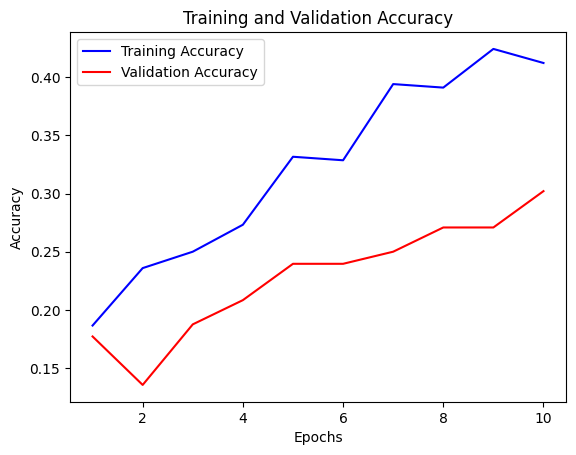

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.optimizers import Adam
from tqdm import tqdm
import tensorflow_addons as tfa

# Specify paths
train_csv = '/content/train.csv'
val_csv = '/content/val.csv'
test_csv = '/content/test.csv'
dataset_path = '/content/waste_images'  # Adjust this to your dataset path

# Load CSV files
train_df = pd.read_csv(train_csv)
val_df = pd.read_csv(val_csv)
test_df = pd.read_csv(test_csv)

# Extract image paths and labels
train_paths, train_labels = train_df['image_path'].values, train_df['label'].values
val_paths, val_labels = val_df['image_path'].values, val_df['label'].values
test_paths, test_labels = test_df['image_path'].values, test_df['label'].values

# Encode labels
label_encoder = LabelEncoder()
train_labels_enc = label_encoder.fit_transform(train_labels)
val_labels_enc = label_encoder.transform(val_labels)
test_labels_enc = label_encoder.transform(test_labels)

# Parameters
batch_size = 32
image_size = (224, 224)  # Input size for ViT
patch_size = 16
num_patches = (image_size[0] // patch_size) ** 2
projection_dim = 64
num_heads = 4
transformer_units = [projection_dim * 2, projection_dim]
transformer_layers = 8
mlp_head_units = [2048, 1024]

# Function to preprocess images
def load_preprocess_image(image_path, label):
    image_path_str = image_path.numpy().decode('utf-8')  # Decode the bytes to string
    img = load_img(os.path.join(dataset_path, image_path_str), target_size=image_size)
    img_array = img_to_array(img)
    img_array = img_array / 255.0  # Normalize to [0, 1]
    return img_array, label

def wrap_load_preprocess_image(image_path, label):
    img, label = tf.py_function(load_preprocess_image, [image_path, label], [tf.float32, tf.int64])
    img.set_shape((image_size[0], image_size[1], 3))
    label.set_shape(())
    return img, label

# Create tf.data.Dataset objects
def create_dataset(paths, labels, batch_size, is_training=False):
    dataset = tf.data.Dataset.from_tensor_slices((paths, labels))
    dataset = dataset.map(wrap_load_preprocess_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    if is_training:
        dataset = dataset.shuffle(buffer_size=len(paths)).repeat()
    dataset = dataset.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)
    return dataset

train_dataset = create_dataset(train_paths, train_labels_enc, batch_size, is_training=True)
val_dataset = create_dataset(val_paths, val_labels_enc, batch_size, is_training=False)
test_dataset = create_dataset(test_paths, test_labels_enc, batch_size, is_training=False)

# Vision Transformer (ViT) Model
class Patches(tf.keras.layers.Layer):
    def __init__(self, patch_size):
        super(Patches, self).__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding='VALID',
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

class PatchEncoder(tf.keras.layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection = tf.keras.layers.Dense(units=projection_dim)
        self.position_embedding = tf.keras.layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

def build_vit_model():
    inputs = tf.keras.layers.Input(shape=(image_size[0], image_size[1], 3))
    patches = Patches(patch_size)(inputs)
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    for _ in range(transformer_layers):
        # Layer normalization 1.
        x1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Create a multi-head attention layer.
        attention_output = tf.keras.layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        # Skip connection 1.
        x2 = tf.keras.layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = tf.keras.layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = tf.keras.layers.Dense(units=transformer_units[0], activation=tf.nn.gelu)(x3)
        x3 = tf.keras.layers.Dense(units=transformer_units[1], activation=tf.nn.gelu)(x3)
        # Skip connection 2.
        encoded_patches = tf.keras.layers.Add()([x3, x2])

    representation = tf.keras.layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = tf.keras.layers.Flatten()(representation)
    representation = tf.keras.layers.Dropout(0.5)(representation)

    features = tf.keras.layers.Dense(units=mlp_head_units[0], activation=tf.nn.gelu)(representation)
    features = tf.keras.layers.Dropout(0.5)(features)
    features = tf.keras.layers.Dense(units=mlp_head_units[1], activation=tf.nn.gelu)(features)
    logits = tf.keras.layers.Dense(len(np.unique(train_labels)), activation='softmax')(features)

    model = tf.keras.Model(inputs=inputs, outputs=logits)
    return model

vit_model = build_vit_model()

# Compile the model
vit_model.compile(optimizer=Adam(learning_rate=0.00001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
vit_model.summary()

# Custom tqdm callback for progress visualization
class TQDMCallback(tf.keras.callbacks.Callback):
    def __init__(self, epochs):
        self.epochs = epochs

    def on_epoch_begin(self, epoch, logs=None):
        self.epoch_pbar = tqdm(total=self.params['steps'], desc=f'Epoch {epoch + 1}/{self.epochs}', position=0)

    def on_epoch_end(self, epoch, logs=None):
        self.epoch_pbar.close()

    def on_batch_end(self, batch, logs=None):
        self.epoch_pbar.update(1)

# Train the model with tqdm integration
tqdm_callback = TQDMCallback(epochs=10)
steps_per_epoch = len(train_paths) // batch_size
validation_steps = len(val_paths) // batch_size

history = vit_model.fit(train_dataset,
                        validation_data=val_dataset,
                        epochs=10,
                        steps_per_epoch=steps_per_epoch,
                        validation_steps=validation_steps,
                        verbose=0,
                        callbacks=[tqdm_callback])

# Evaluate the model on validation set
val_loss, val_acc = vit_model.evaluate(val_dataset, verbose=0)
print(f"\nValidation Accuracy: {val_acc:.4f}")

# Make predictions on validation set
val_pred = vit_model.predict(val_dataset)
val_pred_labels = np.argmax(val_pred, axis=1)

# Print classification report for validation data
val_report = classification_report(val_labels_enc, val_pred_labels[:len(val_labels_enc)], target_names=label_encoder.classes_, output_dict=True)
print("\nClassification Report for Validation Data:")
print(f"{'Class':<12} {'Precision':<12} {'Recall':<12} {'F1-score':<12} {'Support':<12}")
print("-" * 60)
for class_name in label_encoder.classes_:
    precision = val_report[class_name]['precision']
    recall = val_report[class_name]['recall']
    f1_score = val_report[class_name]['f1-score']
    support = val_report[class_name]['support']
    print(f"{class_name:<12} {precision:<12.4f} {recall:<12.4f} {f1_score:<12.4f} {support:<12}")
print("-" * 60)
val_accuracy = val_report['accuracy']
print(f"{'Validation Accuracy:':<12} {val_accuracy:<12.4f}")

# Evaluate the model on test set
test_loss, test_acc = vit_model.evaluate(test_dataset, verbose=0)
print(f"\nTest Accuracy: {test_acc:.4f}")



# Make predictions on test set
test_pred = vit_model.predict(test_dataset)
test_pred_labels = np.argmax(test_pred, axis=1)

# Print classification report for test data
test_report = classification_report(test_labels_enc, test_pred_labels[:len(test_labels_enc)], target_names=label_encoder.classes_, output_dict=True)
print("\nClassification Report for Test Data:")
print(f"{'Class':<12} {'Precision':<12} {'Recall':<12} {'F1-score':<12} {'Support':<12}")
print("-" * 60)
for class_name in label_encoder.classes_:
    precision = test_report[class_name]['precision']
    recall = test_report[class_name]['recall']
    f1_score = test_report[class_name]['f1-score']
    support = test_report[class_name]['support']
    print(f"{class_name:<12} {precision:<12.4f} {recall:<12.4f} {f1_score:<12.4f} {support:<12}")
print("-" * 60)
test_accuracy = test_report['accuracy']
print(f"{'Test Accuracy:':<12} {test_accuracy:<12.4f}")

# Underfitting and Overfitting Analysis
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

print("\nUnderfitting and Overfitting Analysis:")
epochs = range(1, len(train_acc) + 1)
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#ViT TL

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from transformers import ViTImageProcessor, TFViTForImageClassification
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.optimizers import Adam
from tqdm import tqdm
import matplotlib.pyplot as plt

# Specify paths
train_csv = '/content/train.csv'
val_csv = '/content/val.csv'
test_csv = '/content/test.csv'
dataset_path = '/content/waste_images'  # Adjust this to your dataset path

# Load CSV files
train_df = pd.read_csv(train_csv)
val_df = pd.read_csv(val_csv)
test_df = pd.read_csv(test_csv)

# Extract image paths and labels
train_paths, train_labels = train_df['image_path'].values, train_df['label'].values
val_paths, val_labels = val_df['image_path'].values, val_df['label'].values
test_paths, test_labels = test_df['image_path'].values, test_df['label'].values

# Encode labels
label_encoder = LabelEncoder()
train_labels_enc = label_encoder.fit_transform(train_labels)
val_labels_enc = label_encoder.transform(val_labels)
test_labels_enc = label_encoder.transform(test_labels)

# Parameters
batch_size = 32
image_size = (224, 224)  # Input size for ViT
num_classes = len(np.unique(train_labels))

# Feature extractor for ViT
feature_extractor = ViTImageProcessor.from_pretrained('google/vit-base-patch16-224')

# Function to preprocess images
def preprocess_image(image_path, label):
    image_path_str = image_path.numpy().decode('utf-8')  # Decode the bytes to string
    img = load_img(os.path.join(dataset_path, image_path_str), target_size=image_size)
    img_array = img_to_array(img)
    img_array = feature_extractor(images=img_array, return_tensors="tf")['pixel_values'][0]
    return img_array, label

def wrap_preprocess_image(image_path, label):
    img, label = tf.py_function(preprocess_image, [image_path, label], [tf.float32, tf.int64])
    img.set_shape((3, image_size[0], image_size[1]))  # Adjust shape to (channels, height, width)
    label.set_shape(())
    return img, label

# Create tf.data.Dataset objects
def create_dataset(paths, labels, batch_size, is_training=False):
    dataset = tf.data.Dataset.from_tensor_slices((paths, labels))
    dataset = dataset.map(wrap_preprocess_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    if is_training:
        dataset = dataset.shuffle(buffer_size=len(paths)).repeat()
    dataset = dataset.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)
    return dataset

train_dataset = create_dataset(train_paths, train_labels_enc, batch_size, is_training=True)
val_dataset = create_dataset(val_paths, val_labels_enc, batch_size, is_training=False)
test_dataset = create_dataset(test_paths, test_labels_enc, batch_size, is_training=False)

# Define the model using transfer learning
def build_vit_model():
    vit_model = TFViTForImageClassification.from_pretrained('google/vit-base-patch16-224', num_labels=num_classes, ignore_mismatched_sizes=True)
    inputs = tf.keras.layers.Input(shape=(3, image_size[0], image_size[1]))  # Adjust shape to (channels, height, width)

    # Get the outputs from the pre-trained ViT model
    vit_outputs = vit_model.vit(inputs)[0][:, 0, :]  # Use only the first token (class token)

    # Classification head
    outputs = tf.keras.layers.Dense(units=num_classes, activation='softmax')(vit_outputs)

    model = tf.keras.models.Model(inputs=inputs, outputs=outputs)
    return model

# Build the model
model = build_vit_model()

# Compile the model
model.compile(optimizer=Adam(learning_rate=3e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_dataset, epochs=10, validation_data=val_dataset, steps_per_epoch=len(train_paths) // batch_size, validation_steps=len(val_paths) // batch_size)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test accuracy: {test_accuracy}")

# Classification report
pred_labels = np.argmax(model.predict(test_dataset), axis=1)
print(classification_report(test_labels_enc, pred_labels, target_names=label_encoder.classes_))

# Plotting the training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFViTForImageClassification: ['classifier.bias', 'classifier.weight']
- This IS expected if you are initializing TFViTForImageClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFViTForImageClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFViTForImageClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFViTForImageClassification for predictions without further training.
Some weights of TFViTForImageClassification were not initialized from the model checkpoint are newly initialize

Epoch 1/10
31/31 [==============================] - 893s 27s/step - loss: 1.9654 - accuracy: 0.2853 - val_loss: 1.3082 - val_accuracy: 0.5208
Epoch 2/10
31/31 [==============================] - 814s 26s/step - loss: 1.1798 - accuracy: 0.5756 - val_loss: 0.9115 - val_accuracy: 0.7188
Epoch 3/10
20/31 [==================>...........] - ETA: 4:20 - loss: 0.8711 - accuracy: 0.6969

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# ResNext

In [ ]:
!pip install keras-applications

In [ ]:
!pip install tensorflow --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 MB 953.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 43.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 37.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 39.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 44.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.7/347.7 kB 27.7 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_1  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_1 (Dense)             (None, 6)                 12294     
                                                                 
Total params: 23600006 (90.03 MB)
Trainable params: 12294 (48.02 KB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


Epoch 10/10: 100%|██████████| 31/31 [03:38<00:00,  7.06s/it]



Validation Accuracy: 0.8400

Test Accuracy: 0.8600
4/4 [==============================] - 21s 4s/step

Classification Report for Validation Data:
Class        Precision    Recall       F1-score     Support     
------------------------------------------------------------
cardboard    0.9412       0.8889       0.9143       18          
glass        0.7857       0.8462       0.8148       13          
metal        0.8750       0.8235       0.8485       17          
paper        0.8500       0.7727       0.8095       22          
plastic      0.9231       0.7500       0.8276       16          
trash        0.7000       1.0000       0.8235       14          
------------------------------------------------------------
Validation Accuracy: 0.8400      
4/4 [==============================] - 20s 4s/step

Classification Report for Test Data:
Class        Precision    Recall       F1-score     Support     
------------------------------------------------------------
cardboard    0.9375       0

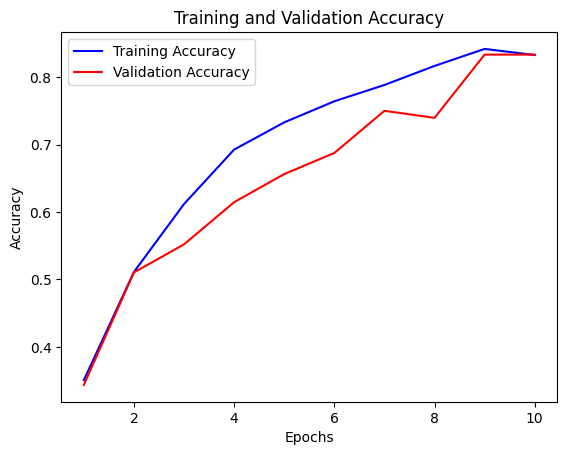

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tqdm import tqdm
import matplotlib.pyplot as plt

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

# Specify paths
train_csv = '/content/train.csv'
val_csv = '/content/val.csv'
test_csv = '/content/test.csv'
dataset_path = '/content/waste_images'  # Adjust this to your dataset path

# Load CSV files
train_df = pd.read_csv(train_csv)
val_df = pd.read_csv(val_csv)
test_df = pd.read_csv(test_csv)

# Extract image paths and labels
train_paths, train_labels = train_df['image_path'].values, train_df['label'].values
val_paths, val_labels = val_df['image_path'].values, val_df['label'].values
test_paths, test_labels = test_df['image_path'].values, test_df['label'].values

# Encode labels
label_encoder = LabelEncoder()
train_labels_enc = label_encoder.fit_transform(train_labels)
val_labels_enc = label_encoder.transform(val_labels)
test_labels_enc = label_encoder.transform(test_labels)

# Parameters
batch_size = 32
image_size = (224, 224)

# Function to preprocess images
def load_preåprocess_image(image_path, label):
    image_path_str = image_path.numpy().decode('utf-8')  # Decode the bytes to string
    img = load_img(os.path.join(dataset_path, image_path_str), target_size=image_size)
    img_array = img_to_array(img)
    img_array = preprocess_input(img_array)  # Apply ResNet50 preprocessing
    return img_array, label

def wrap_load_preprocess_image(image_path, label):
    img, label = tf.py_function(load_preprocess_image, [image_path, label], [tf.float32, tf.int64])
    img.set_shape((image_size[0], image_size[1], 3))
    label.set_shape(())
    return img, label

# Create tf.data.Dataset objects
def create_dataset(paths, labels, batch_size, is_training=False):
    dataset = tf.data.Dataset.from_tensor_slices((paths, labels))
    dataset = dataset.map(wrap_load_preprocess_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    if is_training:
        dataset = dataset.shuffle(buffer_size=len(paths)).repeat()
    dataset = dataset.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)
    return dataset

train_dataset = create_dataset(train_paths, train_labels_enc, batch_size, is_training=True)
val_dataset = create_dataset(val_paths, val_labels_enc, batch_size, is_training=False)
test_dataset = create_dataset(test_paths, test_labels_enc, batch_size, is_training=False)

# Create ResNet-50 base model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(image_size[0], image_size[1], 3))

# Freeze the convolutional base
base_model.trainable = False

# Add custom classifier on top of ResNet-50 base
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(len(np.unique(train_labels)), activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Custom tqdm callback for progress visualization
class TQDMCallback(tf.keras.callbacks.Callback):
    def __init__(self, epochs):
        self.epochs = epochs

    def on_epoch_begin(self, epoch, logs=None):
        self.epoch_pbar = tqdm(total=self.params['steps'], desc=f'Epoch {epoch + 1}/{self.epochs}', position=0)

    def on_epoch_end(self, epoch, logs=None):
        self.epoch_pbar.close()

    def on_batch_end(self, batch, logs=None):
        self.epoch_pbar.update(1)

# Calculate steps per epoch
steps_per_epoch = len(train_paths) // batch_size
validation_steps = len(val_paths) // batch_size

# Train the model with tqdm integration
tqdm_callback = TQDMCallback(epochs=10)
history = model.fit(train_dataset,
                    validation_data=val_dataset,
                    epochs=10,
                    steps_per_epoch=steps_per_epoch,
                    validation_steps=validation_steps,
                    verbose=0,
                    callbacks=[tqdm_callback])

# Evaluate the model on validation set
val_loss, val_acc = model.evaluate(val_dataset, verbose=0)
print(f"\nValidation Accuracy: {val_acc:.4f}")

# Evaluate the model on test set
test_loss, test_acc = model.evaluate(test_dataset, verbose=0)
print(f"\nTest Accuracy: {test_acc:.4f}")

# Make predictions on validation set
val_pred = model.predict(val_dataset)
val_pred_labels = np.argmax(val_pred, axis=1)

# Print classification report for validation data
val_report = classification_report(val_labels_enc, val_pred_labels[:len(val_labels_enc)], target_names=label_encoder.classes_, output_dict=True)
print("\nClassification Report for Validation Data:")
print(f"{'Class':<12} {'Precision':<12} {'Recall':<12} {'F1-score':<12} {'Support':<12}")
print("-" * 60)
for class_name in label_encoder.classes_:
    precision = val_report[class_name]['precision']
    recall = val_report[class_name]['recall']
    f1_score = val_report[class_name]['f1-score']
    support = val_report[class_name]['support']
    print(f"{class_name:<12} {precision:<12.4f} {recall:<12.4f} {f1_score:<12.4f} {support:<12}")
print("-" * 60)
val_accuracy = val_report['accuracy']
print(f"{'Validation Accuracy:':<12} {val_accuracy:<12.4f}")

# Make predictions on test set
test_pred = model.predict(test_dataset)
test_pred_labels = np.argmax(test_pred, axis=1)

# Print classification report for test data
test_report = classification_report(test_labels_enc, test_pred_labels[:len(test_labels_enc)], target_names=label_encoder.classes_, output_dict=True)
print("\nClassification Report for Test Data:")
print(f"{'Class':<12} {'Precision':<12} {'Recall':<12} {'F1-score':<12} {'Support':<12}")
print("-" * 60)
for class_name in label_encoder.classes_:
    precision = test_report[class_name]['precision']
    recall = test_report[class_name]['recall']
    f1_score = test_report[class_name]['f1-score']
    support = test_report[class_name]['support']
    print(f"{class_name:<12} {precision:<12.4f} {recall:<12.4f} {f1_score:<12.4f} {support:<12}")
print("-" * 60)
test_accuracy = test_report['accuracy']
print(f"{'Test Accuracy:':<12} {test_accuracy:<12.4f}")

# Underfitting and Overfitting Analysis
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

print("\nUnderfitting and Overfitting Analysis:")
epochs = range(1, len(train_acc) + 1)
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


#resnext from scratch

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_11 (Conv2D)          (None, 112, 112, 64)         9472      ['input_7[0][0]']             
                                                                                                  
 batch_normalization_11 (Ba  (None, 112, 112, 64)         256       ['conv2d_11[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_3 (Activation)   (None, 112, 112, 64)         0         ['batch_normalization_11

Epoch 10/10: 100%|██████████| 31/31 [00:06<00:00,  5.14it/s]



Validation Accuracy: 0.2100

Test Accuracy: 0.1500
4/4 [==============================] - 1s 63ms/step

Classification Report for Validation Data:
Class        Precision    Recall       F1-score     Support     
------------------------------------------------------------
cardboard    0.2165       1.0000       0.3559       21          
glass        0.0000       0.0000       0.0000       21          
metal        0.0000       0.0000       0.0000       16          
paper        0.0000       0.0000       0.0000       21          
plastic      0.0000       0.0000       0.0000       7           
trash        0.0000       0.0000       0.0000       14          
------------------------------------------------------------
Validation Accuracy: 0.2100      
1/4 [======>.......................] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4/4 [==============================] - 0s 77ms/step

Classification Report for Test Data:
Class        Precision    Recall       F1-score     Support     
------------------------------------------------------------
cardboard    0.1546       1.0000       0.2679       15          
glass        0.0000       0.0000       0.0000       11          
metal        0.0000       0.0000       0.0000       21          
paper        0.0000       0.0000       0.0000       18          
plastic      0.0000       0.0000       0.0000       21          
trash        0.0000       0.0000       0.0000       14          
------------------------------------------------------------
Test Accuracy: 0.1500      

Underfitting and Overfitting Analysis:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


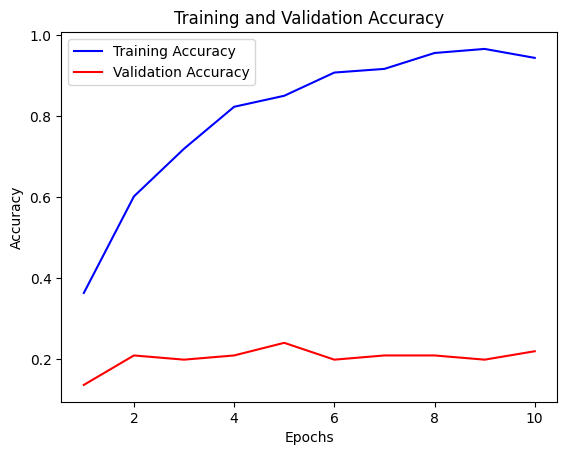

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, Add, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tqdm import tqdm
import matplotlib.pyplot as plt

# Specify paths
train_csv = '/content/train.csv'
val_csv = '/content/val.csv'
test_csv = '/content/test.csv'
dataset_path = '/content/waste_images'  # Adjust this to your dataset path

# Load CSV files
train_df = pd.read_csv(train_csv)
val_df = pd.read_csv(val_csv)
test_df = pd.read_csv(test_csv)

# Extract image paths and labels
train_paths, train_labels = train_df['image_path'].values, train_df['label'].values
val_paths, val_labels = val_df['image_path'].values, val_df['label'].values
test_paths, test_labels = test_df['image_path'].values, test_df['label'].values

# Encode labels
label_encoder = LabelEncoder()
train_labels_enc = label_encoder.fit_transform(train_labels)
val_labels_enc = label_encoder.transform(val_labels)
test_labels_enc = label_encoder.transform(test_labels)

# Parameters
batch_size = 32
image_size = (224, 224)

# Function to preprocess images
def load_preprocess_image(image_path, label):
    image_path_str = image_path.numpy().decode('utf-8')  # Decode the bytes to string
    img = load_img(os.path.join(dataset_path, image_path_str), target_size=image_size)
    img_array = img_to_array(img)
    img_array = img_array / 255.0  # Normalize pixel values to [0, 1]
    return img_array, label

def wrap_load_preprocess_image(image_path, label):
    img, label = tf.py_function(load_preprocess_image, [image_path, label], [tf.float32, tf.int64])
    img.set_shape((image_size[0], image_size[1], 3))
    label.set_shape(())
    return img, label

# Create tf.data.Dataset objects
def create_dataset(paths, labels, batch_size, is_training=False):
    dataset = tf.data.Dataset.from_tensor_slices((paths, labels))
    dataset = dataset.map(wrap_load_preprocess_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    if is_training:
        dataset = dataset.shuffle(buffer_size=len(paths)).repeat()
    dataset = dataset.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)
    return dataset

train_dataset = create_dataset(train_paths, train_labels_enc, batch_size, is_training=True)
val_dataset = create_dataset(val_paths, val_labels_enc, batch_size, is_training=False)
test_dataset = create_dataset(test_paths, test_labels_enc, batch_size, is_training=False)

# Define ResNet block
def resnet_block(x, filters, kernel_size=3, strides=1, batch_normalization=True, activation='relu'):
    shortcut = x
    if strides != 1 or x.shape[-1] != filters:
        shortcut = Conv2D(filters, 1, strides=strides)(shortcut)
    if batch_normalization:
        x = BatchNormalization()(x)
    if activation:
        x = Activation(activation)(x)
    x = Conv2D(filters, kernel_size, strides=strides, padding='same')(x)
    if batch_normalization:
        x = BatchNormalization()(x)
    if activation:
        x = Activation(activation)(x)
    x = Conv2D(filters, kernel_size, padding='same')(x)
    x = Add()([x, shortcut])
    if activation:
        x = Activation(activation)(x)
    return x

# Build ResNet model
def build_resnet(input_shape, num_classes):
    inputs = tf.keras.Input(shape=input_shape)
    x = Conv2D(64, 7, strides=2, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=3, strides=2, padding='same')(x)

    x = resnet_block(x, 64)
    x = resnet_block(x, 64)
    x = resnet_block(x, 128, strides=2)
    x = resnet_block(x, 128)
    x = resnet_block(x, 256, strides=2)
    x = resnet_block(x, 256)
    x = resnet_block(x, 512, strides=2)
    x = resnet_block(x, 512)

    x = GlobalAveragePooling2D()(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, outputs)
    return model

# Create ResNet model
model = build_resnet(input_shape=(image_size[0], image_size[1], 3), num_classes=len(np.unique(train_labels)))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Custom tqdm callback for progress visualization
class TQDMCallback(tf.keras.callbacks.Callback):
    def __init__(self, epochs):
        self.epochs = epochs

    def on_epoch_begin(self, epoch, logs=None):
        self.epoch_pbar = tqdm(total=self.params['steps'], desc=f'Epoch {epoch + 1}/{self.epochs}', position=0)

    def on_epoch_end(self, epoch, logs=None):
        self.epoch_pbar.close()

    def on_batch_end(self, batch, logs=None):
        self.epoch_pbar.update(1)

# Calculate steps per epoch
steps_per_epoch = len(train_paths) // batch_size
validation_steps = len(val_paths) // batch_size

# Train the model with tqdm integration
tqdm_callback = TQDMCallback(epochs=10)
history = model.fit(train_dataset,
                    validation_data=val_dataset,
                    epochs=10,
                    steps_per_epoch=steps_per_epoch,
                    validation_steps=validation_steps,
                    verbose=0,
                    callbacks=[tqdm_callback])

# Evaluate the model on validation set
val_loss, val_acc = model.evaluate(val_dataset, verbose=0)
print(f"\nValidation Accuracy: {val_acc:.4f}")

# Evaluate the model on test set
test_loss, test_acc = model.evaluate(test_dataset, verbose=0)
print(f"\nTest Accuracy: {test_acc:.4f}")

# Make predictions on validation set
val_pred = model.predict(val_dataset)
val_pred_labels = np.argmax(val_pred, axis=1)

# Print classification report for validation data
val_report = classification_report(val_labels_enc, val_pred_labels[:len(val_labels_enc)], target_names=label_encoder.classes_, output_dict=True)
print("\nClassification Report for Validation Data:")
print(f"{'Class':<12} {'Precision':<12} {'Recall':<12} {'F1-score':<12} {'Support':<12}")
print("-" * 60)
for class_name in label_encoder.classes_:
    precision = val_report[class_name]['precision']
    recall = val_report[class_name]['recall']
    f1_score = val_report[class_name]['f1-score']
    support = val_report[class_name]['support']
    print(f"{class_name:<12} {precision:<12.4f} {recall:<12.4f} {f1_score:<12.4f} {support:<12}")
print("-" * 60)
val_accuracy = val_report['accuracy']
print(f"{'Validation Accuracy:':<12} {val_accuracy:<12.4f}")

# Make predictions on test set
test_pred = model.predict(test_dataset)
test_pred_labels = np.argmax(test_pred, axis=1)

# Print classification report for test data
test_report = classification_report(test_labels_enc, test_pred_labels[:len(test_labels_enc)], target_names=label_encoder.classes_, output_dict=True)
print("\nClassification Report for Test Data:")
print(f"{'Class':<12} {'Precision':<12} {'Recall':<12} {'F1-score':<12} {'Support':<12}")
print("-" * 60)
for class_name in label_encoder.classes_:
    precision = test_report[class_name]['precision']
    recall = test_report[class_name]['recall']
    f1_score = test_report[class_name]['f1-score']
    support = test_report[class_name]['support']
    print(f"{class_name:<12} {precision:<12.4f} {recall:<12.4f} {f1_score:<12.4f} {support:<12}")
print("-" * 60)
test_accuracy = test_report['accuracy']
print(f"{'Test Accuracy:':<12} {test_accuracy:<12.4f}")

# Underfitting and Overfitting Analysis
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

print("\nUnderfitting and Overfitting Analysis:")
epochs = range(1, len(train_acc) + 1)
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
# Print training, validation, and test accuracy
train_accuracy = history.history['accuracy'][-1]
val_accuracy = history.history['val_accuracy'][-1]

print(f"Training accuracy: {train_accuracy}")
print(f"Validation accuracy: {val_accuracy}")
print(f"Test accuracy: {test_accuracy}")

#resnet34

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_119 (Conv2D)         (None, 112, 112, 64)         9472      ['input_5[0][0]']             
                                                                                                  
 batch_normalization_115 (B  (None, 112, 112, 64)         256       ['conv2d_119[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_107 (Activation  (None, 112, 112, 64)         0         ['batch_normalization_11

Epoch 10/10: 100%|██████████| 31/31 [08:22<00:00, 16.21s/it]



Validation Accuracy: 0.1400
4/4 [==============================] - 14s 3s/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification Report for Validation Data:
Class        Precision    Recall       F1-score     Support     
------------------------------------------------------------
cardboard    0.4000       0.2857       0.3333       21          
glass        0.0000       0.0000       0.0000       21          
metal        0.0000       0.0000       0.0000       16          
paper        0.2727       0.2857       0.2791       21          
plastic      0.0351       0.2857       0.0625       7           
trash        0.0000       0.0000       0.0000       14          
------------------------------------------------------------
Accuracy:    0.1400      

Test Accuracy: 0.2000
4/4 [==============================] - 13s 3s/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification Report for Test Data:
Class        Precision    Recall       F1-score     Support     
------------------------------------------------------------
cardboard    0.2500       0.2667       0.2581       15          
glass        0.0000       0.0000       0.0000       11          
metal        0.2857       0.0952       0.1429       21          
paper        0.2500       0.2778       0.2632       18          
plastic      0.1667       0.4286       0.2400       21          
trash        0.0000       0.0000       0.0000       14          
------------------------------------------------------------
Accuracy:    0.2000      

Underfitting and Overfitting Analysis:


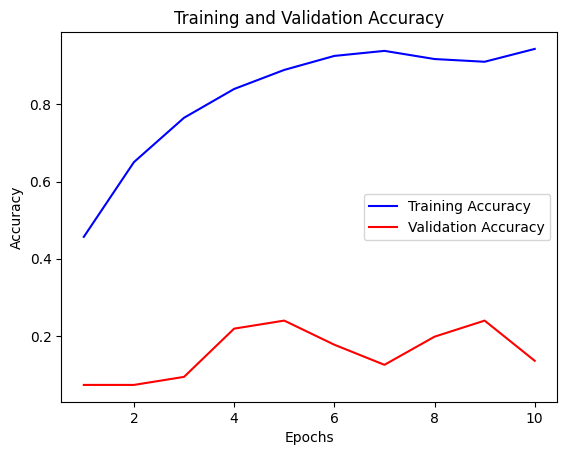

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, MaxPooling2D, GlobalAveragePooling2D, Dense, Add
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tqdm import tqdm
import matplotlib.pyplot as plt

# Specify paths
train_csv = '/content/train.csv'
val_csv = '/content/val.csv'
test_csv = '/content/test.csv'
dataset_path = '/content/waste_images'  # Adjust this to your dataset path

# Load CSV files
train_df = pd.read_csv(train_csv)
val_df = pd.read_csv(val_csv)
test_df = pd.read_csv(test_csv)

# Extract image paths and labels
train_paths, train_labels = train_df['image_path'].values, train_df['label'].values
val_paths, val_labels = val_df['image_path'].values, val_df['label'].values
test_paths, test_labels = test_df['image_path'].values, test_df['label'].values

# Encode labels
label_encoder = LabelEncoder()
train_labels_enc = label_encoder.fit_transform(train_labels)
val_labels_enc = label_encoder.transform(val_labels)
test_labels_enc = label_encoder.transform(test_labels)

# Parameters
batch_size = 32
image_size = (224, 224, 3)  # ResNet-34 input size

# Function to preprocess images
def load_preprocess_image(image_path, label):
    image_path_str = image_path.numpy().decode('utf-8')  # Decode the bytes to string
    img = load_img(os.path.join(dataset_path, image_path_str), target_size=(image_size[0], image_size[1]))
    img_array = img_to_array(img)
    img_array = img_array / 255.0  # Rescale to [0, 1]
    return img_array, label

def wrap_load_preprocess_image(image_path, label):
    img, label = tf.py_function(load_preprocess_image, [image_path, label], [tf.float32, tf.int64])
    img.set_shape((image_size[0], image_size[1], image_size[2]))
    label.set_shape(())
    return img, label

# Create tf.data.Dataset objects
def create_dataset(paths, labels, batch_size, is_training=False):
    dataset = tf.data.Dataset.from_tensor_slices((paths, labels))
    dataset = dataset.map(wrap_load_preprocess_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    if is_training:
        dataset = dataset.shuffle(buffer_size=len(paths)).repeat()
    dataset = dataset.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)
    return dataset

train_dataset = create_dataset(train_paths, train_labels_enc, batch_size, is_training=True)
val_dataset = create_dataset(val_paths, val_labels_enc, batch_size, is_training=False)
test_dataset = create_dataset(test_paths, test_labels_enc, batch_size, is_training=False)

# Define ResNet-34 architecture
def residual_block(x, filters, strides=1):
    shortcut = x

    # First convolution
    x = Conv2D(filters, kernel_size=3, strides=strides, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # Second convolution
    x = Conv2D(filters, kernel_size=3, strides=1, padding='same')(x)
    x = BatchNormalization()(x)

    # Adjusting dimensions of shortcut to match x
    if strides > 1:
        shortcut = Conv2D(filters, kernel_size=1, strides=strides, padding='same')(shortcut)

    # Adding shortcut to main path and pass it through ReLU activation
    x = Add()([shortcut, x])
    x = Activation('relu')(x)
    return x

def ResNet34(input_shape=(224, 224, 3), num_classes=10):
    inputs = Input(shape=input_shape)

    # Initial convolution
    x = Conv2D(64, kernel_size=7, strides=2, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=3, strides=2, padding='same')(x)

    # Residual blocks
    x = residual_block(x, filters=64)
    x = residual_block(x, filters=64)
    x = residual_block(x, filters=64)

    x = residual_block(x, filters=128, strides=2)
    x = residual_block(x, filters=128)
    x = residual_block(x, filters=128)
    x = residual_block(x, filters=128)

    x = residual_block(x, filters=256, strides=2)
    x = residual_block(x, filters=256)
    x = residual_block(x, filters=256)
    x = residual_block(x, filters=256)
    x = residual_block(x, filters=256)
    x = residual_block(x, filters=256)

    x = residual_block(x, filters=512, strides=2)
    x = residual_block(x, filters=512)
    x = residual_block(x, filters=512)

    # Global average pooling and output
    x = GlobalAveragePooling2D()(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, outputs)
    return model

# Build and Compile the ResNet-34 Model
model = ResNet34(input_shape=image_size, num_classes=len(np.unique(train_labels)))
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Custom tqdm callback for progress visualization
class TQDMCallback(tf.keras.callbacks.Callback):
    def __init__(self, epochs):
        self.epochs = epochs

    def on_epoch_begin(self, epoch, logs=None):
        self.epoch_pbar = tqdm(total=self.params['steps'], desc=f'Epoch {epoch + 1}/{self.epochs}', position=0)

    def on_epoch_end(self, epoch, logs=None):
        self.epoch_pbar.close()

    def on_batch_end(self, batch, logs=None):
        self.epoch_pbar.update(1)

# Train the model with tqdm integration
tqdm_callback = TQDMCallback(epochs=10)
steps_per_epoch = len(train_paths) // batch_size
validation_steps = len(val_paths) // batch_size

history = model.fit(train_dataset,
                    validation_data=val_dataset,
                    epochs=10,
                    steps_per_epoch=steps_per_epoch,
                    validation_steps=validation_steps,
                    verbose=0,
                    callbacks=[tqdm_callback])

# Evaluate the model on validation set
val_loss, val_acc = model.evaluate(val_dataset, verbose=0)
print(f"\nValidation Accuracy: {val_acc:.4f}")

# Make predictions on validation set
val_pred = model.predict(val_dataset)
val_pred_labels = np.argmax(val_pred, axis=1)

# Print classification report for validation data
val_report = classification_report(val_labels_enc, val_pred_labels[:len(val_labels_enc)], target_names=label_encoder.classes_, output_dict=True)
print("\nClassification Report for Validation Data:")
print(f"{'Class':<12} {'Precision':<12} {'Recall':<12} {'F1-score':<12} {'Support':<12}")
print("-" * 60)
for class_name in label_encoder.classes_:
    precision = val_report[class_name]['precision']
    recall = val_report[class_name]['recall']
    f1_score = val_report[class_name]['f1-score']
    support = val_report[class_name]['support']
    print(f"{class_name:<12} {precision:<12.4f} {recall:<12.4f} {f1_score:<12.4f} {support:<12}")
print("-" * 60)
val_accuracy = val_report['accuracy']
print(f"{'Accuracy:':<12} {val_accuracy:<12.4f}")

# Evaluate the model on test set
test_loss, test_acc = model.evaluate(test_dataset, verbose=0)
print(f"\nTest Accuracy: {test_acc:.4f}")

# Make predictions on test set
test_pred = model.predict(test_dataset)
test_pred_labels = np.argmax(test_pred, axis=1)

# Print classification report for test data
test_report = classification_report(test_labels_enc, test_pred_labels[:len(test_labels_enc)], target_names=label_encoder.classes_, output_dict=True)
print("\nClassification Report for Test Data:")
print(f"{'Class':<12} {'Precision':<12} {'Recall':<12} {'F1-score':<12} {'Support':<12}")
print("-" * 60)
for class_name in label_encoder.classes_:
    precision = test_report[class_name]['precision']
    recall = test_report[class_name]['recall']
    f1_score = test_report[class_name]['f1-score']
    support = test_report[class_name]['support']
    print(f"{class_name:<12} {precision:<12.4f} {recall:<12.4f} {f1_score:<12.4f} {support:<12}")
print("-" * 60)
test_accuracy = test_report['accuracy']
print(f"{'Accuracy:':<12} {test_accuracy:<12.4f}")

# Underfitting and Overfitting Analysis
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

print("\nUnderfitting and Overfitting Analysis:")
epochs = range(1, len(train_acc) + 1)
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Comparison

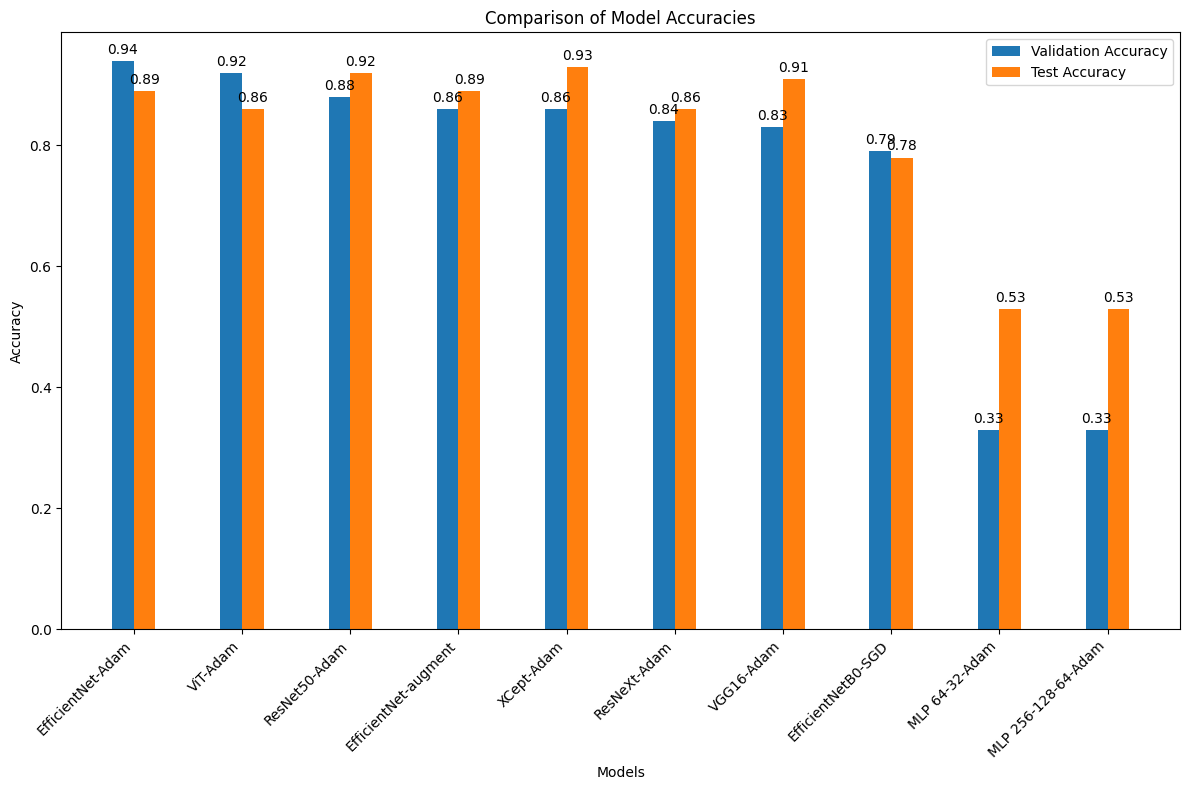

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data (including the new model)
models = ['EfficientNet-Adam', 'ViT-Adam', 'ResNeXt-Adam', 'XCept-Adam', 'ResNet50-Adam', 'MLP 64-32-Adam', 'VGG16-Adam', 'MLP 256-128-64-Adam', 'EfficientNet-augment', 'EfficientNetB0-SGD']
validation_accuracies = [0.94, 0.92, 0.86, 0.86, 0.88, 0.33, 0.83, 0.33, 0.86, 0.79]
test_accuracies = [0.89, 0.86, 0.84, 0.93, 0.92, 0.53, 0.91, 0.53, 0.89, 0.78]

# Sorting the data based on validation accuracies
sorted_indices = np.argsort(validation_accuracies)[::-1]
sorted_models = [models[i] for i in sorted_indices]
sorted_validation_accuracies = [validation_accuracies[i] for i in sorted_indices]
sorted_test_accuracies = [test_accuracies[i] for i in sorted_indices]

# Plotting
x = np.arange(len(sorted_models))
width = 0.2  # making bars thinner

fig, ax = plt.subplots(figsize=(12, 8))

bars1 = ax.bar(x - width/2, sorted_validation_accuracies, width, label='Validation Accuracy')
bars2 = ax.bar(x + width/2, sorted_test_accuracies, width, label='Test Accuracy')



# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Model Accuracies')
ax.set_xticks(x)
ax.set_xticklabels(sorted_models, rotation=45, ha='right')
ax.legend()

# Attach a text label above each bar in *bars*, displaying its height.
def attach_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

attach_labels(bars1)
attach_labels(bars2)

fig.tight_layout()

plt.show()


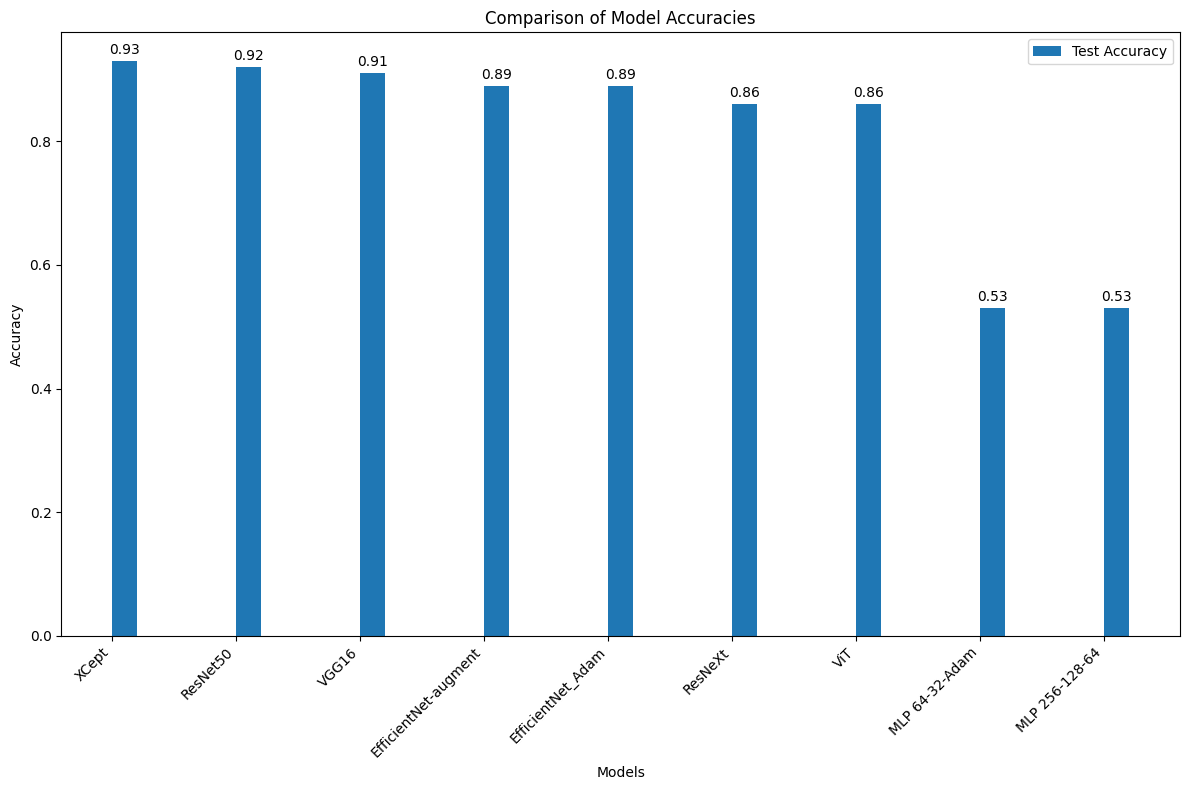

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data (including the new model)
models = ['EfficientNet_Adam', 'ViT', 'ResNeXt', 'XCept', 'ResNet50', 'MLP 64-32-Adam', 'VGG16', 'MLP 256-128-64', 'EfficientNet-augment']
validation_accuracies = [0.94, 0.92, 0.86, 0.86, 0.88, 0.33, 0.83, 0.33, 0.86]
test_accuracies = [0.89, 0.86, 0.84, 0.89, 0.92, 0.53, 0.91, 0.53, 0.89]

# Sorting the data based on test accuracies
sorted_indices = np.argsort(test_accuracies)[::-1]
sorted_models = [models[i] for i in sorted_indices]
sorted_validation_accuracies = [validation_accuracies[i] for i in sorted_indices]
sorted_test_accuracies = [test_accuracies[i] for i in sorted_indices]

# Plotting
x = np.arange(len(sorted_models))
width = 0.2  # making bars thinner

fig, ax = plt.subplots(figsize=(12, 8))

bars2 = ax.bar(x + width/2, sorted_test_accuracies, width, label='Test Accuracy')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Model Accuracies')
ax.set_xticks(x)
ax.set_xticklabels(sorted_models, rotation=45, ha='right')
ax.legend()

# Attach a text label above each bar in *bars*, displaying its height.
def attach_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

attach_labels(bars2)

fig.tight_layout()

plt.show()


#vit resnet efficien

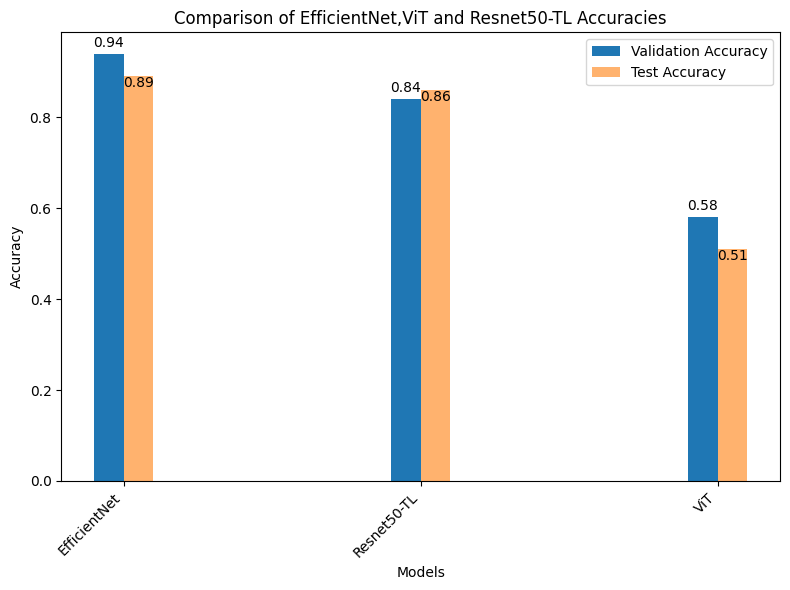

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['EfficientNet', 'ViT', 'Resnet50-TL']
validation_accuracies = [0.94, 0.58, 0.84]
test_accuracies = [0.89, 0.51, 0.86]

# Sorting the data based on test accuracies (descending order)
sorted_indices = np.argsort(test_accuracies)[::-1]
sorted_models = [models[i] for i in sorted_indices]
sorted_validation_accuracies = [validation_accuracies[i] for i in sorted_indices]
sorted_test_accuracies = [test_accuracies[i] for i in sorted_indices]

# Plotting
x = np.arange(len(sorted_models))
width = 0.1  # making bars slightly wider

fig, ax = plt.subplots(figsize=(8, 6))

bars1 = ax.bar(x - width/2, sorted_validation_accuracies, width, label='Validation Accuracy')
bars2 = ax.bar(x + width/2, sorted_test_accuracies, width, label='Test Accuracy', alpha=0.6)

# Add labels and annotations
def attach_labels(bars, offsets):
    for bar, offset in zip(bars, offsets):
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, offset),  # vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

attach_labels(bars1, (3, 3, 3))
attach_labels(bars2, (-10, -10, -10))

# Customize plot appearance
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of EfficientNet,ViT and Resnet50-TL Accuracies')
ax.set_xticks(x)
ax.set_xticklabels(sorted_models, rotation=45, ha='right')
ax.legend()

fig.tight_layout()

plt.show()


# Table result

In [ ]:
from tabulate import tabulate

# Data
models = ['EfficientNet', 'ViT', 'ResNeXt', 'XCept', 'ResNet50', 'MLP 64-32', 'VGG16', 'MLP 256-128-64', 'ResNet34', 'EfficientNet-augment']
test_accuracies = [0.89, 0.51, 0.86, 0.93, 0.92, 0.53, 0.91, 0.53, 0.86, 0.89]

# Organize data for table
table_data = []
for i in range(len(models)):
    table_data.append([models[i], test_accuracies[i]])

# Print table
headers = ["Model", "Test Accuracy"]
print(tabulate(table_data, headers=headers, floatfmt=".2f"))


Model                   Test Accuracy
--------------------  ---------------
EfficientNet                     0.89
ViT                              0.51
ResNeXt                          0.86
XCept                            0.93
ResNet50                         0.92
MLP 64-32                        0.53
VGG16                            0.91
MLP 256-128-64                   0.53
ResNet34                         0.86
EfficientNet-augment             0.89


# EfficientNet Improve

In [ ]:
# import os
# import numpy as np
# import pandas as pd
# import tensorflow as tf
# from tensorflow.keras.preprocessing.image import load_img, img_to_array
# from tensorflow.keras.applications.efficientnet import preprocess_input, EfficientNetB0
# from sklearn.preprocessing import LabelEncoder
# from sklearn.metrics import classification_report
# from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
# from tensorflow.keras.models import Model
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
# from tqdm import tqdm
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# # Specify paths
# train_csv = '/content/train.csv'
# val_csv = '/content/val.csv'
# test_csv = '/content/test.csv'
# dataset_path = '/content/waste_images'  # Adjust this to your dataset path

# # Load CSV files
# train_df = pd.read_csv(train_csv)
# val_df = pd.read_csv(val_csv)
# test_df = pd.read_csv(test_csv)

# # Encode labels
# label_encoder = LabelEncoder()
# train_labels_enc = label_encoder.fit_transform(train_df['label'].values)
# val_labels_enc = label_encoder.transform(val_df['label'].values)
# test_labels_enc = label_encoder.transform(test_df['label'].values)

# # Parameters
# batch_size = 32
# image_size = (224, 224)  # EfficientNet input size

# # Data Augmentation
# datagen = ImageDataGenerator(
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest',
#     preprocessing_function=preprocess_input
# )

# # Training Data Generator
# train_generator = datagen.flow_from_dataframe(
#     dataframe=train_df,
#     directory=dataset_path,
#     x_col='image_path',
#     y_col='label',
#     target_size=image_size,
#     batch_size=batch_size,
#     class_mode='sparse'
# )

# # Validation Data Generator (without augmentation)
# val_generator = ImageDataGenerator(preprocessing_function=preprocess_input).flow_from_dataframe(
#     dataframe=val_df,
#     directory=dataset_path,
#     x_col='image_path',
#     y_col='label',
#     target_size=image_size,
#     batch_size=batch_size,
#     class_mode='sparse',
#     shuffle=False
# )

# # Test Data Generator (without augmentation)
# test_generator = ImageDataGenerator(preprocessing_function=preprocess_input).flow_from_dataframe(
#     dataframe=test_df,
#     directory=dataset_path,
#     x_col='image_path',
#     y_col='label',
#     target_size=image_size,
#     batch_size=batch_size,
#     class_mode='sparse',
#     shuffle=False
# )

# # Build and Compile the EfficientNet Model
# base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(image_size[0], image_size[1], 3))

# x = base_model.output
# x = GlobalAveragePooling2D()(x)
# x = Dropout(0.5)(x)  # Adding dropout layer
# x = Dense(1024, activation='relu')(x)
# x = Dropout(0.5)(x)  # Adding dropout layer
# predictions = Dense(len(np.unique(train_labels_enc)), activation='softmax')(x)

# model = Model(inputs=base_model.input, outputs=predictions)

# model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# # Print model summary
# model.summary()

# # Custom tqdm callback for progress visualization
# class TQDMCallback(tf.keras.callbacks.Callback):
#     def __init__(self, epochs):
#         self.epochs = epochs

#     def on_epoch_begin(self, epoch, logs=None):
#         self.epoch_pbar = tqdm(total=self.params['steps'], desc=f'Epoch {epoch + 1}/{self.epochs}', position=0)

#     def on_epoch_end(self, epoch, logs=None):
#         self.epoch_pbar.close()

#     def on_batch_end(self, batch, logs=None):
#         self.epoch_pbar.update(1)

# # Callbacks
# lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-7)
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# # Train the model with tqdm integration
# tqdm_callback = TQDMCallback(epochs=10)
# steps_per_epoch = len(train_df) // batch_size
# validation_steps = len(val_df) // batch_size

# history = model.fit(train_generator,
#                     validation_data=val_generator,
#                     epochs=10,
#                     steps_per_epoch=steps_per_epoch,
#                     validation_steps=validation_steps,
#                     callbacks=[tqdm_callback, lr_scheduler, early_stopping])

# # Evaluate the model on validation set
# val_loss, val_acc = model.evaluate(val_generator, verbose=0)
# print(f"\nValidation Accuracy: {val_acc:.4f}")

# # Make predictions on validation set
# val_pred = model.predict(val_generator)
# val_pred_labels = np.argmax(val_pred, axis=1)

# # Print classification report for validation data
# val_report = classification_report(val_labels_enc, val_pred_labels[:len(val_labels_enc)], target_names=label_encoder.classes_, output_dict=True)
# print("\nClassification Report for Validation Data:")
# print(f"{'Class':<12} {'Precision':<12} {'Recall':<12} {'F1-score':<12} {'Support':<12}")
# print("-" * 60)
# for class_name in label_encoder.classes_:
#     precision = val_report[class_name]['precision']
#     recall = val_report[class_name]['recall']
#     f1_score = val_report[class_name]['f1-score']
#     support = val_report[class_name]['support']
#     print(f"{class_name:<12} {precision:<12.4f} {recall:<12.4f} {f1_score:<12.4f} {support:<12}")
# print("-" * 60)
# val_accuracy = val_report['accuracy']
# print(f"{'Validation Accuracy:':<12} {val_accuracy:<12.4f}")

# # Evaluate the model on test set
# test_loss, test_acc = model.evaluate(test_generator, verbose=0)
# print(f"\nTest Accuracy: {test_acc:.4f}")

# # Make predictions on test set
# test_pred = model.predict(test_generator)
# test_pred_labels = np.argmax(test_pred, axis=1)

# # Print classification report for test data
# test_report = classification_report(test_labels_enc, test_pred_labels[:len(test_labels_enc)], target_names=label_encoder.classes_, output_dict=True)
# print("\nClassification Report for Test Data:")
# print(f"{'Class':<12} {'Precision':<12} {'Recall':<12} {'F1-score':<12} {'Support':<12}")
# print("-" * 60)
# for class_name in label_encoder.classes_:
#     precision = test_report[class_name]['precision']
#     recall = test_report[class_name]['recall']
#     f1_score = test_report[class_name]['f1-score']
#     support = test_report[class_name]['support']
#     print(f"{class_name:<12} {precision:<12.4f} {recall:<12.4f} {f1_score:<12.4f} {support:<12}")
# print("-" * 60)
# test_accuracy = test_report['accuracy']
# print(f"{'Test Accuracy:':<12} {test_accuracy:<12.4f}")


Found 1000 validated image filenames belonging to 6 classes.
Found 100 validated image filenames belonging to 6 classes.
Found 100 validated image filenames belonging to 6 classes.
16705208/16705208 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 224, 224, 3)          0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 224, 224, 3)          7         ['rescaling[0][0]']           
 on)                                          

Epoch 1/10:   0%|          | 0/31 [00:00<?, ?it/s]

Epoch 1/10


Epoch 1/10:   3%|▎         | 1/31 [00:21<10:40, 21.36s/it]

 1/31 [..............................] - ETA: 10:40 - loss: 2.0332 - accuracy: 0.1250

Epoch 1/10:   6%|▋         | 2/31 [00:22<04:39,  9.63s/it]

 2/31 [>.............................] - ETA: 41s - loss: 2.0168 - accuracy: 0.0938  

Epoch 1/10:  10%|▉         | 3/31 [00:24<02:43,  5.85s/it]

 3/31 [=>............................] - ETA: 38s - loss: 1.9629 - accuracy: 0.1042

Epoch 1/10:  13%|█▎        | 4/31 [00:25<01:50,  4.09s/it]

 4/31 [==>...........................] - ETA: 37s - loss: 1.9594 - accuracy: 0.1172

Epoch 1/10:  16%|█▌        | 5/31 [00:26<01:20,  3.08s/it]

 5/31 [===>..........................] - ETA: 35s - loss: 1.9559 - accuracy: 0.1187

Epoch 1/10:  19%|█▉        | 6/31 [00:28<01:02,  2.48s/it]

 6/31 [====>.........................] - ETA: 33s - loss: 1.9315 - accuracy: 0.1458

Epoch 1/10:  23%|██▎       | 7/31 [00:29<00:50,  2.10s/it]

 7/31 [=====>........................] - ETA: 32s - loss: 1.9332 - accuracy: 0.1607

Epoch 1/10:  26%|██▌       | 8/31 [00:30<00:42,  1.83s/it]

 8/31 [======>.......................] - ETA: 30s - loss: 1.9216 - accuracy: 0.1602

Epoch 1/10:  29%|██▉       | 9/31 [00:31<00:36,  1.66s/it]

 9/31 [=======>......................] - ETA: 29s - loss: 1.9005 - accuracy: 0.1632

Epoch 1/10:  32%|███▏      | 10/31 [00:33<00:31,  1.51s/it]

10/31 [========>.....................] - ETA: 27s - loss: 1.9023 - accuracy: 0.1594

Epoch 1/10:  35%|███▌      | 11/31 [00:34<00:29,  1.45s/it]

11/31 [=========>....................] - ETA: 26s - loss: 1.8925 - accuracy: 0.1591

Epoch 1/10:  39%|███▊      | 12/31 [00:35<00:26,  1.40s/it]

12/31 [==========>...................] - ETA: 24s - loss: 1.8975 - accuracy: 0.1536

Epoch 1/10:  42%|████▏     | 13/31 [00:37<00:24,  1.37s/it]

13/31 [===========>..................] - ETA: 23s - loss: 1.8957 - accuracy: 0.1538

Epoch 1/10:  45%|████▌     | 14/31 [00:38<00:23,  1.37s/it]

14/31 [============>.................] - ETA: 22s - loss: 1.8858 - accuracy: 0.1629

Epoch 1/10:  48%|████▊     | 15/31 [00:38<00:17,  1.08s/it]

15/31 [=============>................] - ETA: 19s - loss: 1.8813 - accuracy: 0.1689

Epoch 1/10:  52%|█████▏    | 16/31 [00:40<00:17,  1.18s/it]

16/31 [==============>...............] - ETA: 18s - loss: 1.8711 - accuracy: 0.1783

Epoch 1/10:  55%|█████▍    | 17/31 [00:41<00:16,  1.21s/it]

17/31 [===============>..............] - ETA: 17s - loss: 1.8547 - accuracy: 0.1865

Epoch 1/10:  58%|█████▊    | 18/31 [00:42<00:16,  1.25s/it]

18/31 [================>.............] - ETA: 16s - loss: 1.8402 - accuracy: 0.1957

Epoch 1/10:  61%|██████▏   | 19/31 [00:44<00:15,  1.25s/it]

19/31 [=================>............] - ETA: 15s - loss: 1.8227 - accuracy: 0.2158

Epoch 1/10:  65%|██████▍   | 20/31 [00:45<00:14,  1.28s/it]

20/31 [==================>...........] - ETA: 13s - loss: 1.8129 - accuracy: 0.2256

Epoch 1/10:  68%|██████▊   | 21/31 [00:46<00:12,  1.30s/it]

21/31 [===================>..........] - ETA: 12s - loss: 1.8092 - accuracy: 0.2238

Epoch 1/10:  71%|███████   | 22/31 [00:48<00:11,  1.28s/it]

22/31 [====================>.........] - ETA: 11s - loss: 1.8101 - accuracy: 0.2250

Epoch 1/10:  74%|███████▍  | 23/31 [00:49<00:10,  1.29s/it]

23/31 [=====================>........] - ETA: 10s - loss: 1.8119 - accuracy: 0.2219

Epoch 1/10:  77%|███████▋  | 24/31 [00:50<00:08,  1.28s/it]

24/31 [======================>.......] - ETA: 8s - loss: 1.8078 - accuracy: 0.2231 

Epoch 1/10:  81%|████████  | 25/31 [00:51<00:07,  1.30s/it]

25/31 [=======================>......] - ETA: 7s - loss: 1.8002 - accuracy: 0.2242

Epoch 1/10:  84%|████████▍ | 26/31 [00:53<00:06,  1.31s/it]

26/31 [========================>.....] - ETA: 6s - loss: 1.7931 - accuracy: 0.2277

Epoch 1/10:  87%|████████▋ | 27/31 [00:54<00:05,  1.33s/it]

27/31 [=========================>....] - ETA: 5s - loss: 1.7869 - accuracy: 0.2274

Epoch 1/10:  90%|█████████ | 28/31 [00:55<00:03,  1.31s/it]

28/31 [==========================>...] - ETA: 3s - loss: 1.7796 - accuracy: 0.2282

Epoch 1/10:  94%|█████████▎| 29/31 [00:57<00:02,  1.29s/it]

29/31 [===========================>..] - ETA: 2s - loss: 1.7686 - accuracy: 0.2367

Epoch 1/10:  97%|█████████▋| 30/31 [00:58<00:01,  1.31s/it]

30/31 [============================>.] - ETA: 1s - loss: 1.7655 - accuracy: 0.2361

Epoch 1/10: 100%|██████████| 31/31 [00:59<00:00,  1.32s/it]

31/31 [==============================] - ETA: 0s - loss: 1.7619 - accuracy: 0.2407

Epoch 1/10: 100%|██████████| 31/31 [01:02<00:00,  2.01s/it]

31/31 [==============================] - 62s 1s/step - loss: 1.7619 - accuracy: 0.2407 - val_loss: 1.4299 - val_accuracy: 0.5104 - lr: 1.0000e-04



Epoch 2/10:   0%|          | 0/31 [00:00<?, ?it/s]

Epoch 2/10


Epoch 2/10:   3%|▎         | 1/31 [00:01<00:49,  1.64s/it]

 1/31 [..............................] - ETA: 49s - loss: 1.3964 - accuracy: 0.5312

Epoch 2/10:   6%|▋         | 2/31 [00:02<00:41,  1.43s/it]

 2/31 [>.............................] - ETA: 37s - loss: 1.4670 - accuracy: 0.4219

Epoch 2/10:  10%|▉         | 3/31 [00:04<00:36,  1.31s/it]

 3/31 [=>............................] - ETA: 34s - loss: 1.4630 - accuracy: 0.4167

Epoch 2/10:  13%|█▎        | 4/31 [00:05<00:34,  1.29s/it]

 4/31 [==>...........................] - ETA: 33s - loss: 1.4457 - accuracy: 0.4531

Epoch 2/10:  16%|█▌        | 5/31 [00:06<00:32,  1.24s/it]

 5/31 [===>..........................] - ETA: 31s - loss: 1.4480 - accuracy: 0.4563

Epoch 2/10:  19%|█▉        | 6/31 [00:07<00:30,  1.21s/it]

 6/31 [====>.........................] - ETA: 30s - loss: 1.4416 - accuracy: 0.4740

Epoch 2/10:  23%|██▎       | 7/31 [00:08<00:29,  1.23s/it]

 7/31 [=====>........................] - ETA: 29s - loss: 1.4215 - accuracy: 0.4866

Epoch 2/10:  26%|██▌       | 8/31 [00:10<00:28,  1.23s/it]

 8/31 [======>.......................] - ETA: 27s - loss: 1.4106 - accuracy: 0.5078

Epoch 2/10:  29%|██▉       | 9/31 [00:11<00:27,  1.23s/it]

 9/31 [=======>......................] - ETA: 26s - loss: 1.4281 - accuracy: 0.5000

Epoch 2/10:  32%|███▏      | 10/31 [00:12<00:25,  1.22s/it]

10/31 [========>.....................] - ETA: 25s - loss: 1.4154 - accuracy: 0.4969

Epoch 2/10:  35%|███▌      | 11/31 [00:13<00:19,  1.02it/s]

11/31 [=========>....................] - ETA: 22s - loss: 1.4129 - accuracy: 0.4970

Epoch 2/10:  39%|███▊      | 12/31 [00:14<00:20,  1.06s/it]

12/31 [==========>...................] - ETA: 21s - loss: 1.4094 - accuracy: 0.4917

Epoch 2/10:  42%|████▏     | 13/31 [00:15<00:20,  1.11s/it]

13/31 [===========>..................] - ETA: 20s - loss: 1.4117 - accuracy: 0.4821

Epoch 2/10:  45%|████▌     | 14/31 [00:16<00:19,  1.15s/it]

14/31 [============>.................] - ETA: 19s - loss: 1.4168 - accuracy: 0.4835

Epoch 2/10:  48%|████▊     | 15/31 [00:18<00:19,  1.22s/it]

15/31 [=============>................] - ETA: 18s - loss: 1.4237 - accuracy: 0.4759

Epoch 2/10:  52%|█████▏    | 16/31 [00:19<00:18,  1.24s/it]

16/31 [==============>...............] - ETA: 17s - loss: 1.4219 - accuracy: 0.4795

Epoch 2/10:  55%|█████▍    | 17/31 [00:20<00:17,  1.24s/it]

17/31 [===============>..............] - ETA: 16s - loss: 1.4155 - accuracy: 0.4750

Epoch 2/10:  58%|█████▊    | 18/31 [00:21<00:16,  1.23s/it]

18/31 [================>.............] - ETA: 15s - loss: 1.4145 - accuracy: 0.4728

Epoch 2/10:  61%|██████▏   | 19/31 [00:23<00:14,  1.24s/it]

19/31 [=================>............] - ETA: 14s - loss: 1.4124 - accuracy: 0.4743

Epoch 2/10:  65%|██████▍   | 20/31 [00:24<00:13,  1.25s/it]

20/31 [==================>...........] - ETA: 13s - loss: 1.4126 - accuracy: 0.4740

Epoch 2/10:  68%|██████▊   | 21/31 [00:25<00:12,  1.25s/it]

21/31 [===================>..........] - ETA: 11s - loss: 1.4107 - accuracy: 0.4722

Epoch 2/10:  71%|███████   | 22/31 [00:26<00:11,  1.22s/it]

22/31 [====================>.........] - ETA: 10s - loss: 1.4052 - accuracy: 0.4721

Epoch 2/10:  74%|███████▍  | 23/31 [00:28<00:09,  1.25s/it]

23/31 [=====================>........] - ETA: 9s - loss: 1.3988 - accuracy: 0.4775 

Epoch 2/10:  77%|███████▋  | 24/31 [00:29<00:08,  1.25s/it]

24/31 [======================>.......] - ETA: 8s - loss: 1.3928 - accuracy: 0.4798

Epoch 2/10:  81%|████████  | 25/31 [00:30<00:07,  1.26s/it]

25/31 [=======================>......] - ETA: 7s - loss: 1.3901 - accuracy: 0.4794

Epoch 2/10:  84%|████████▍ | 26/31 [00:31<00:06,  1.29s/it]

26/31 [========================>.....] - ETA: 6s - loss: 1.3863 - accuracy: 0.4802

Epoch 2/10:  87%|████████▋ | 27/31 [00:33<00:05,  1.28s/it]

27/31 [=========================>....] - ETA: 4s - loss: 1.3813 - accuracy: 0.4857

Epoch 2/10:  90%|█████████ | 28/31 [00:34<00:03,  1.25s/it]

28/31 [==========================>...] - ETA: 3s - loss: 1.3726 - accuracy: 0.4920

Epoch 2/10:  94%|█████████▎| 29/31 [00:35<00:02,  1.22s/it]

29/31 [===========================>..] - ETA: 2s - loss: 1.3718 - accuracy: 0.4923

Epoch 2/10:  97%|█████████▋| 30/31 [00:36<00:01,  1.23s/it]

30/31 [============================>.] - ETA: 1s - loss: 1.3707 - accuracy: 0.4925

Epoch 2/10: 100%|██████████| 31/31 [00:38<00:00,  1.22s/it]

31/31 [==============================] - ETA: 0s - loss: 1.3626 - accuracy: 0.4979

Epoch 2/10: 100%|██████████| 31/31 [00:38<00:00,  1.26s/it]

31/31 [==============================] - 39s 1s/step - loss: 1.3626 - accuracy: 0.4979 - val_loss: 1.0671 - val_accuracy: 0.6562 - lr: 1.0000e-04



Epoch 3/10:   0%|          | 0/31 [00:00<?, ?it/s]

Epoch 3/10


Epoch 3/10:   3%|▎         | 1/31 [00:01<00:50,  1.67s/it]

 1/31 [..............................] - ETA: 50s - loss: 1.2442 - accuracy: 0.5312

Epoch 3/10:   6%|▋         | 2/31 [00:03<00:42,  1.48s/it]

 2/31 [>.............................] - ETA: 38s - loss: 1.1400 - accuracy: 0.5781

Epoch 3/10:  10%|▉         | 3/31 [00:04<00:37,  1.32s/it]

 3/31 [=>............................] - ETA: 34s - loss: 1.1163 - accuracy: 0.6042

Epoch 3/10:  13%|█▎        | 4/31 [00:05<00:34,  1.28s/it]

 4/31 [==>...........................] - ETA: 33s - loss: 1.1042 - accuracy: 0.6250

Epoch 3/10:  16%|█▌        | 5/31 [00:06<00:33,  1.28s/it]

 5/31 [===>..........................] - ETA: 32s - loss: 1.1056 - accuracy: 0.6375

Epoch 3/10:  19%|█▉        | 6/31 [00:07<00:31,  1.27s/it]

 6/31 [====>.........................] - ETA: 31s - loss: 1.1042 - accuracy: 0.6354

Epoch 3/10:  23%|██▎       | 7/31 [00:09<00:30,  1.26s/it]

 7/31 [=====>........................] - ETA: 29s - loss: 1.1175 - accuracy: 0.6295

Epoch 3/10:  26%|██▌       | 8/31 [00:10<00:28,  1.25s/it]

 8/31 [======>.......................] - ETA: 28s - loss: 1.1076 - accuracy: 0.6250

Epoch 3/10:  29%|██▉       | 9/31 [00:11<00:27,  1.25s/it]

 9/31 [=======>......................] - ETA: 27s - loss: 1.1210 - accuracy: 0.6181

Epoch 3/10:  32%|███▏      | 10/31 [00:12<00:20,  1.01it/s]

10/31 [========>.....................] - ETA: 24s - loss: 1.1248 - accuracy: 0.6149

Epoch 3/10:  35%|███▌      | 11/31 [00:13<00:21,  1.09s/it]

11/31 [=========>....................] - ETA: 23s - loss: 1.1041 - accuracy: 0.6250

Epoch 3/10:  39%|███▊      | 12/31 [00:14<00:21,  1.14s/it]

12/31 [==========>...................] - ETA: 22s - loss: 1.0989 - accuracy: 0.6306

Epoch 3/10:  42%|████▏     | 13/31 [00:15<00:21,  1.21s/it]

13/31 [===========>..................] - ETA: 21s - loss: 1.0946 - accuracy: 0.6352

Epoch 3/10:  45%|████▌     | 14/31 [00:17<00:20,  1.23s/it]

14/31 [============>.................] - ETA: 20s - loss: 1.0873 - accuracy: 0.6392

Epoch 3/10:  48%|████▊     | 15/31 [00:18<00:19,  1.24s/it]

15/31 [=============>................] - ETA: 19s - loss: 1.0800 - accuracy: 0.6382

Epoch 3/10:  52%|█████▏    | 16/31 [00:19<00:18,  1.22s/it]

16/31 [==============>...............] - ETA: 17s - loss: 1.0754 - accuracy: 0.6352

Epoch 3/10:  55%|█████▍    | 17/31 [00:20<00:17,  1.24s/it]

17/31 [===============>..............] - ETA: 16s - loss: 1.0737 - accuracy: 0.6365

Epoch 3/10:  58%|█████▊    | 18/31 [00:22<00:16,  1.24s/it]

18/31 [================>.............] - ETA: 15s - loss: 1.0782 - accuracy: 0.6359

Epoch 3/10:  61%|██████▏   | 19/31 [00:23<00:14,  1.23s/it]

19/31 [=================>............] - ETA: 14s - loss: 1.0834 - accuracy: 0.6370

Epoch 3/10:  65%|██████▍   | 20/31 [00:24<00:13,  1.24s/it]

20/31 [==================>...........] - ETA: 13s - loss: 1.0814 - accuracy: 0.6347

Epoch 3/10:  68%|██████▊   | 21/31 [00:25<00:12,  1.23s/it]

21/31 [===================>..........] - ETA: 12s - loss: 1.0778 - accuracy: 0.6358

Epoch 3/10:  71%|███████   | 22/31 [00:27<00:11,  1.23s/it]

22/31 [====================>.........] - ETA: 10s - loss: 1.0768 - accuracy: 0.6382

Epoch 3/10:  74%|███████▍  | 23/31 [00:28<00:09,  1.21s/it]

23/31 [=====================>........] - ETA: 9s - loss: 1.0673 - accuracy: 0.6419 

Epoch 3/10:  77%|███████▋  | 24/31 [00:29<00:08,  1.20s/it]

24/31 [======================>.......] - ETA: 8s - loss: 1.0631 - accuracy: 0.6411

Epoch 3/10:  81%|████████  | 25/31 [00:30<00:07,  1.24s/it]

25/31 [=======================>......] - ETA: 7s - loss: 1.0614 - accuracy: 0.6418

Epoch 3/10:  84%|████████▍ | 26/31 [00:31<00:06,  1.23s/it]

26/31 [========================>.....] - ETA: 6s - loss: 1.0590 - accuracy: 0.6423

Epoch 3/10:  87%|████████▋ | 27/31 [00:33<00:05,  1.25s/it]

27/31 [=========================>....] - ETA: 4s - loss: 1.0565 - accuracy: 0.6440

Epoch 3/10:  90%|█████████ | 28/31 [00:34<00:03,  1.26s/it]

28/31 [==========================>...] - ETA: 3s - loss: 1.0512 - accuracy: 0.6468

Epoch 3/10:  94%|█████████▎| 29/31 [00:35<00:02,  1.27s/it]

29/31 [===========================>..] - ETA: 2s - loss: 1.0424 - accuracy: 0.6515

Epoch 3/10:  97%|█████████▋| 30/31 [00:37<00:01,  1.25s/it]

30/31 [============================>.] - ETA: 1s - loss: 1.0429 - accuracy: 0.6474

Epoch 3/10: 100%|██████████| 31/31 [00:38<00:00,  1.26s/it]

31/31 [==============================] - ETA: 0s - loss: 1.0437 - accuracy: 0.6467

Epoch 3/10: 100%|██████████| 31/31 [00:39<00:00,  1.26s/it]

31/31 [==============================] - 39s 1s/step - loss: 1.0437 - accuracy: 0.6467 - val_loss: 0.8117 - val_accuracy: 0.6979 - lr: 1.0000e-04



Epoch 4/10:   0%|          | 0/31 [00:00<?, ?it/s]

Epoch 4/10


Epoch 4/10:   3%|▎         | 1/31 [00:01<00:48,  1.62s/it]

 1/31 [..............................] - ETA: 48s - loss: 0.8919 - accuracy: 0.5625

Epoch 4/10:   6%|▋         | 2/31 [00:02<00:40,  1.38s/it]

 2/31 [>.............................] - ETA: 35s - loss: 0.8815 - accuracy: 0.6562

Epoch 4/10:  10%|▉         | 3/31 [00:04<00:36,  1.29s/it]

 3/31 [=>............................] - ETA: 33s - loss: 0.9054 - accuracy: 0.6354

Epoch 4/10:  13%|█▎        | 4/31 [00:05<00:35,  1.31s/it]

 4/31 [==>...........................] - ETA: 33s - loss: 0.9201 - accuracy: 0.6484

Epoch 4/10:  16%|█▌        | 5/31 [00:06<00:32,  1.24s/it]

 5/31 [===>..........................] - ETA: 31s - loss: 0.8935 - accuracy: 0.6625

Epoch 4/10:  19%|█▉        | 6/31 [00:07<00:30,  1.24s/it]

 6/31 [====>.........................] - ETA: 30s - loss: 0.8941 - accuracy: 0.6719

Epoch 4/10:  23%|██▎       | 7/31 [00:08<00:28,  1.20s/it]

 7/31 [=====>........................] - ETA: 28s - loss: 0.8662 - accuracy: 0.6920

Epoch 4/10:  26%|██▌       | 8/31 [00:10<00:27,  1.20s/it]

 8/31 [======>.......................] - ETA: 27s - loss: 0.8481 - accuracy: 0.7109

Epoch 4/10:  29%|██▉       | 9/31 [00:11<00:27,  1.23s/it]

 9/31 [=======>......................] - ETA: 26s - loss: 0.8639 - accuracy: 0.6979

Epoch 4/10:  32%|███▏      | 10/31 [00:12<00:25,  1.23s/it]

10/31 [========>.....................] - ETA: 25s - loss: 0.8594 - accuracy: 0.6938

Epoch 4/10:  35%|███▌      | 11/31 [00:13<00:24,  1.20s/it]

11/31 [=========>....................] - ETA: 24s - loss: 0.8698 - accuracy: 0.6960

Epoch 4/10:  39%|███▊      | 12/31 [00:14<00:23,  1.22s/it]

12/31 [==========>...................] - ETA: 23s - loss: 0.8882 - accuracy: 0.6849

Epoch 4/10:  42%|████▏     | 13/31 [00:16<00:22,  1.22s/it]

13/31 [===========>..................] - ETA: 21s - loss: 0.8716 - accuracy: 0.6995

Epoch 4/10:  45%|████▌     | 14/31 [00:17<00:20,  1.23s/it]

14/31 [============>.................] - ETA: 20s - loss: 0.8621 - accuracy: 0.7009

Epoch 4/10:  48%|████▊     | 15/31 [00:18<00:19,  1.20s/it]

15/31 [=============>................] - ETA: 19s - loss: 0.8546 - accuracy: 0.7042

Epoch 4/10:  52%|█████▏    | 16/31 [00:19<00:18,  1.21s/it]

16/31 [==============>...............] - ETA: 18s - loss: 0.8602 - accuracy: 0.7031

Epoch 4/10:  55%|█████▍    | 17/31 [00:21<00:17,  1.22s/it]

17/31 [===============>..............] - ETA: 16s - loss: 0.8724 - accuracy: 0.6967

Epoch 4/10:  58%|█████▊    | 18/31 [00:21<00:12,  1.03it/s]

18/31 [================>.............] - ETA: 15s - loss: 0.8703 - accuracy: 0.6975

Epoch 4/10:  61%|██████▏   | 19/31 [00:22<00:12,  1.04s/it]

19/31 [=================>............] - ETA: 14s - loss: 0.8568 - accuracy: 0.7038

Epoch 4/10:  65%|██████▍   | 20/31 [00:23<00:11,  1.08s/it]

20/31 [==================>...........] - ETA: 12s - loss: 0.8660 - accuracy: 0.6997

Epoch 4/10:  68%|██████▊   | 21/31 [00:25<00:11,  1.12s/it]

21/31 [===================>..........] - ETA: 11s - loss: 0.8646 - accuracy: 0.7006

Epoch 4/10:  71%|███████   | 22/31 [00:26<00:10,  1.14s/it]

22/31 [====================>.........] - ETA: 10s - loss: 0.8585 - accuracy: 0.7015

Epoch 4/10:  74%|███████▍  | 23/31 [00:27<00:09,  1.15s/it]

23/31 [=====================>........] - ETA: 9s - loss: 0.8539 - accuracy: 0.7065 

Epoch 4/10:  77%|███████▋  | 24/31 [00:28<00:08,  1.19s/it]

24/31 [======================>.......] - ETA: 8s - loss: 0.8531 - accuracy: 0.7056

Epoch 4/10:  81%|████████  | 25/31 [00:29<00:07,  1.18s/it]

25/31 [=======================>......] - ETA: 7s - loss: 0.8586 - accuracy: 0.7036

Epoch 4/10:  84%|████████▍ | 26/31 [00:31<00:06,  1.22s/it]

26/31 [========================>.....] - ETA: 5s - loss: 0.8641 - accuracy: 0.6980

Epoch 4/10:  87%|████████▋ | 27/31 [00:32<00:04,  1.22s/it]

27/31 [=========================>....] - ETA: 4s - loss: 0.8516 - accuracy: 0.7024

Epoch 4/10:  90%|█████████ | 28/31 [00:33<00:03,  1.20s/it]

28/31 [==========================>...] - ETA: 3s - loss: 0.8431 - accuracy: 0.7076

Epoch 4/10:  94%|█████████▎| 29/31 [00:34<00:02,  1.18s/it]

29/31 [===========================>..] - ETA: 2s - loss: 0.8404 - accuracy: 0.7080

Epoch 4/10:  97%|█████████▋| 30/31 [00:35<00:01,  1.17s/it]

30/31 [============================>.] - ETA: 1s - loss: 0.8396 - accuracy: 0.7083

Epoch 4/10: 100%|██████████| 31/31 [00:36<00:00,  1.17s/it]

31/31 [==============================] - ETA: 0s - loss: 0.8317 - accuracy: 0.7118

Epoch 4/10: 100%|██████████| 31/31 [00:37<00:00,  1.22s/it]

31/31 [==============================] - 38s 1s/step - loss: 0.8317 - accuracy: 0.7118 - val_loss: 0.6262 - val_accuracy: 0.7604 - lr: 1.0000e-04



Epoch 5/10:   0%|          | 0/31 [00:00<?, ?it/s]

Epoch 5/10


Epoch 5/10:   3%|▎         | 1/31 [00:01<00:45,  1.52s/it]

 1/31 [..............................] - ETA: 45s - loss: 0.5690 - accuracy: 0.8438

Epoch 5/10:   6%|▋         | 2/31 [00:02<00:40,  1.38s/it]

 2/31 [>.............................] - ETA: 37s - loss: 0.5668 - accuracy: 0.8281

Epoch 5/10:  10%|▉         | 3/31 [00:04<00:37,  1.33s/it]

 3/31 [=>............................] - ETA: 35s - loss: 0.5736 - accuracy: 0.8229

Epoch 5/10:  13%|█▎        | 4/31 [00:05<00:35,  1.30s/it]

 4/31 [==>...........................] - ETA: 34s - loss: 0.6019 - accuracy: 0.8125

Epoch 5/10:  16%|█▌        | 5/31 [00:06<00:33,  1.30s/it]

 5/31 [===>..........................] - ETA: 33s - loss: 0.6159 - accuracy: 0.8125

Epoch 5/10:  19%|█▉        | 6/31 [00:07<00:31,  1.25s/it]

 6/31 [====>.........................] - ETA: 31s - loss: 0.6171 - accuracy: 0.8177

Epoch 5/10:  23%|██▎       | 7/31 [00:08<00:29,  1.23s/it]

 7/31 [=====>........................] - ETA: 29s - loss: 0.6444 - accuracy: 0.8036

Epoch 5/10:  26%|██▌       | 8/31 [00:10<00:27,  1.20s/it]

 8/31 [======>.......................] - ETA: 28s - loss: 0.6344 - accuracy: 0.8164

Epoch 5/10:  29%|██▉       | 9/31 [00:11<00:26,  1.19s/it]

 9/31 [=======>......................] - ETA: 26s - loss: 0.6684 - accuracy: 0.7951

Epoch 5/10:  32%|███▏      | 10/31 [00:12<00:25,  1.21s/it]

10/31 [========>.....................] - ETA: 25s - loss: 0.6597 - accuracy: 0.7875

Epoch 5/10:  35%|███▌      | 11/31 [00:13<00:23,  1.20s/it]

11/31 [=========>....................] - ETA: 24s - loss: 0.6470 - accuracy: 0.7926

Epoch 5/10:  39%|███▊      | 12/31 [00:14<00:22,  1.20s/it]

12/31 [==========>...................] - ETA: 23s - loss: 0.6491 - accuracy: 0.7891

Epoch 5/10:  42%|████▏     | 13/31 [00:16<00:21,  1.21s/it]

13/31 [===========>..................] - ETA: 21s - loss: 0.6427 - accuracy: 0.7909

Epoch 5/10:  45%|████▌     | 14/31 [00:17<00:20,  1.21s/it]

14/31 [============>.................] - ETA: 20s - loss: 0.6446 - accuracy: 0.7924

Epoch 5/10:  48%|████▊     | 15/31 [00:18<00:19,  1.19s/it]

15/31 [=============>................] - ETA: 19s - loss: 0.6453 - accuracy: 0.7917

Epoch 5/10:  52%|█████▏    | 16/31 [00:19<00:18,  1.22s/it]

16/31 [==============>...............] - ETA: 18s - loss: 0.6541 - accuracy: 0.7891

Epoch 5/10:  55%|█████▍    | 17/31 [00:20<00:17,  1.22s/it]

17/31 [===============>..............] - ETA: 17s - loss: 0.6465 - accuracy: 0.7923

Epoch 5/10:  58%|█████▊    | 18/31 [00:22<00:15,  1.19s/it]

18/31 [================>.............] - ETA: 15s - loss: 0.6309 - accuracy: 0.7951

Epoch 5/10:  61%|██████▏   | 19/31 [00:23<00:14,  1.18s/it]

19/31 [=================>............] - ETA: 14s - loss: 0.6240 - accuracy: 0.8010

Epoch 5/10:  65%|██████▍   | 20/31 [00:24<00:12,  1.18s/it]

20/31 [==================>...........] - ETA: 13s - loss: 0.6245 - accuracy: 0.8000

Epoch 5/10:  68%|██████▊   | 21/31 [00:25<00:12,  1.21s/it]

21/31 [===================>..........] - ETA: 12s - loss: 0.6179 - accuracy: 0.8036

Epoch 5/10:  71%|███████   | 22/31 [00:26<00:10,  1.21s/it]

22/31 [====================>.........] - ETA: 10s - loss: 0.6191 - accuracy: 0.8026

Epoch 5/10:  74%|███████▍  | 23/31 [00:28<00:10,  1.26s/it]

23/31 [=====================>........] - ETA: 9s - loss: 0.6171 - accuracy: 0.8030 

Epoch 5/10:  77%|███████▋  | 24/31 [00:29<00:08,  1.26s/it]

24/31 [======================>.......] - ETA: 8s - loss: 0.6158 - accuracy: 0.8034

Epoch 5/10:  81%|████████  | 25/31 [00:29<00:05,  1.01it/s]

25/31 [=======================>......] - ETA: 7s - loss: 0.6171 - accuracy: 0.8028

Epoch 5/10:  84%|████████▍ | 26/31 [00:31<00:05,  1.06s/it]

26/31 [========================>.....] - ETA: 5s - loss: 0.6158 - accuracy: 0.8057

Epoch 5/10:  87%|████████▋ | 27/31 [00:32<00:04,  1.11s/it]

27/31 [=========================>....] - ETA: 4s - loss: 0.6192 - accuracy: 0.8048

Epoch 5/10:  90%|█████████ | 28/31 [00:33<00:03,  1.16s/it]

28/31 [==========================>...] - ETA: 3s - loss: 0.6215 - accuracy: 0.8039

Epoch 5/10:  94%|█████████▎| 29/31 [00:34<00:02,  1.18s/it]

29/31 [===========================>..] - ETA: 2s - loss: 0.6203 - accuracy: 0.8053

Epoch 5/10:  97%|█████████▋| 30/31 [00:36<00:01,  1.18s/it]

30/31 [============================>.] - ETA: 1s - loss: 0.6218 - accuracy: 0.8066

Epoch 5/10: 100%|██████████| 31/31 [00:37<00:00,  1.18s/it]

31/31 [==============================] - ETA: 0s - loss: 0.6167 - accuracy: 0.8089

Epoch 5/10: 100%|██████████| 31/31 [00:38<00:00,  1.23s/it]

31/31 [==============================] - 38s 1s/step - loss: 0.6167 - accuracy: 0.8089 - val_loss: 0.4593 - val_accuracy: 0.8438 - lr: 1.0000e-04



Epoch 6/10:   0%|          | 0/31 [00:00<?, ?it/s]

Epoch 6/10


Epoch 6/10:   3%|▎         | 1/31 [00:01<00:47,  1.58s/it]

 1/31 [..............................] - ETA: 47s - loss: 0.5211 - accuracy: 0.8125

Epoch 6/10:   6%|▋         | 2/31 [00:02<00:41,  1.44s/it]

 2/31 [>.............................] - ETA: 38s - loss: 0.5153 - accuracy: 0.8438

Epoch 6/10:  10%|▉         | 3/31 [00:04<00:36,  1.30s/it]

 3/31 [=>............................] - ETA: 34s - loss: 0.4990 - accuracy: 0.8542

Epoch 6/10:  13%|█▎        | 4/31 [00:05<00:33,  1.25s/it]

 4/31 [==>...........................] - ETA: 32s - loss: 0.4787 - accuracy: 0.8750

Epoch 6/10:  16%|█▌        | 5/31 [00:06<00:33,  1.28s/it]

 5/31 [===>..........................] - ETA: 32s - loss: 0.5061 - accuracy: 0.8500

Epoch 6/10:  19%|█▉        | 6/31 [00:07<00:32,  1.29s/it]

 6/31 [====>.........................] - ETA: 31s - loss: 0.5113 - accuracy: 0.8385

Epoch 6/10:  23%|██▎       | 7/31 [00:09<00:30,  1.28s/it]

 7/31 [=====>........................] - ETA: 30s - loss: 0.4993 - accuracy: 0.8393

Epoch 6/10:  26%|██▌       | 8/31 [00:10<00:28,  1.25s/it]

 8/31 [======>.......................] - ETA: 28s - loss: 0.4950 - accuracy: 0.8477

Epoch 6/10:  29%|██▉       | 9/31 [00:11<00:27,  1.23s/it]

 9/31 [=======>......................] - ETA: 27s - loss: 0.4841 - accuracy: 0.8576

Epoch 6/10:  32%|███▏      | 10/31 [00:12<00:26,  1.25s/it]

10/31 [========>.....................] - ETA: 26s - loss: 0.4930 - accuracy: 0.8469

Epoch 6/10:  35%|███▌      | 11/31 [00:13<00:24,  1.23s/it]

11/31 [=========>....................] - ETA: 24s - loss: 0.4940 - accuracy: 0.8466

Epoch 6/10:  39%|███▊      | 12/31 [00:15<00:23,  1.23s/it]

12/31 [==========>...................] - ETA: 23s - loss: 0.4955 - accuracy: 0.8438

Epoch 6/10:  42%|████▏     | 13/31 [00:16<00:22,  1.25s/it]

13/31 [===========>..................] - ETA: 22s - loss: 0.5085 - accuracy: 0.8341

Epoch 6/10:  45%|████▌     | 14/31 [00:17<00:20,  1.21s/it]

14/31 [============>.................] - ETA: 20s - loss: 0.5120 - accuracy: 0.8326

Epoch 6/10:  48%|████▊     | 15/31 [00:18<00:19,  1.22s/it]

15/31 [=============>................] - ETA: 19s - loss: 0.5178 - accuracy: 0.8333

Epoch 6/10:  52%|█████▏    | 16/31 [00:20<00:18,  1.24s/it]

16/31 [==============>...............] - ETA: 18s - loss: 0.5080 - accuracy: 0.8340

Epoch 6/10:  55%|█████▍    | 17/31 [00:21<00:17,  1.26s/it]

17/31 [===============>..............] - ETA: 17s - loss: 0.5120 - accuracy: 0.8290

Epoch 6/10:  58%|█████▊    | 18/31 [00:22<00:16,  1.29s/it]

18/31 [================>.............] - ETA: 16s - loss: 0.5092 - accuracy: 0.8299

Epoch 6/10:  61%|██████▏   | 19/31 [00:23<00:14,  1.25s/it]

19/31 [=================>............] - ETA: 14s - loss: 0.5046 - accuracy: 0.8339

Epoch 6/10:  65%|██████▍   | 20/31 [00:25<00:13,  1.25s/it]

20/31 [==================>...........] - ETA: 13s - loss: 0.5110 - accuracy: 0.8250

Epoch 6/10:  68%|██████▊   | 21/31 [00:26<00:12,  1.25s/it]

21/31 [===================>..........] - ETA: 12s - loss: 0.5231 - accuracy: 0.8199

Epoch 6/10:  71%|███████   | 22/31 [00:26<00:08,  1.01it/s]

22/31 [====================>.........] - ETA: 10s - loss: 0.5255 - accuracy: 0.8191

Epoch 6/10:  74%|███████▍  | 23/31 [00:28<00:08,  1.06s/it]

23/31 [=====================>........] - ETA: 9s - loss: 0.5244 - accuracy: 0.8202 

Epoch 6/10:  77%|███████▋  | 24/31 [00:29<00:07,  1.10s/it]

24/31 [======================>.......] - ETA: 8s - loss: 0.5286 - accuracy: 0.8185

Epoch 6/10:  81%|████████  | 25/31 [00:30<00:06,  1.12s/it]

25/31 [=======================>......] - ETA: 7s - loss: 0.5271 - accuracy: 0.8157

Epoch 6/10:  84%|████████▍ | 26/31 [00:31<00:05,  1.19s/it]

26/31 [========================>.....] - ETA: 6s - loss: 0.5215 - accuracy: 0.8181

Epoch 6/10:  87%|████████▋ | 27/31 [00:33<00:04,  1.22s/it]

27/31 [=========================>....] - ETA: 4s - loss: 0.5293 - accuracy: 0.8155

Epoch 6/10:  90%|█████████ | 28/31 [00:34<00:03,  1.20s/it]

28/31 [==========================>...] - ETA: 3s - loss: 0.5273 - accuracy: 0.8165

Epoch 6/10:  94%|█████████▎| 29/31 [00:35<00:02,  1.21s/it]

29/31 [===========================>..] - ETA: 2s - loss: 0.5191 - accuracy: 0.8186

Epoch 6/10:  97%|█████████▋| 30/31 [00:36<00:01,  1.25s/it]

30/31 [============================>.] - ETA: 1s - loss: 0.5106 - accuracy: 0.8205

Epoch 6/10: 100%|██████████| 31/31 [00:38<00:00,  1.25s/it]

31/31 [==============================] - ETA: 0s - loss: 0.5115 - accuracy: 0.8182

Epoch 6/10: 100%|██████████| 31/31 [00:38<00:00,  1.25s/it]

31/31 [==============================] - 39s 1s/step - loss: 0.5115 - accuracy: 0.8182 - val_loss: 0.3522 - val_accuracy: 0.8750 - lr: 1.0000e-04



Epoch 7/10:   0%|          | 0/31 [00:00<?, ?it/s]

Epoch 7/10


Epoch 7/10:   3%|▎         | 1/31 [00:01<00:46,  1.56s/it]

 1/31 [..............................] - ETA: 46s - loss: 0.4674 - accuracy: 0.7812

Epoch 7/10:   6%|▋         | 2/31 [00:02<00:40,  1.38s/it]

 2/31 [>.............................] - ETA: 36s - loss: 0.6328 - accuracy: 0.7344

Epoch 7/10:  10%|▉         | 3/31 [00:04<00:37,  1.34s/it]

 3/31 [=>............................] - ETA: 35s - loss: 0.5407 - accuracy: 0.7708

Epoch 7/10:  13%|█▎        | 4/31 [00:05<00:35,  1.31s/it]

 4/31 [==>...........................] - ETA: 34s - loss: 0.4645 - accuracy: 0.8203

Epoch 7/10:  16%|█▌        | 5/31 [00:06<00:34,  1.34s/it]

 5/31 [===>..........................] - ETA: 33s - loss: 0.4585 - accuracy: 0.8250

Epoch 7/10:  19%|█▉        | 6/31 [00:08<00:33,  1.33s/it]

 6/31 [====>.........................] - ETA: 32s - loss: 0.4277 - accuracy: 0.8438

Epoch 7/10:  23%|██▎       | 7/31 [00:09<00:31,  1.33s/it]

 7/31 [=====>........................] - ETA: 31s - loss: 0.4164 - accuracy: 0.8527

Epoch 7/10:  26%|██▌       | 8/31 [00:10<00:30,  1.32s/it]

 8/31 [======>.......................] - ETA: 29s - loss: 0.4353 - accuracy: 0.8359

Epoch 7/10:  29%|██▉       | 9/31 [00:11<00:28,  1.29s/it]

 9/31 [=======>......................] - ETA: 28s - loss: 0.4331 - accuracy: 0.8438

Epoch 7/10:  32%|███▏      | 10/31 [00:13<00:26,  1.28s/it]

10/31 [========>.....................] - ETA: 27s - loss: 0.4244 - accuracy: 0.8531

Epoch 7/10:  35%|███▌      | 11/31 [00:14<00:24,  1.24s/it]

11/31 [=========>....................] - ETA: 25s - loss: 0.4065 - accuracy: 0.8608

Epoch 7/10:  39%|███▊      | 12/31 [00:15<00:23,  1.24s/it]

12/31 [==========>...................] - ETA: 24s - loss: 0.4093 - accuracy: 0.8594

Epoch 7/10:  42%|████▏     | 13/31 [00:16<00:22,  1.24s/it]

13/31 [===========>..................] - ETA: 22s - loss: 0.4068 - accuracy: 0.8630

Epoch 7/10:  45%|████▌     | 14/31 [00:18<00:21,  1.25s/it]

14/31 [============>.................] - ETA: 21s - loss: 0.4090 - accuracy: 0.8594

Epoch 7/10:  48%|████▊     | 15/31 [00:19<00:19,  1.24s/it]

15/31 [=============>................] - ETA: 20s - loss: 0.4007 - accuracy: 0.8646

Epoch 7/10:  52%|█████▏    | 16/31 [00:20<00:18,  1.24s/it]

16/31 [==============>...............] - ETA: 18s - loss: 0.3997 - accuracy: 0.8672

Epoch 7/10:  55%|█████▍    | 17/31 [00:21<00:17,  1.23s/it]

17/31 [===============>..............] - ETA: 17s - loss: 0.3967 - accuracy: 0.8676

Epoch 7/10:  58%|█████▊    | 18/31 [00:23<00:16,  1.26s/it]

18/31 [================>.............] - ETA: 16s - loss: 0.4037 - accuracy: 0.8611

Epoch 7/10:  61%|██████▏   | 19/31 [00:24<00:15,  1.26s/it]

19/31 [=================>............] - ETA: 15s - loss: 0.4019 - accuracy: 0.8635

Epoch 7/10:  65%|██████▍   | 20/31 [00:25<00:13,  1.27s/it]

20/31 [==================>...........] - ETA: 13s - loss: 0.4049 - accuracy: 0.8625

Epoch 7/10:  68%|██████▊   | 21/31 [00:26<00:10,  1.00s/it]

21/31 [===================>..........] - ETA: 12s - loss: 0.4163 - accuracy: 0.8565

Epoch 7/10:  71%|███████   | 22/31 [00:27<00:09,  1.09s/it]

22/31 [====================>.........] - ETA: 11s - loss: 0.4152 - accuracy: 0.8574

Epoch 7/10:  74%|███████▍  | 23/31 [00:28<00:09,  1.13s/it]

23/31 [=====================>........] - ETA: 9s - loss: 0.4092 - accuracy: 0.8596 

Epoch 7/10:  77%|███████▋  | 24/31 [00:29<00:08,  1.14s/it]

24/31 [======================>.......] - ETA: 8s - loss: 0.4051 - accuracy: 0.8616

Epoch 7/10:  81%|████████  | 25/31 [00:30<00:07,  1.18s/it]

25/31 [=======================>......] - ETA: 7s - loss: 0.4107 - accuracy: 0.8582

Epoch 7/10:  84%|████████▍ | 26/31 [00:32<00:05,  1.20s/it]

26/31 [========================>.....] - ETA: 6s - loss: 0.4090 - accuracy: 0.8589

Epoch 7/10:  87%|████████▋ | 27/31 [00:33<00:04,  1.19s/it]

27/31 [=========================>....] - ETA: 4s - loss: 0.4070 - accuracy: 0.8631

Epoch 7/10:  90%|█████████ | 28/31 [00:34<00:03,  1.18s/it]

28/31 [==========================>...] - ETA: 3s - loss: 0.4049 - accuracy: 0.8635

Epoch 7/10:  94%|█████████▎| 29/31 [00:35<00:02,  1.18s/it]

29/31 [===========================>..] - ETA: 2s - loss: 0.4019 - accuracy: 0.8662

Epoch 7/10:  97%|█████████▋| 30/31 [00:36<00:01,  1.20s/it]

30/31 [============================>.] - ETA: 1s - loss: 0.4023 - accuracy: 0.8665

Epoch 7/10: 100%|██████████| 31/31 [00:38<00:00,  1.22s/it]

31/31 [==============================] - ETA: 0s - loss: 0.4034 - accuracy: 0.8657

Epoch 7/10: 100%|██████████| 31/31 [00:39<00:00,  1.26s/it]

31/31 [==============================] - 39s 1s/step - loss: 0.4034 - accuracy: 0.8657 - val_loss: 0.2597 - val_accuracy: 0.9167 - lr: 1.0000e-04



Epoch 8/10:   0%|          | 0/31 [00:00<?, ?it/s]

Epoch 8/10


Epoch 8/10:   3%|▎         | 1/31 [00:01<00:46,  1.54s/it]

 1/31 [..............................] - ETA: 46s - loss: 0.3143 - accuracy: 0.9062

Epoch 8/10:   6%|▋         | 2/31 [00:02<00:39,  1.36s/it]

 2/31 [>.............................] - ETA: 35s - loss: 0.3459 - accuracy: 0.8906

Epoch 8/10:  10%|▉         | 3/31 [00:04<00:36,  1.30s/it]

 3/31 [=>............................] - ETA: 34s - loss: 0.3529 - accuracy: 0.8854

Epoch 8/10:  13%|█▎        | 4/31 [00:05<00:34,  1.26s/it]

 4/31 [==>...........................] - ETA: 33s - loss: 0.3888 - accuracy: 0.8828

Epoch 8/10:  16%|█▌        | 5/31 [00:06<00:32,  1.26s/it]

 5/31 [===>..........................] - ETA: 31s - loss: 0.3821 - accuracy: 0.8813

Epoch 8/10:  19%|█▉        | 6/31 [00:07<00:30,  1.22s/it]

 6/31 [====>.........................] - ETA: 30s - loss: 0.3859 - accuracy: 0.8854

Epoch 8/10:  23%|██▎       | 7/31 [00:08<00:29,  1.21s/it]

 7/31 [=====>........................] - ETA: 29s - loss: 0.3655 - accuracy: 0.8929

Epoch 8/10:  26%|██▌       | 8/31 [00:09<00:27,  1.20s/it]

 8/31 [======>.......................] - ETA: 27s - loss: 0.3363 - accuracy: 0.9062

Epoch 8/10:  29%|██▉       | 9/31 [00:11<00:26,  1.21s/it]

 9/31 [=======>......................] - ETA: 26s - loss: 0.3297 - accuracy: 0.9097

Epoch 8/10:  32%|███▏      | 10/31 [00:12<00:25,  1.21s/it]

10/31 [========>.....................] - ETA: 25s - loss: 0.3377 - accuracy: 0.9000

Epoch 8/10:  35%|███▌      | 11/31 [00:13<00:24,  1.22s/it]

11/31 [=========>....................] - ETA: 24s - loss: 0.3290 - accuracy: 0.9006

Epoch 8/10:  39%|███▊      | 12/31 [00:14<00:23,  1.23s/it]

12/31 [==========>...................] - ETA: 23s - loss: 0.3251 - accuracy: 0.9010

Epoch 8/10:  42%|████▏     | 13/31 [00:16<00:22,  1.23s/it]

13/31 [===========>..................] - ETA: 21s - loss: 0.3189 - accuracy: 0.9062

Epoch 8/10:  45%|████▌     | 14/31 [00:17<00:21,  1.26s/it]

14/31 [============>.................] - ETA: 20s - loss: 0.3270 - accuracy: 0.8973

Epoch 8/10:  48%|████▊     | 15/31 [00:18<00:20,  1.25s/it]

15/31 [=============>................] - ETA: 19s - loss: 0.3327 - accuracy: 0.8979

Epoch 8/10:  52%|█████▏    | 16/31 [00:19<00:14,  1.02it/s]

16/31 [==============>...............] - ETA: 17s - loss: 0.3383 - accuracy: 0.8955

Epoch 8/10:  55%|█████▍    | 17/31 [00:20<00:14,  1.04s/it]

17/31 [===============>..............] - ETA: 16s - loss: 0.3309 - accuracy: 0.8981

Epoch 8/10:  58%|█████▊    | 18/31 [00:21<00:13,  1.07s/it]

18/31 [================>.............] - ETA: 15s - loss: 0.3235 - accuracy: 0.9004

Epoch 8/10:  61%|██████▏   | 19/31 [00:22<00:13,  1.10s/it]

19/31 [=================>............] - ETA: 13s - loss: 0.3263 - accuracy: 0.8990

Epoch 8/10:  65%|██████▍   | 20/31 [00:23<00:12,  1.12s/it]

20/31 [==================>...........] - ETA: 12s - loss: 0.3268 - accuracy: 0.8977

Epoch 8/10:  68%|██████▊   | 21/31 [00:24<00:11,  1.14s/it]

21/31 [===================>..........] - ETA: 11s - loss: 0.3314 - accuracy: 0.8951

Epoch 8/10:  71%|███████   | 22/31 [00:26<00:10,  1.15s/it]

22/31 [====================>.........] - ETA: 10s - loss: 0.3228 - accuracy: 0.8971

Epoch 8/10:  74%|███████▍  | 23/31 [00:27<00:09,  1.18s/it]

23/31 [=====================>........] - ETA: 9s - loss: 0.3202 - accuracy: 0.8989 

Epoch 8/10:  77%|███████▋  | 24/31 [00:28<00:08,  1.16s/it]

24/31 [======================>.......] - ETA: 8s - loss: 0.3220 - accuracy: 0.8952

Epoch 8/10:  81%|████████  | 25/31 [00:29<00:06,  1.15s/it]

25/31 [=======================>......] - ETA: 6s - loss: 0.3297 - accuracy: 0.8905

Epoch 8/10:  84%|████████▍ | 26/31 [00:30<00:05,  1.13s/it]

26/31 [========================>.....] - ETA: 5s - loss: 0.3298 - accuracy: 0.8911

Epoch 8/10:  87%|████████▋ | 27/31 [00:31<00:04,  1.17s/it]

27/31 [=========================>....] - ETA: 4s - loss: 0.3336 - accuracy: 0.8905

Epoch 8/10:  90%|█████████ | 28/31 [00:33<00:03,  1.18s/it]

28/31 [==========================>...] - ETA: 3s - loss: 0.3280 - accuracy: 0.8933

Epoch 8/10:  94%|█████████▎| 29/31 [00:34<00:02,  1.21s/it]

29/31 [===========================>..] - ETA: 2s - loss: 0.3239 - accuracy: 0.8960

Epoch 8/10:  97%|█████████▋| 30/31 [00:35<00:01,  1.22s/it]

30/31 [============================>.] - ETA: 1s - loss: 0.3216 - accuracy: 0.8974

Epoch 8/10: 100%|██████████| 31/31 [00:36<00:00,  1.19s/it]

31/31 [==============================] - ETA: 0s - loss: 0.3233 - accuracy: 0.8957

Epoch 8/10: 100%|██████████| 31/31 [00:37<00:00,  1.22s/it]

31/31 [==============================] - 38s 1s/step - loss: 0.3233 - accuracy: 0.8957 - val_loss: 0.2183 - val_accuracy: 0.9271 - lr: 1.0000e-04



Epoch 9/10:   0%|          | 0/31 [00:00<?, ?it/s]

Epoch 9/10


Epoch 9/10:   3%|▎         | 1/31 [00:01<00:46,  1.54s/it]

 1/31 [..............................] - ETA: 46s - loss: 0.1525 - accuracy: 0.9688

Epoch 9/10:   6%|▋         | 2/31 [00:02<00:38,  1.32s/it]

 2/31 [>.............................] - ETA: 33s - loss: 0.2061 - accuracy: 0.9375

Epoch 9/10:  10%|▉         | 3/31 [00:03<00:34,  1.25s/it]

 3/31 [=>............................] - ETA: 32s - loss: 0.2450 - accuracy: 0.9271

Epoch 9/10:  13%|█▎        | 4/31 [00:05<00:33,  1.23s/it]

 4/31 [==>...........................] - ETA: 31s - loss: 0.2915 - accuracy: 0.9062

Epoch 9/10:  16%|█▌        | 5/31 [00:06<00:31,  1.20s/it]

 5/31 [===>..........................] - ETA: 30s - loss: 0.2753 - accuracy: 0.9125

Epoch 9/10:  19%|█▉        | 6/31 [00:07<00:29,  1.19s/it]

 6/31 [====>.........................] - ETA: 29s - loss: 0.2796 - accuracy: 0.9115

Epoch 9/10:  23%|██▎       | 7/31 [00:08<00:28,  1.20s/it]

 7/31 [=====>........................] - ETA: 28s - loss: 0.3050 - accuracy: 0.9107

Epoch 9/10:  26%|██▌       | 8/31 [00:09<00:27,  1.21s/it]

 8/31 [======>.......................] - ETA: 27s - loss: 0.2960 - accuracy: 0.9102

Epoch 9/10:  29%|██▉       | 9/31 [00:11<00:26,  1.20s/it]

 9/31 [=======>......................] - ETA: 26s - loss: 0.2860 - accuracy: 0.9132

Epoch 9/10:  32%|███▏      | 10/31 [00:12<00:25,  1.21s/it]

10/31 [========>.....................] - ETA: 24s - loss: 0.2952 - accuracy: 0.9156

Epoch 9/10:  35%|███▌      | 11/31 [00:13<00:24,  1.22s/it]

11/31 [=========>....................] - ETA: 23s - loss: 0.3173 - accuracy: 0.9034

Epoch 9/10:  39%|███▊      | 12/31 [00:14<00:23,  1.23s/it]

12/31 [==========>...................] - ETA: 22s - loss: 0.3042 - accuracy: 0.9089

Epoch 9/10:  42%|████▏     | 13/31 [00:16<00:22,  1.24s/it]

13/31 [===========>..................] - ETA: 21s - loss: 0.3160 - accuracy: 0.9062

Epoch 9/10:  45%|████▌     | 14/31 [00:17<00:21,  1.28s/it]

14/31 [============>.................] - ETA: 20s - loss: 0.3107 - accuracy: 0.9062

Epoch 9/10:  48%|████▊     | 15/31 [00:18<00:20,  1.26s/it]

15/31 [=============>................] - ETA: 19s - loss: 0.3052 - accuracy: 0.9104

Epoch 9/10:  52%|█████▏    | 16/31 [00:19<00:15,  1.00s/it]

16/31 [==============>...............] - ETA: 17s - loss: 0.3168 - accuracy: 0.9078

Epoch 9/10:  55%|█████▍    | 17/31 [00:20<00:14,  1.07s/it]

17/31 [===============>..............] - ETA: 16s - loss: 0.3119 - accuracy: 0.9115

Epoch 9/10:  58%|█████▊    | 18/31 [00:21<00:14,  1.11s/it]

18/31 [================>.............] - ETA: 15s - loss: 0.3022 - accuracy: 0.9149

Epoch 9/10:  61%|██████▏   | 19/31 [00:22<00:13,  1.13s/it]

19/31 [=================>............] - ETA: 14s - loss: 0.3000 - accuracy: 0.9161

Epoch 9/10:  65%|██████▍   | 20/31 [00:23<00:12,  1.16s/it]

20/31 [==================>...........] - ETA: 12s - loss: 0.2938 - accuracy: 0.9188

Epoch 9/10:  68%|██████▊   | 21/31 [00:25<00:11,  1.17s/it]

21/31 [===================>..........] - ETA: 11s - loss: 0.2899 - accuracy: 0.9198

Epoch 9/10:  71%|███████   | 22/31 [00:26<00:10,  1.18s/it]

22/31 [====================>.........] - ETA: 10s - loss: 0.2863 - accuracy: 0.9206

Epoch 9/10:  74%|███████▍  | 23/31 [00:27<00:09,  1.19s/it]

23/31 [=====================>........] - ETA: 9s - loss: 0.2807 - accuracy: 0.9213 

Epoch 9/10:  77%|███████▋  | 24/31 [00:28<00:08,  1.20s/it]

24/31 [======================>.......] - ETA: 8s - loss: 0.2774 - accuracy: 0.9207

Epoch 9/10:  81%|████████  | 25/31 [00:29<00:07,  1.21s/it]

25/31 [=======================>......] - ETA: 7s - loss: 0.2784 - accuracy: 0.9214

Epoch 9/10:  84%|████████▍ | 26/31 [00:31<00:05,  1.19s/it]

26/31 [========================>.....] - ETA: 5s - loss: 0.2715 - accuracy: 0.9245

Epoch 9/10:  87%|████████▋ | 27/31 [00:32<00:04,  1.21s/it]

27/31 [=========================>....] - ETA: 4s - loss: 0.2704 - accuracy: 0.9262

Epoch 9/10:  90%|█████████ | 28/31 [00:33<00:03,  1.21s/it]

28/31 [==========================>...] - ETA: 3s - loss: 0.2649 - accuracy: 0.9289

Epoch 9/10:  94%|█████████▎| 29/31 [00:34<00:02,  1.21s/it]

29/31 [===========================>..] - ETA: 2s - loss: 0.2674 - accuracy: 0.9270

Epoch 9/10:  97%|█████████▋| 30/31 [00:36<00:01,  1.23s/it]

30/31 [============================>.] - ETA: 1s - loss: 0.2671 - accuracy: 0.9263

Epoch 9/10: 100%|██████████| 31/31 [00:37<00:00,  1.22s/it]

31/31 [==============================] - ETA: 0s - loss: 0.2715 - accuracy: 0.9246

Epoch 9/10: 100%|██████████| 31/31 [00:38<00:00,  1.23s/it]

31/31 [==============================] - 38s 1s/step - loss: 0.2715 - accuracy: 0.9246 - val_loss: 0.2131 - val_accuracy: 0.9479 - lr: 1.0000e-04



Epoch 10/10:   0%|          | 0/31 [00:00<?, ?it/s]

Epoch 10/10


Epoch 10/10:   3%|▎         | 1/31 [00:01<00:46,  1.57s/it]

 1/31 [..............................] - ETA: 47s - loss: 0.2423 - accuracy: 0.9062

Epoch 10/10:   6%|▋         | 2/31 [00:02<00:41,  1.42s/it]

 2/31 [>.............................] - ETA: 38s - loss: 0.2254 - accuracy: 0.9375

Epoch 10/10:  10%|▉         | 3/31 [00:04<00:37,  1.34s/it]

 3/31 [=>............................] - ETA: 35s - loss: 0.2439 - accuracy: 0.9167

Epoch 10/10:  13%|█▎        | 4/31 [00:05<00:33,  1.25s/it]

 4/31 [==>...........................] - ETA: 33s - loss: 0.2101 - accuracy: 0.9297

Epoch 10/10:  16%|█▌        | 5/31 [00:06<00:32,  1.24s/it]

 5/31 [===>..........................] - ETA: 31s - loss: 0.2011 - accuracy: 0.9375

Epoch 10/10:  19%|█▉        | 6/31 [00:07<00:31,  1.25s/it]

 6/31 [====>.........................] - ETA: 30s - loss: 0.1892 - accuracy: 0.9427

Epoch 10/10:  23%|██▎       | 7/31 [00:08<00:29,  1.23s/it]

 7/31 [=====>........................] - ETA: 29s - loss: 0.1818 - accuracy: 0.9420

Epoch 10/10:  26%|██▌       | 8/31 [00:10<00:27,  1.22s/it]

 8/31 [======>.......................] - ETA: 28s - loss: 0.1777 - accuracy: 0.9414

Epoch 10/10:  29%|██▉       | 9/31 [00:11<00:27,  1.23s/it]

 9/31 [=======>......................] - ETA: 26s - loss: 0.1756 - accuracy: 0.9444

Epoch 10/10:  32%|███▏      | 10/31 [00:12<00:26,  1.25s/it]

10/31 [========>.....................] - ETA: 25s - loss: 0.1771 - accuracy: 0.9438

Epoch 10/10:  35%|███▌      | 11/31 [00:13<00:24,  1.24s/it]

11/31 [=========>....................] - ETA: 24s - loss: 0.1810 - accuracy: 0.9403

Epoch 10/10:  39%|███▊      | 12/31 [00:15<00:23,  1.22s/it]

12/31 [==========>...................] - ETA: 23s - loss: 0.1871 - accuracy: 0.9349

Epoch 10/10:  42%|████▏     | 13/31 [00:16<00:22,  1.23s/it]

13/31 [===========>..................] - ETA: 22s - loss: 0.1971 - accuracy: 0.9303

Epoch 10/10:  45%|████▌     | 14/31 [00:17<00:20,  1.20s/it]

14/31 [============>.................] - ETA: 20s - loss: 0.1950 - accuracy: 0.9308

Epoch 10/10:  48%|████▊     | 15/31 [00:18<00:19,  1.22s/it]

15/31 [=============>................] - ETA: 19s - loss: 0.1963 - accuracy: 0.9292

Epoch 10/10:  52%|█████▏    | 16/31 [00:19<00:17,  1.20s/it]

16/31 [==============>...............] - ETA: 18s - loss: 0.1990 - accuracy: 0.9297

Epoch 10/10:  55%|█████▍    | 17/31 [00:21<00:17,  1.22s/it]

17/31 [===============>..............] - ETA: 17s - loss: 0.1993 - accuracy: 0.9320

Epoch 10/10:  58%|█████▊    | 18/31 [00:22<00:15,  1.20s/it]

18/31 [================>.............] - ETA: 15s - loss: 0.1962 - accuracy: 0.9340

Epoch 10/10:  61%|██████▏   | 19/31 [00:23<00:14,  1.21s/it]

19/31 [=================>............] - ETA: 14s - loss: 0.2028 - accuracy: 0.9342

Epoch 10/10:  65%|██████▍   | 20/31 [00:24<00:13,  1.22s/it]

20/31 [==================>...........] - ETA: 13s - loss: 0.2028 - accuracy: 0.9359

Epoch 10/10:  68%|██████▊   | 21/31 [00:25<00:12,  1.22s/it]

21/31 [===================>..........] - ETA: 12s - loss: 0.2030 - accuracy: 0.9360

Epoch 10/10:  71%|███████   | 22/31 [00:27<00:11,  1.22s/it]

22/31 [====================>.........] - ETA: 10s - loss: 0.1998 - accuracy: 0.9375

Epoch 10/10:  74%|███████▍  | 23/31 [00:27<00:07,  1.03it/s]

23/31 [=====================>........] - ETA: 9s - loss: 0.2061 - accuracy: 0.9340 

Epoch 10/10:  77%|███████▋  | 24/31 [00:28<00:07,  1.03s/it]

24/31 [======================>.......] - ETA: 8s - loss: 0.2055 - accuracy: 0.9355

Epoch 10/10:  81%|████████  | 25/31 [00:30<00:06,  1.10s/it]

25/31 [=======================>......] - ETA: 7s - loss: 0.2094 - accuracy: 0.9330

Epoch 10/10:  84%|████████▍ | 26/31 [00:31<00:05,  1.15s/it]

26/31 [========================>.....] - ETA: 5s - loss: 0.2110 - accuracy: 0.9344

Epoch 10/10:  87%|████████▋ | 27/31 [00:32<00:04,  1.17s/it]

27/31 [=========================>....] - ETA: 4s - loss: 0.2215 - accuracy: 0.9321

Epoch 10/10:  90%|█████████ | 28/31 [00:33<00:03,  1.15s/it]

28/31 [==========================>...] - ETA: 3s - loss: 0.2212 - accuracy: 0.9312

Epoch 10/10:  94%|█████████▎| 29/31 [00:34<00:02,  1.16s/it]

29/31 [===========================>..] - ETA: 2s - loss: 0.2195 - accuracy: 0.9314

Epoch 10/10:  97%|█████████▋| 30/31 [00:36<00:01,  1.18s/it]

30/31 [============================>.] - ETA: 1s - loss: 0.2228 - accuracy: 0.9284

Epoch 10/10: 100%|██████████| 31/31 [00:37<00:00,  1.19s/it]

31/31 [==============================] - ETA: 0s - loss: 0.2199 - accuracy: 0.9298

Epoch 10/10: 100%|██████████| 31/31 [00:38<00:00,  1.23s/it]

31/31 [==============================] - 38s 1s/step - loss: 0.2199 - accuracy: 0.9298 - val_loss: 0.2100 - val_accuracy: 0.9167 - lr: 1.0000e-04



Validation Accuracy: 0.9200
4/4 [==============================] - 2s 219ms/step

Classification Report for Validation Data:
Class        Precision    Recall       F1-score     Support     
------------------------------------------------------------
cardboard    1.0000       0.9444       0.9714       18          
glass        0.9000       0.8571       0.8780       21          
metal        0.8667       1.0000       0.9286       13          
paper        0.9412       0.9412       0.9412       17          
plastic      0.8462       0.7857       0.8148       14          
trash        0.9444       1.0000       0.9714       17          
------------------------------------------------------------
Validation Accuracy: 0.9200      

Test Accuracy: 0.8800
4/4 [==============================] - 1s 228ms/step

Classification Report for Test Data:
Class        Precision    Recall       F1-score     Support     
------------------------------------------------------------
cardboard    0.9375    

#efficient sgd

16705208/16705208 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 224, 224, 3)          0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 224, 224, 3)          7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     

Epoch 10/10: 100%|██████████| 31/31 [04:46<00:00,  9.24s/it]



Validation Accuracy: 0.7900
4/4 [==============================] - 10s 2s/step

Classification Report for Validation Data:
Class        Precision    Recall       F1-score     Support     
------------------------------------------------------------
cardboard    1.0000       0.8571       0.9231       21          
glass        0.7143       0.7143       0.7143       21          
metal        0.9286       0.8125       0.8667       16          
paper        0.9000       0.8571       0.8780       21          
plastic      0.2727       0.4286       0.3333       7           
trash        0.7500       0.8571       0.8000       14          
------------------------------------------------------------
Validation Accuracy: 0.7900      

Test Accuracy: 0.7800
4/4 [==============================] - 6s 1s/step

Classification Report for Test Data:
Class        Precision    Recall       F1-score     Support     
------------------------------------------------------------
cardboard    0.8750       0.

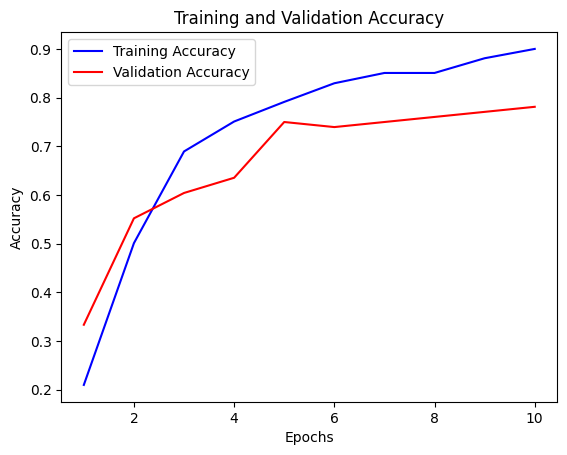

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.efficientnet import preprocess_input, EfficientNetB0
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD  # Import SGD optimizer
from tqdm import tqdm

# Specify paths
train_csv = '/content/train.csv'
val_csv = '/content/val.csv'
test_csv = '/content/test.csv'
dataset_path = '/content/waste_images'  # Adjust this to your dataset path

# Load CSV files
train_df = pd.read_csv(train_csv)
val_df = pd.read_csv(val_csv)
test_df = pd.read_csv(test_csv)

# Extract image paths and labels
train_paths, train_labels = train_df['image_path'].values, train_df['label'].values
val_paths, val_labels = val_df['image_path'].values, val_df['label'].values
test_paths, test_labels = test_df['image_path'].values, test_df['label'].values

# Encode labels
label_encoder = LabelEncoder()
train_labels_enc = label_encoder.fit_transform(train_labels)
val_labels_enc = label_encoder.transform(val_labels)
test_labels_enc = label_encoder.transform(test_labels)

# Parameters
batch_size = 32
image_size = (224, 224)  # EfficientNet input size

# Function to preprocess images
def load_preprocess_image(image_path, label):
    image_path_str = image_path.numpy().decode('utf-8')  # Decode the bytes to string
    img = load_img(os.path.join(dataset_path, image_path_str), target_size=image_size)
    img_array = img_to_array(img)
    img_array = preprocess_input(img_array)
    return img_array, label

def wrap_load_preprocess_image(image_path, label):
    img, label = tf.py_function(load_preprocess_image, [image_path, label], [tf.float32, tf.int64])
    img.set_shape((image_size[0], image_size[1], 3))
    label.set_shape(())
    return img, label

# Create tf.data.Dataset objects
def create_dataset(paths, labels, batch_size, is_training=False):
    dataset = tf.data.Dataset.from_tensor_slices((paths, labels))
    dataset = dataset.map(wrap_load_preprocess_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    if is_training:
        dataset = dataset.shuffle(buffer_size=len(paths)).repeat()
    dataset = dataset.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)
    return dataset

train_dataset = create_dataset(train_paths, train_labels_enc, batch_size, is_training=True)
val_dataset = create_dataset(val_paths, val_labels_enc, batch_size, is_training=False)
test_dataset = create_dataset(test_paths, test_labels_enc, batch_size, is_training=False)

# Build and Compile the EfficientNet Model
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(image_size[0], image_size[1], 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(np.unique(train_labels)), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Use SGD optimizer instead of Adam
opt = SGD(learning_rate=0.001, momentum=0.9)  # Example learning rate and momentum
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Custom tqdm callback for progress visualization
class TQDMCallback(tf.keras.callbacks.Callback):
    def __init__(self, epochs):
        self.epochs = epochs

    def on_epoch_begin(self, epoch, logs=None):
        self.epoch_pbar = tqdm(total=self.params['steps'], desc=f'Epoch {epoch + 1}/{self.epochs}', position=0)

    def on_epoch_end(self, epoch, logs=None):
        self.epoch_pbar.close()

    def on_batch_end(self, batch, logs=None):
        self.epoch_pbar.update(1)

# Train the model with tqdm integration
tqdm_callback = TQDMCallback(epochs=10)
steps_per_epoch = len(train_paths) // batch_size
validation_steps = len(val_paths) // batch_size

history = model.fit(train_dataset,
                    validation_data=val_dataset,
                    epochs=10,
                    steps_per_epoch=steps_per_epoch,
                    validation_steps=validation_steps,
                    verbose=0,
                    callbacks=[tqdm_callback])

# Evaluate the model on validation set
val_loss, val_acc = model.evaluate(val_dataset, verbose=0)
print(f"\nValidation Accuracy: {val_acc:.4f}")

# Make predictions on validation set
val_pred = model.predict(val_dataset)
val_pred_labels = np.argmax(val_pred, axis=1)

# Print classification report for validation data
val_report = classification_report(val_labels_enc, val_pred_labels[:len(val_labels_enc)], target_names=label_encoder.classes_, output_dict=True)
print("\nClassification Report for Validation Data:")
print(f"{'Class':<12} {'Precision':<12} {'Recall':<12} {'F1-score':<12} {'Support':<12}")
print("-" * 60)
for class_name in label_encoder.classes_:
    precision = val_report[class_name]['precision']
    recall = val_report[class_name]['recall']
    f1_score = val_report[class_name]['f1-score']
    support = val_report[class_name]['support']
    print(f"{class_name:<12} {precision:<12.4f} {recall:<12.4f} {f1_score:<12.4f} {support:<12}")
print("-" * 60)
val_accuracy = val_report['accuracy']
print(f"{'Validation Accuracy:':<12} {val_accuracy:<12.4f}")

# Evaluate the model on test set
test_loss, test_acc = model.evaluate(test_dataset, verbose=0)
print(f"\nTest Accuracy: {test_acc:.4f}")

# Make predictions on test set
test_pred = model.predict(test_dataset)
test_pred_labels = np.argmax(test_pred, axis=1)

# Print classification report for test data
test_report = classification_report(test_labels_enc, test_pred_labels[:len(test_labels_enc)], target_names=label_encoder.classes_, output_dict=True)
print("\nClassification Report for Test Data:")
print(f"{'Class':<12} {'Precision':<12} {'Recall':<12} {'F1-score':<12} {'Support':<12}")
print("-" * 60)
for class_name in label_encoder.classes_:
    precision = test_report[class_name]['precision']
    recall = test_report[class_name]['recall']
    f1_score = test_report[class_name]['f1-score']
    support = test_report[class_name]['support']
    print(f"{class_name:<12} {precision:<12.4f} {recall:<12.4f} {f1_score:<12.4f} {support:<12}")
print("-" * 60)
test_accuracy = test_report['accuracy']
print(f"{'Test Accuracy:':<12} {test_accuracy:<12.4f}")

# Underfitting and Overfitting Analysis
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

print("\nUnderfitting and Overfitting Analysis:")
epochs = range(1, len(train_acc) + 1)
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# efficient sgd train test curve

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.efficientnet import preprocess_input, EfficientNetB0
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD  # Import SGD optimizer
from tqdm import tqdm

# Specify paths
train_csv = '/content/train.csv'
val_csv = '/content/val.csv'
test_csv = '/content/test.csv'
dataset_path = '/content/waste_images'  # Adjust this to your dataset path

# Load CSV files
train_df = pd.read_csv(train_csv)
val_df = pd.read_csv(val_csv)
test_df = pd.read_csv(test_csv)

# Extract image paths and labels
train_paths, train_labels = train_df['image_path'].values, train_df['label'].values
val_paths, val_labels = val_df['image_path'].values, val_df['label'].values
test_paths, test_labels = test_df['image_path'].values, test_df['label'].values

# Encode labels
label_encoder = LabelEncoder()
train_labels_enc = label_encoder.fit_transform(train_labels)
val_labels_enc = label_encoder.transform(val_labels)
test_labels_enc = label_encoder.transform(test_labels)

# Parameters
batch_size = 32
image_size = (224, 224)  # EfficientNet input size

# Function to preprocess images
def load_preprocess_image(image_path, label):
    image_path_str = image_path.numpy().decode('utf-8')  # Decode the bytes to string
    img = load_img(os.path.join(dataset_path, image_path_str), target_size=image_size)
    img_array = img_to_array(img)
    img_array = preprocess_input(img_array)
    return img_array, label

def wrap_load_preprocess_image(image_path, label):
    img, label = tf.py_function(load_preprocess_image, [image_path, label], [tf.float32, tf.int64])
    img.set_shape((image_size[0], image_size[1], 3))
    label.set_shape(())
    return img, label

# Create tf.data.Dataset objects
def create_dataset(paths, labels, batch_size, is_training=False):
    dataset = tf.data.Dataset.from_tensor_slices((paths, labels))
    dataset = dataset.map(wrap_load_preprocess_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    if is_training:
        dataset = dataset.shuffle(buffer_size=len(paths)).repeat()
    dataset = dataset.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)
    return dataset

train_dataset = create_dataset(train_paths, train_labels_enc, batch_size, is_training=True)
val_dataset = create_dataset(val_paths, val_labels_enc, batch_size, is_training=False)
test_dataset = create_dataset(test_paths, test_labels_enc, batch_size, is_training=False)

# Build and Compile the EfficientNet Model
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(image_size[0], image_size[1], 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(np.unique(train_labels)), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Use SGD optimizer instead of Adam
opt = SGD(learning_rate=0.001, momentum=0.9)  # Example learning rate and momentum
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Custom tqdm callback for progress visualization
class TQDMCallback(tf.keras.callbacks.Callback):
    def __init__(self, epochs):
        self.epochs = epochs

    def on_epoch_begin(self, epoch, logs=None):
        self.epoch_pbar = tqdm(total=self.params['steps'], desc=f'Epoch {epoch + 1}/{self.epochs}', position=0)

    def on_epoch_end(self, epoch, logs=None):
        self.epoch_pbar.close()

    def on_batch_end(self, batch, logs=None):
        self.epoch_pbar.update(1)

# Train the model with tqdm integration
tqdm_callback = TQDMCallback(epochs=10)
steps_per_epoch = len(train_paths) // batch_size
validation_steps = len(val_paths) // batch_size

history = model.fit(train_dataset,
                    validation_data=val_dataset,
                    epochs=10,
                    steps_per_epoch=steps_per_epoch,
                    validation_steps=validation_steps,
                    verbose=0,
                    callbacks=[tqdm_callback])

# Evaluate the model on validation set
val_loss, val_acc = model.evaluate(val_dataset, verbose=0)
print(f"\nValidation Accuracy: {val_acc:.4f}")

# Make predictions on validation set
val_pred = model.predict(val_dataset)
val_pred_labels = np.argmax(val_pred, axis=1)

# Print classification report for validation data
val_report = classification_report(val_labels_enc, val_pred_labels[:len(val_labels_enc)], target_names=label_encoder.classes_, output_dict=True)
print("\nClassification Report for Validation Data:")
print(f"{'Class':<12} {'Precision':<12} {'Recall':<12} {'F1-score':<12} {'Support':<12}")
print("-" * 60)
for class_name in label_encoder.classes_:
    precision = val_report[class_name]['precision']
    recall = val_report[class_name]['recall']
    f1_score = val_report[class_name]['f1-score']
    support = val_report[class_name]['support']
    print(f"{class_name:<12} {precision:<12.4f} {recall:<12.4f} {f1_score:<12.4f} {support:<12}")
print("-" * 60)
val_accuracy = val_report['accuracy']
print(f"{'Validation Accuracy:':<12} {val_accuracy:<12.4f}")

# Evaluate the model on test set
test_loss, test_acc = model.evaluate(test_dataset, verbose=0)
print(f"\nTest Accuracy: {test_acc:.4f}")

# Make predictions on test set
test_pred = model.predict(test_dataset)
test_pred_labels = np.argmax(test_pred, axis=1)

# Print classification report for test data
test_report = classification_report(test_labels_enc, test_pred_labels[:len(test_labels_enc)], target_names=label_encoder.classes_, output_dict=True)
print("\nClassification Report for Test Data:")
print(f"{'Class':<12} {'Precision':<12} {'Recall':<12} {'F1-score':<12} {'Support':<12}")
print("-" * 60)
for class_name in label_encoder.classes_:
    precision = test_report[class_name]['precision']
    recall = test_report[class_name]['recall']
    f1_score = test_report[class_name]['f1-score']
    support = test_report[class_name]['support']
    print(f"{class_name:<12} {precision:<12.4f} {recall:<12.4f} {f1_score:<12.4f} {support:<12}")
print("-" * 60)
test_accuracy = test_report['accuracy']
print(f"{'Test Accuracy:':<12} {test_accuracy:<12.4f}")

# Underfitting and Overfitting Analysis
train_acc = history.history['accuracy']
test_acc = history.history['test_accuracy']

print("\nUnderfitting and Overfitting Analysis:")
epochs = range(1, len(train_acc) + 1)
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Test Accuracy')
plt.title('Training and Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Use EfficientNetB0: Switch back to a lighter EfficientNet model for faster training.
Reduce Image Size: Use a smaller image size, such as 224x224.
Freeze More Layers: Freeze more layers of the base model to reduce computation.
Reduce Dropout: Reduce the amount of dropout.

In [ ]:
# import os
# import numpy as np
# import pandas as pd
# import tensorflow as tf
# from tensorflow.keras.preprocessing.image import load_img, img_to_array
# from tensorflow.keras.applications.efficientnet import preprocess_input, EfficientNetB0
# from sklearn.preprocessing import LabelEncoder
# from sklearn.metrics import classification_report
# from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
# from tensorflow.keras.models import Model
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
# from tqdm import tqdm
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# # Specify paths
# train_csv = '/content/train.csv'
# val_csv = '/content/val.csv'
# test_csv = '/content/test.csv'
# dataset_path = '/content/waste_images'  # Adjust this to your dataset path

# # Load CSV files
# train_df = pd.read_csv(train_csv)
# val_df = pd.read_csv(val_csv)
# test_df = pd.read_csv(test_csv)

# # Encode labels
# label_encoder = LabelEncoder()
# train_labels_enc = label_encoder.fit_transform(train_df['label'].values)
# val_labels_enc = label_encoder.transform(val_df['label'].values)
# test_labels_enc = label_encoder.transform(test_df['label'].values)

# # Parameters
# batch_size = 32
# image_size = (224, 224)  # Reduced image size

# # Data Augmentation
# datagen = ImageDataGenerator(
#     rotation_range=30,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.3,
#     horizontal_flip=True,
#     fill_mode='nearest',
#     preprocessing_function=preprocess_input
# )

# # Training Data Generator
# train_generator = datagen.flow_from_dataframe(
#     dataframe=train_df,
#     directory=dataset_path,
#     x_col='image_path',
#     y_col='label',
#     target_size=image_size,
#     batch_size=batch_size,
#     class_mode='sparse'
# )

# # Validation Data Generator (without augmentation)
# val_generator = ImageDataGenerator(preprocessing_function=preprocess_input).flow_from_dataframe(
#     dataframe=val_df,
#     directory=dataset_path,
#     x_col='image_path',
#     y_col='label',
#     target_size=image_size,
#     batch_size=batch_size,
#     class_mode='sparse',
#     shuffle=False
# )

# # Test Data Generator (without augmentation)
# test_generator = ImageDataGenerator(preprocessing_function=preprocess_input).flow_from_dataframe(
#     dataframe=test_df,
#     directory=dataset_path,
#     x_col='image_path',
#     y_col='label',
#     target_size=image_size,
#     batch_size=batch_size,
#     class_mode='sparse',
#     shuffle=False
# )

# # Build and Compile the EfficientNet Model
# base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(image_size[0], image_size[1], 3))

# base_model.trainable = False  # Freeze the base model

# x = base_model.output
# x = GlobalAveragePooling2D()(x)
# x = Dropout(0.3)(x)  # Reduced dropout layer
# x = Dense(512, activation='relu')(x)  # Reduced dense layer size
# x = Dropout(0.3)(x)  # Reduced dropout layer
# predictions = Dense(len(np.unique(train_labels_enc)), activation='softmax')(x)

# model = Model(inputs=base_model.input, outputs=predictions)

# model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# # Print model summary
# model.summary()

# # Custom tqdm callback for progress visualization
# class TQDMCallback(tf.keras.callbacks.Callback):
#     def __init__(self, epochs):
#         self.epochs = epochs

#     def on_epoch_begin(self, epoch, logs=None):
#         self.epoch_pbar = tqdm(total=self.params['steps'], desc=f'Epoch {epoch + 1}/{self.epochs}', position=0)

#     def on_epoch_end(self, epoch, logs=None):
#         self.epoch_pbar.close()

#     def on_batch_end(self, batch, logs=None):
#         self.epoch_pbar.update(1)

# # Callbacks
# lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-7)
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# # Train the model with tqdm integration
# tqdm_callback = TQDMCallback(epochs=15)  # Reduced number of epochs
# steps_per_epoch = len(train_df) // batch_size
# validation_steps = len(val_df) // batch_size

# history = model.fit(train_generator,
#                     validation_data=val_generator,
#                     epochs=15,
#                     steps_per_epoch=steps_per_epoch,
#                     validation_steps=validation_steps,
#                     callbacks=[tqdm_callback, lr_scheduler, early_stopping])

# # Evaluate the model on validation set
# val_loss, val_acc = model.evaluate(val_generator, verbose=0)
# print(f"\nValidation Accuracy: {val_acc:.4f}")

# # Make predictions on validation set
# val_pred = model.predict(val_generator)
# val_pred_labels = np.argmax(val_pred, axis=1)

# # Print classification report for validation data
# val_report = classification_report(val_labels_enc, val_pred_labels[:len(val_labels_enc)], target_names=label_encoder.classes_, output_dict=True)
# print("\nClassification Report for Validation Data:")
# print(f"{'Class':<12} {'Precision':<12} {'Recall':<12} {'F1-score':<12} {'Support':<12}")
# print("-" * 60)
# for class_name in label_encoder.classes_:
#     precision = val_report[class_name]['precision']
#     recall = val_report[class_name]['recall']
#     f1_score = val_report[class_name]['f1-score']
#     support = val_report[class_name]['support']
#     print(f"{class_name:<12} {precision:<12.4f} {recall:<12.4f} {f1_score:<12.4f} {support:<12}")
# print("-" * 60)
# val_accuracy = val_report['accuracy']
# print(f"{'Validation Accuracy:':<12} {val_accuracy:<12.4f}")

# # Evaluate the model on test set
# test_loss, test_acc = model.evaluate(test_generator, verbose=0)
# print(f"\nTest Accuracy: {test_acc:.4f}")

# # Make predictions on test set
# test_pred = model.predict(test_generator)
# test_pred_labels = np.argmax(test_pred, axis=1)

# # Print classification report for test data
# test_report = classification_report(test_labels_enc, test_pred_labels[:len(test_labels_enc)], target_names=label_encoder.classes_, output_dict=True)
# print("\nClassification Report for Test Data:")
# print(f"{'Class':<12} {'Precision':<12} {'Recall':<12} {'F1-score':<12} {'Support':<12}")
# print("-" * 60)
# for class_name in label_encoder.classes_:
#     precision = test_report[class_name]['precision']
#     recall = test_report[class_name]['recall']
#     f1_score = test_report[class_name]['f1-score']
#     support = test_report[class_name]['support']
#     print(f"{class_name:<12} {precision:<12.4f} {recall:<12.4f} {f1_score:<12.4f} {support:<12}")
# print("-" * 60)
# test_accuracy = test_report['accuracy']
# print(f"{'Test Accuracy:':<12} {test_accuracy:<12.4f}")

# # Underfitting and Overfitting Analysis
# train_acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']

# print("\nUnderfitting and Overfitting Analysis:")
# epochs = range(1, len(train_acc) + 1)
# plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
# plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
# plt.title('Training and Validation Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()


Found 1000 validated image filenames belonging to 6 classes.
Found 100 validated image filenames belonging to 6 classes.
Found 100 validated image filenames belonging to 6 classes.
16705208/16705208 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 224, 224, 3)          0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 224, 224, 3)          7         ['rescaling[0][0]']           
 on)                                          

Epoch 1/15:   0%|          | 0/31 [00:00<?, ?it/s]

Epoch 1/15


Epoch 1/15:   3%|▎         | 1/31 [00:23<11:37, 23.23s/it]

 1/31 [..............................] - ETA: 11:37 - loss: 2.1200 - accuracy: 0.0625

Epoch 1/15:   6%|▋         | 2/31 [00:27<05:45, 11.90s/it]

 2/31 [>.............................] - ETA: 1:55 - loss: 2.0445 - accuracy: 0.1094 

Epoch 1/15:  10%|▉         | 3/31 [00:30<03:41,  7.90s/it]

 3/31 [=>............................] - ETA: 1:39 - loss: 1.9645 - accuracy: 0.1250

Epoch 1/15:  13%|█▎        | 4/31 [00:32<02:36,  5.80s/it]

 4/31 [==>...........................] - ETA: 1:27 - loss: 1.9232 - accuracy: 0.1328

Epoch 1/15:  16%|█▌        | 5/31 [00:35<01:58,  4.57s/it]

 5/31 [===>..........................] - ETA: 1:18 - loss: 1.9085 - accuracy: 0.1500

Epoch 1/15:  19%|█▉        | 6/31 [00:38<01:38,  3.93s/it]

 6/31 [====>.........................] - ETA: 1:13 - loss: 1.8931 - accuracy: 0.1615

Epoch 1/15:  23%|██▎       | 7/31 [00:38<01:11,  2.96s/it]

 7/31 [=====>........................] - ETA: 1:02 - loss: 1.8864 - accuracy: 0.1600

Epoch 1/15:  26%|██▌       | 8/31 [00:43<01:18,  3.42s/it]

 8/31 [======>.......................] - ETA: 1:06 - loss: 1.8663 - accuracy: 0.1595

Epoch 1/15:  29%|██▉       | 9/31 [00:46<01:09,  3.18s/it]

 9/31 [=======>......................] - ETA: 1:02 - loss: 1.8392 - accuracy: 0.1742

Epoch 1/15:  32%|███▏      | 10/31 [00:48<01:03,  3.02s/it]

10/31 [========>.....................] - ETA: 59s - loss: 1.8538 - accuracy: 0.1622 

Epoch 1/15:  35%|███▌      | 11/31 [00:51<00:57,  2.90s/it]

11/31 [=========>....................] - ETA: 56s - loss: 1.8283 - accuracy: 0.1768

Epoch 1/15:  39%|███▊      | 12/31 [00:54<00:58,  3.07s/it]

12/31 [==========>...................] - ETA: 54s - loss: 1.8252 - accuracy: 0.1750

Epoch 1/15:  42%|████▏     | 13/31 [00:58<00:58,  3.22s/it]

13/31 [===========>..................] - ETA: 52s - loss: 1.8104 - accuracy: 0.1913

Epoch 1/15:  45%|████▌     | 14/31 [01:00<00:51,  3.03s/it]

14/31 [============>.................] - ETA: 49s - loss: 1.7894 - accuracy: 0.2028

Epoch 1/15:  48%|████▊     | 15/31 [01:04<00:50,  3.15s/it]

15/31 [=============>................] - ETA: 46s - loss: 1.7811 - accuracy: 0.2061

Epoch 1/15:  52%|█████▏    | 16/31 [01:08<00:50,  3.37s/it]

16/31 [==============>...............] - ETA: 45s - loss: 1.7669 - accuracy: 0.2111

Epoch 1/15:  55%|█████▍    | 17/31 [01:13<00:53,  3.85s/it]

17/31 [===============>..............] - ETA: 43s - loss: 1.7571 - accuracy: 0.2173

Epoch 1/15:  58%|█████▊    | 18/31 [01:15<00:45,  3.47s/it]

18/31 [================>.............] - ETA: 40s - loss: 1.7466 - accuracy: 0.2210

Epoch 1/15:  61%|██████▏   | 19/31 [01:18<00:38,  3.21s/it]

19/31 [=================>............] - ETA: 36s - loss: 1.7424 - accuracy: 0.2243

Epoch 1/15:  65%|██████▍   | 20/31 [01:21<00:33,  3.07s/it]

20/31 [==================>...........] - ETA: 33s - loss: 1.7286 - accuracy: 0.2386

Epoch 1/15:  68%|██████▊   | 21/31 [01:24<00:31,  3.10s/it]

21/31 [===================>..........] - ETA: 30s - loss: 1.7165 - accuracy: 0.2500

Epoch 1/15:  71%|███████   | 22/31 [01:28<00:30,  3.34s/it]

22/31 [====================>.........] - ETA: 27s - loss: 1.7086 - accuracy: 0.2588

Epoch 1/15:  74%|███████▍  | 23/31 [01:30<00:25,  3.13s/it]

23/31 [=====================>........] - ETA: 24s - loss: 1.7015 - accuracy: 0.2669

Epoch 1/15:  77%|███████▋  | 24/31 [01:33<00:21,  3.01s/it]

24/31 [======================>.......] - ETA: 21s - loss: 1.7012 - accuracy: 0.2675

Epoch 1/15:  81%|████████  | 25/31 [01:36<00:17,  2.89s/it]

25/31 [=======================>......] - ETA: 18s - loss: 1.6988 - accuracy: 0.2655

Epoch 1/15:  84%|████████▍ | 26/31 [01:39<00:15,  3.05s/it]

26/31 [========================>.....] - ETA: 15s - loss: 1.6881 - accuracy: 0.2760

Epoch 1/15:  87%|████████▋ | 27/31 [01:43<00:12,  3.15s/it]

27/31 [=========================>....] - ETA: 12s - loss: 1.6870 - accuracy: 0.2774

Epoch 1/15:  90%|█████████ | 28/31 [01:45<00:08,  3.00s/it]

28/31 [==========================>...] - ETA: 9s - loss: 1.6823 - accuracy: 0.2810 

Epoch 1/15:  94%|█████████▎| 29/31 [01:48<00:05,  2.89s/it]

29/31 [===========================>..] - ETA: 6s - loss: 1.6760 - accuracy: 0.2854

Epoch 1/15:  97%|█████████▋| 30/31 [01:51<00:02,  2.93s/it]

30/31 [============================>.] - ETA: 3s - loss: 1.6620 - accuracy: 0.2981

Epoch 1/15: 100%|██████████| 31/31 [01:55<00:00,  3.21s/it]

31/31 [==============================] - ETA: 0s - loss: 1.6562 - accuracy: 0.3006

Epoch 1/15: 100%|██████████| 31/31 [02:04<00:00,  4.00s/it]

31/31 [==============================] - 124s 3s/step - loss: 1.6562 - accuracy: 0.3006 - val_loss: 1.2757 - val_accuracy: 0.6250 - lr: 1.0000e-04



Epoch 2/15:   0%|          | 0/31 [00:00<?, ?it/s]

Epoch 2/15


Epoch 2/15:   3%|▎         | 1/31 [00:04<02:27,  4.92s/it]

 1/31 [..............................] - ETA: 2:27 - loss: 1.3681 - accuracy: 0.4062

Epoch 2/15:   6%|▋         | 2/31 [00:07<01:50,  3.80s/it]

 2/31 [>.............................] - ETA: 1:27 - loss: 1.3571 - accuracy: 0.4844

Epoch 2/15:  10%|▉         | 3/31 [00:10<01:29,  3.21s/it]

 3/31 [=>............................] - ETA: 1:17 - loss: 1.3456 - accuracy: 0.4688

Epoch 2/15:  13%|█▎        | 4/31 [00:13<01:19,  2.95s/it]

 4/31 [==>...........................] - ETA: 1:12 - loss: 1.3581 - accuracy: 0.4766

Epoch 2/15:  16%|█▌        | 5/31 [00:15<01:13,  2.83s/it]

 5/31 [===>..........................] - ETA: 1:09 - loss: 1.3354 - accuracy: 0.5063

Epoch 2/15:  19%|█▉        | 6/31 [00:19<01:20,  3.22s/it]

 6/31 [====>.........................] - ETA: 1:13 - loss: 1.3235 - accuracy: 0.5156

Epoch 2/15:  23%|██▎       | 7/31 [00:22<01:13,  3.07s/it]

 7/31 [=====>........................] - ETA: 1:09 - loss: 1.3211 - accuracy: 0.5000

Epoch 2/15:  26%|██▌       | 8/31 [00:24<01:06,  2.91s/it]

 8/31 [======>.......................] - ETA: 1:05 - loss: 1.3123 - accuracy: 0.5117

Epoch 2/15:  29%|██▉       | 9/31 [00:27<01:01,  2.81s/it]

 9/31 [=======>......................] - ETA: 1:02 - loss: 1.3171 - accuracy: 0.5035

Epoch 2/15:  32%|███▏      | 10/31 [00:30<00:57,  2.75s/it]

10/31 [========>.....................] - ETA: 58s - loss: 1.3145 - accuracy: 0.5125 

Epoch 2/15:  35%|███▌      | 11/31 [00:34<01:03,  3.16s/it]

11/31 [=========>....................] - ETA: 58s - loss: 1.3198 - accuracy: 0.5057

Epoch 2/15:  39%|███▊      | 12/31 [00:37<00:57,  3.05s/it]

12/31 [==========>...................] - ETA: 55s - loss: 1.3125 - accuracy: 0.5104

Epoch 2/15:  42%|████▏     | 13/31 [00:39<00:52,  2.93s/it]

13/31 [===========>..................] - ETA: 52s - loss: 1.3009 - accuracy: 0.5192

Epoch 2/15:  45%|████▌     | 14/31 [00:42<00:48,  2.83s/it]

14/31 [============>.................] - ETA: 48s - loss: 1.3060 - accuracy: 0.5201

Epoch 2/15:  48%|████▊     | 15/31 [00:44<00:44,  2.75s/it]

15/31 [=============>................] - ETA: 45s - loss: 1.2990 - accuracy: 0.5250

Epoch 2/15:  52%|█████▏    | 16/31 [00:51<00:58,  3.93s/it]

16/31 [==============>...............] - ETA: 46s - loss: 1.2881 - accuracy: 0.5332

Epoch 2/15:  55%|█████▍    | 17/31 [00:53<00:48,  3.49s/it]

17/31 [===============>..............] - ETA: 42s - loss: 1.2991 - accuracy: 0.5221

Epoch 2/15:  58%|█████▊    | 18/31 [00:56<00:41,  3.20s/it]

18/31 [================>.............] - ETA: 39s - loss: 1.2900 - accuracy: 0.5260

Epoch 2/15:  61%|██████▏   | 19/31 [00:59<00:36,  3.02s/it]

19/31 [=================>............] - ETA: 36s - loss: 1.2808 - accuracy: 0.5329

Epoch 2/15:  65%|██████▍   | 20/31 [01:01<00:32,  2.96s/it]

20/31 [==================>...........] - ETA: 33s - loss: 1.2779 - accuracy: 0.5344

Epoch 2/15:  68%|██████▊   | 21/31 [01:05<00:32,  3.23s/it]

21/31 [===================>..........] - ETA: 30s - loss: 1.2709 - accuracy: 0.5417

Epoch 2/15:  71%|███████   | 22/31 [01:08<00:26,  3.00s/it]

22/31 [====================>.........] - ETA: 27s - loss: 1.2559 - accuracy: 0.5511

Epoch 2/15:  74%|███████▍  | 23/31 [01:10<00:22,  2.87s/it]

23/31 [=====================>........] - ETA: 23s - loss: 1.2503 - accuracy: 0.5557

Epoch 2/15:  77%|███████▋  | 24/31 [01:13<00:19,  2.76s/it]

24/31 [======================>.......] - ETA: 20s - loss: 1.2488 - accuracy: 0.5586

Epoch 2/15:  81%|████████  | 25/31 [01:16<00:17,  2.93s/it]

25/31 [=======================>......] - ETA: 17s - loss: 1.2361 - accuracy: 0.5663

Epoch 2/15:  84%|████████▍ | 26/31 [01:20<00:15,  3.12s/it]

26/31 [========================>.....] - ETA: 15s - loss: 1.2257 - accuracy: 0.5697

Epoch 2/15:  87%|████████▋ | 27/31 [01:22<00:11,  2.92s/it]

27/31 [=========================>....] - ETA: 11s - loss: 1.2271 - accuracy: 0.5660

Epoch 2/15:  90%|█████████ | 28/31 [01:24<00:08,  2.75s/it]

28/31 [==========================>...] - ETA: 8s - loss: 1.2248 - accuracy: 0.5670 

Epoch 2/15:  94%|█████████▎| 29/31 [01:27<00:05,  2.71s/it]

29/31 [===========================>..] - ETA: 5s - loss: 1.2206 - accuracy: 0.5690

Epoch 2/15:  97%|█████████▋| 30/31 [01:28<00:02,  2.13s/it]

30/31 [============================>.] - ETA: 2s - loss: 1.2178 - accuracy: 0.5705

Epoch 2/15: 100%|██████████| 31/31 [01:31<00:00,  2.42s/it]

31/31 [==============================] - ETA: 0s - loss: 1.2092 - accuracy: 0.5764

Epoch 2/15: 100%|██████████| 31/31 [01:41<00:00,  3.28s/it]

31/31 [==============================] - 102s 3s/step - loss: 1.2092 - accuracy: 0.5764 - val_loss: 0.9787 - val_accuracy: 0.6562 - lr: 1.0000e-04



Epoch 3/15:   0%|          | 0/31 [00:00<?, ?it/s]

Epoch 3/15


Epoch 3/15:   3%|▎         | 1/31 [00:03<01:36,  3.21s/it]

 1/31 [..............................] - ETA: 1:36 - loss: 1.1443 - accuracy: 0.6250

Epoch 3/15:   6%|▋         | 2/31 [00:05<01:22,  2.85s/it]

 2/31 [>.............................] - ETA: 1:15 - loss: 1.0435 - accuracy: 0.6719

Epoch 3/15:  10%|▉         | 3/31 [00:08<01:15,  2.69s/it]

 3/31 [=>............................] - ETA: 1:11 - loss: 1.0239 - accuracy: 0.6979

Epoch 3/15:  13%|█▎        | 4/31 [00:11<01:21,  3.02s/it]

 4/31 [==>...........................] - ETA: 1:17 - loss: 1.0224 - accuracy: 0.6953

Epoch 3/15:  16%|█▌        | 5/31 [00:15<01:27,  3.37s/it]

 5/31 [===>..........................] - ETA: 1:22 - loss: 0.9931 - accuracy: 0.7312

Epoch 3/15:  19%|█▉        | 6/31 [00:18<01:16,  3.07s/it]

 6/31 [====>.........................] - ETA: 1:15 - loss: 0.9881 - accuracy: 0.7396

Epoch 3/15:  23%|██▎       | 7/31 [00:20<01:10,  2.92s/it]

 7/31 [=====>........................] - ETA: 1:10 - loss: 0.9983 - accuracy: 0.7143

Epoch 3/15:  26%|██▌       | 8/31 [00:23<01:06,  2.91s/it]

 8/31 [======>.......................] - ETA: 1:07 - loss: 1.0159 - accuracy: 0.7109

Epoch 3/15:  29%|██▉       | 9/31 [00:27<01:11,  3.24s/it]

 9/31 [=======>......................] - ETA: 1:07 - loss: 1.0130 - accuracy: 0.7049

Epoch 3/15:  32%|███▏      | 10/31 [00:30<01:03,  3.00s/it]

10/31 [========>.....................] - ETA: 1:03 - loss: 0.9968 - accuracy: 0.7063

Epoch 3/15:  35%|███▌      | 11/31 [00:32<00:57,  2.88s/it]

11/31 [=========>....................] - ETA: 59s - loss: 0.9869 - accuracy: 0.7159 

Epoch 3/15:  39%|███▊      | 12/31 [00:35<00:52,  2.79s/it]

12/31 [==========>...................] - ETA: 55s - loss: 0.9802 - accuracy: 0.7188

Epoch 3/15:  42%|████▏     | 13/31 [00:38<00:51,  2.84s/it]

13/31 [===========>..................] - ETA: 52s - loss: 0.9799 - accuracy: 0.7139

Epoch 3/15:  45%|████▌     | 14/31 [00:42<00:54,  3.19s/it]

14/31 [============>.................] - ETA: 51s - loss: 0.9747 - accuracy: 0.7188

Epoch 3/15:  48%|████▊     | 15/31 [00:44<00:47,  2.97s/it]

15/31 [=============>................] - ETA: 47s - loss: 0.9738 - accuracy: 0.7208

Epoch 3/15:  52%|█████▏    | 16/31 [00:47<00:42,  2.82s/it]

16/31 [==============>...............] - ETA: 44s - loss: 0.9844 - accuracy: 0.7109

Epoch 3/15:  55%|█████▍    | 17/31 [00:49<00:38,  2.77s/it]

17/31 [===============>..............] - ETA: 40s - loss: 0.9805 - accuracy: 0.7132

Epoch 3/15:  58%|█████▊    | 18/31 [00:53<00:37,  2.86s/it]

18/31 [================>.............] - ETA: 38s - loss: 0.9806 - accuracy: 0.7083

Epoch 3/15:  61%|██████▏   | 19/31 [00:56<00:36,  3.05s/it]

19/31 [=================>............] - ETA: 35s - loss: 0.9838 - accuracy: 0.7056

Epoch 3/15:  65%|██████▍   | 20/31 [00:59<00:33,  3.03s/it]

20/31 [==================>...........] - ETA: 32s - loss: 0.9852 - accuracy: 0.7047

Epoch 3/15:  68%|██████▊   | 21/31 [01:02<00:28,  2.89s/it]

21/31 [===================>..........] - ETA: 29s - loss: 0.9856 - accuracy: 0.7009

Epoch 3/15:  71%|███████   | 22/31 [01:04<00:25,  2.80s/it]

22/31 [====================>.........] - ETA: 26s - loss: 0.9821 - accuracy: 0.7003

Epoch 3/15:  74%|███████▍  | 23/31 [01:08<00:24,  3.09s/it]

23/31 [=====================>........] - ETA: 23s - loss: 0.9804 - accuracy: 0.7065

Epoch 3/15:  77%|███████▋  | 24/31 [01:11<00:21,  3.10s/it]

24/31 [======================>.......] - ETA: 20s - loss: 0.9740 - accuracy: 0.7044

Epoch 3/15:  81%|████████  | 25/31 [01:14<00:17,  2.91s/it]

25/31 [=======================>......] - ETA: 17s - loss: 0.9734 - accuracy: 0.7050

Epoch 3/15:  84%|████████▍ | 26/31 [01:16<00:13,  2.77s/it]

26/31 [========================>.....] - ETA: 14s - loss: 0.9734 - accuracy: 0.7019

Epoch 3/15:  87%|████████▋ | 27/31 [01:18<00:10,  2.68s/it]

27/31 [=========================>....] - ETA: 11s - loss: 0.9782 - accuracy: 0.6979

Epoch 3/15:  90%|█████████ | 28/31 [01:22<00:08,  2.84s/it]

28/31 [==========================>...] - ETA: 8s - loss: 0.9774 - accuracy: 0.6964 

Epoch 3/15:  94%|█████████▎| 29/31 [01:25<00:05,  2.97s/it]

29/31 [===========================>..] - ETA: 5s - loss: 0.9765 - accuracy: 0.6950

Epoch 3/15:  97%|█████████▋| 30/31 [01:26<00:02,  2.28s/it]

30/31 [============================>.] - ETA: 2s - loss: 0.9766 - accuracy: 0.6934

Epoch 3/15: 100%|██████████| 31/31 [01:28<00:00,  2.30s/it]

31/31 [==============================] - ETA: 0s - loss: 0.9724 - accuracy: 0.6963

Epoch 3/15: 100%|██████████| 31/31 [01:38<00:00,  3.18s/it]

31/31 [==============================] - 99s 3s/step - loss: 0.9724 - accuracy: 0.6963 - val_loss: 0.8101 - val_accuracy: 0.7188 - lr: 1.0000e-04



Epoch 4/15:   0%|          | 0/31 [00:00<?, ?it/s]

Epoch 4/15


Epoch 4/15:   3%|▎         | 1/31 [00:05<02:42,  5.43s/it]

 1/31 [..............................] - ETA: 2:43 - loss: 0.6876 - accuracy: 0.8125

Epoch 4/15:   6%|▋         | 2/31 [00:09<02:15,  4.66s/it]

 2/31 [>.............................] - ETA: 1:59 - loss: 0.7427 - accuracy: 0.7812

Epoch 4/15:  10%|▉         | 3/31 [00:14<02:14,  4.81s/it]

 3/31 [=>............................] - ETA: 2:07 - loss: 0.7653 - accuracy: 0.7708

Epoch 4/15:  13%|█▎        | 4/31 [00:20<02:17,  5.11s/it]

 4/31 [==>...........................] - ETA: 2:11 - loss: 0.8053 - accuracy: 0.7422

Epoch 4/15:  16%|█▌        | 5/31 [00:22<01:48,  4.16s/it]

 5/31 [===>..........................] - ETA: 1:51 - loss: 0.8363 - accuracy: 0.7375

Epoch 4/15:  19%|█▉        | 6/31 [00:24<01:28,  3.54s/it]

 6/31 [====>.........................] - ETA: 1:37 - loss: 0.8292 - accuracy: 0.7344

Epoch 4/15:  23%|██▎       | 7/31 [00:27<01:17,  3.23s/it]

 7/31 [=====>........................] - ETA: 1:28 - loss: 0.8220 - accuracy: 0.7366

Epoch 4/15:  26%|██▌       | 8/31 [00:28<00:56,  2.44s/it]

 8/31 [======>.......................] - ETA: 1:14 - loss: 0.8183 - accuracy: 0.7371

Epoch 4/15:  29%|██▉       | 9/31 [00:31<00:58,  2.64s/it]

 9/31 [=======>......................] - ETA: 1:11 - loss: 0.8378 - accuracy: 0.7273

Epoch 4/15:  32%|███▏      | 10/31 [00:34<01:01,  2.95s/it]

10/31 [========>.....................] - ETA: 1:08 - loss: 0.8408 - accuracy: 0.7264

Epoch 4/15:  35%|███▌      | 11/31 [00:37<00:55,  2.80s/it]

11/31 [=========>....................] - ETA: 1:03 - loss: 0.8407 - accuracy: 0.7348

Epoch 4/15:  39%|███▊      | 12/31 [00:39<00:51,  2.71s/it]

12/31 [==========>...................] - ETA: 59s - loss: 0.8507 - accuracy: 0.7333 

Epoch 4/15:  42%|████▏     | 13/31 [00:42<00:47,  2.66s/it]

13/31 [===========>..................] - ETA: 55s - loss: 0.8495 - accuracy: 0.7321

Epoch 4/15:  45%|████▌     | 14/31 [00:45<00:47,  2.77s/it]

14/31 [============>.................] - ETA: 52s - loss: 0.8436 - accuracy: 0.7335

Epoch 4/15:  48%|████▊     | 15/31 [00:49<00:49,  3.12s/it]

15/31 [=============>................] - ETA: 50s - loss: 0.8537 - accuracy: 0.7259

Epoch 4/15:  52%|█████▏    | 16/31 [00:52<00:44,  2.97s/it]

16/31 [==============>...............] - ETA: 46s - loss: 0.8461 - accuracy: 0.7275

Epoch 4/15:  55%|█████▍    | 17/31 [00:54<00:39,  2.84s/it]

17/31 [===============>..............] - ETA: 43s - loss: 0.8380 - accuracy: 0.7288

Epoch 4/15:  58%|█████▊    | 18/31 [00:57<00:35,  2.77s/it]

18/31 [================>.............] - ETA: 39s - loss: 0.8297 - accuracy: 0.7373

Epoch 4/15:  61%|██████▏   | 19/31 [01:00<00:35,  2.93s/it]

19/31 [=================>............] - ETA: 36s - loss: 0.8256 - accuracy: 0.7414

Epoch 4/15:  65%|██████▍   | 20/31 [01:04<00:34,  3.16s/it]

20/31 [==================>...........] - ETA: 34s - loss: 0.8153 - accuracy: 0.7451

Epoch 4/15:  68%|██████▊   | 21/31 [01:06<00:29,  2.99s/it]

21/31 [===================>..........] - ETA: 30s - loss: 0.8198 - accuracy: 0.7423

Epoch 4/15:  71%|███████   | 22/31 [01:09<00:25,  2.87s/it]

22/31 [====================>.........] - ETA: 27s - loss: 0.8193 - accuracy: 0.7397

Epoch 4/15:  74%|███████▍  | 23/31 [01:11<00:21,  2.71s/it]

23/31 [=====================>........] - ETA: 24s - loss: 0.8216 - accuracy: 0.7402

Epoch 4/15:  77%|███████▋  | 24/31 [01:14<00:19,  2.82s/it]

24/31 [======================>.......] - ETA: 21s - loss: 0.8235 - accuracy: 0.7379

Epoch 4/15:  81%|████████  | 25/31 [01:18<00:18,  3.04s/it]

25/31 [=======================>......] - ETA: 18s - loss: 0.8244 - accuracy: 0.7384

Epoch 4/15:  84%|████████▍ | 26/31 [01:20<00:14,  2.86s/it]

26/31 [========================>.....] - ETA: 15s - loss: 0.8230 - accuracy: 0.7364

Epoch 4/15:  87%|████████▋ | 27/31 [01:23<00:11,  2.78s/it]

27/31 [=========================>....] - ETA: 11s - loss: 0.8303 - accuracy: 0.7345

Epoch 4/15:  90%|█████████ | 28/31 [01:26<00:08,  2.73s/it]

28/31 [==========================>...] - ETA: 8s - loss: 0.8241 - accuracy: 0.7397 

Epoch 4/15:  94%|█████████▎| 29/31 [01:29<00:05,  2.96s/it]

29/31 [===========================>..] - ETA: 6s - loss: 0.8182 - accuracy: 0.7434

Epoch 4/15:  97%|█████████▋| 30/31 [01:32<00:03,  3.08s/it]

30/31 [============================>.] - ETA: 3s - loss: 0.8118 - accuracy: 0.7447

Epoch 4/15: 100%|██████████| 31/31 [01:35<00:00,  2.81s/it]

31/31 [==============================] - ETA: 0s - loss: 0.8127 - accuracy: 0.7417

Epoch 4/15: 100%|██████████| 31/31 [01:45<00:00,  3.40s/it]

31/31 [==============================] - 105s 3s/step - loss: 0.8127 - accuracy: 0.7417 - val_loss: 0.6939 - val_accuracy: 0.7604 - lr: 1.0000e-04



Epoch 5/15:   0%|          | 0/31 [00:00<?, ?it/s]

Epoch 5/15


Epoch 5/15:   3%|▎         | 1/31 [00:03<01:44,  3.48s/it]

 1/31 [..............................] - ETA: 1:44 - loss: 0.6110 - accuracy: 0.8125

Epoch 5/15:   6%|▋         | 2/31 [00:06<01:26,  2.97s/it]

 2/31 [>.............................] - ETA: 1:15 - loss: 0.6288 - accuracy: 0.7500

Epoch 5/15:  10%|▉         | 3/31 [00:09<01:22,  2.95s/it]

 3/31 [=>............................] - ETA: 1:17 - loss: 0.8164 - accuracy: 0.6979

Epoch 5/15:  13%|█▎        | 4/31 [00:13<01:30,  3.37s/it]

 4/31 [==>...........................] - ETA: 1:25 - loss: 0.8205 - accuracy: 0.7031

Epoch 5/15:  16%|█▌        | 5/31 [00:15<01:18,  3.02s/it]

 5/31 [===>..........................] - ETA: 1:17 - loss: 0.8159 - accuracy: 0.7125

Epoch 5/15:  19%|█▉        | 6/31 [00:19<01:22,  3.29s/it]

 6/31 [====>.........................] - ETA: 1:18 - loss: 0.7904 - accuracy: 0.7240

Epoch 5/15:  23%|██▎       | 7/31 [00:26<01:52,  4.68s/it]

 7/31 [=====>........................] - ETA: 1:33 - loss: 0.7785 - accuracy: 0.7188

Epoch 5/15:  26%|██▌       | 8/31 [00:32<01:56,  5.05s/it]

 8/31 [======>.......................] - ETA: 1:35 - loss: 0.7507 - accuracy: 0.7383

Epoch 5/15:  29%|██▉       | 9/31 [00:35<01:35,  4.33s/it]

 9/31 [=======>......................] - ETA: 1:27 - loss: 0.7500 - accuracy: 0.7431

Epoch 5/15:  32%|███▏      | 10/31 [00:38<01:19,  3.81s/it]

10/31 [========>.....................] - ETA: 1:20 - loss: 0.7391 - accuracy: 0.7500

Epoch 5/15:  35%|███▌      | 11/31 [00:41<01:12,  3.61s/it]

11/31 [=========>....................] - ETA: 1:15 - loss: 0.7242 - accuracy: 0.7528

Epoch 5/15:  39%|███▊      | 12/31 [00:44<01:08,  3.60s/it]

12/31 [==========>...................] - ETA: 1:11 - loss: 0.7184 - accuracy: 0.7578

Epoch 5/15:  42%|████▏     | 13/31 [00:47<00:59,  3.29s/it]

13/31 [===========>..................] - ETA: 1:05 - loss: 0.7253 - accuracy: 0.7500

Epoch 5/15:  45%|████▌     | 14/31 [00:49<00:52,  3.09s/it]

14/31 [============>.................] - ETA: 1:00 - loss: 0.7354 - accuracy: 0.7455

Epoch 5/15:  48%|████▊     | 15/31 [00:53<00:50,  3.16s/it]

15/31 [=============>................] - ETA: 56s - loss: 0.7265 - accuracy: 0.7500 

Epoch 5/15:  52%|█████▏    | 16/31 [00:57<00:52,  3.52s/it]

16/31 [==============>...............] - ETA: 54s - loss: 0.7146 - accuracy: 0.7559

Epoch 5/15:  55%|█████▍    | 17/31 [01:00<00:45,  3.26s/it]

17/31 [===============>..............] - ETA: 49s - loss: 0.7132 - accuracy: 0.7574

Epoch 5/15:  58%|█████▊    | 18/31 [01:02<00:39,  3.07s/it]

18/31 [================>.............] - ETA: 45s - loss: 0.7211 - accuracy: 0.7535

Epoch 5/15:  61%|██████▏   | 19/31 [01:03<00:28,  2.37s/it]

19/31 [=================>............] - ETA: 40s - loss: 0.7200 - accuracy: 0.7551

Epoch 5/15:  65%|██████▍   | 20/31 [01:06<00:27,  2.49s/it]

20/31 [==================>...........] - ETA: 36s - loss: 0.7146 - accuracy: 0.7581

Epoch 5/15:  68%|██████▊   | 21/31 [01:09<00:26,  2.64s/it]

21/31 [===================>..........] - ETA: 32s - loss: 0.7081 - accuracy: 0.7654

Epoch 5/15:  71%|███████   | 22/31 [01:13<00:27,  3.00s/it]

22/31 [====================>.........] - ETA: 29s - loss: 0.7076 - accuracy: 0.7662

Epoch 5/15:  74%|███████▍  | 23/31 [01:15<00:22,  2.87s/it]

23/31 [=====================>........] - ETA: 26s - loss: 0.7073 - accuracy: 0.7640

Epoch 5/15:  77%|███████▋  | 24/31 [01:18<00:19,  2.77s/it]

24/31 [======================>.......] - ETA: 22s - loss: 0.7059 - accuracy: 0.7661

Epoch 5/15:  81%|████████  | 25/31 [01:20<00:16,  2.71s/it]

25/31 [=======================>......] - ETA: 19s - loss: 0.7072 - accuracy: 0.7680

Epoch 5/15:  84%|████████▍ | 26/31 [01:24<00:14,  2.84s/it]

26/31 [========================>.....] - ETA: 16s - loss: 0.7052 - accuracy: 0.7698

Epoch 5/15:  87%|████████▋ | 27/31 [01:27<00:12,  3.05s/it]

27/31 [=========================>....] - ETA: 12s - loss: 0.6986 - accuracy: 0.7726

Epoch 5/15:  90%|█████████ | 28/31 [01:30<00:08,  2.90s/it]

28/31 [==========================>...] - ETA: 9s - loss: 0.7034 - accuracy: 0.7706 

Epoch 5/15:  94%|█████████▎| 29/31 [01:32<00:05,  2.79s/it]

29/31 [===========================>..] - ETA: 6s - loss: 0.6991 - accuracy: 0.7754

Epoch 5/15:  97%|█████████▋| 30/31 [01:35<00:02,  2.72s/it]

30/31 [============================>.] - ETA: 3s - loss: 0.6980 - accuracy: 0.7724

Epoch 5/15: 100%|██████████| 31/31 [01:37<00:00,  2.65s/it]

31/31 [==============================] - ETA: 0s - loss: 0.7012 - accuracy: 0.7727

Epoch 5/15: 100%|██████████| 31/31 [01:48<00:00,  3.49s/it]

31/31 [==============================] - 108s 3s/step - loss: 0.7012 - accuracy: 0.7727 - val_loss: 0.6123 - val_accuracy: 0.7708 - lr: 1.0000e-04



Epoch 6/15:   0%|          | 0/31 [00:00<?, ?it/s]

Epoch 6/15


Epoch 6/15:   3%|▎         | 1/31 [00:03<01:42,  3.43s/it]

 1/31 [..............................] - ETA: 1:42 - loss: 0.7088 - accuracy: 0.7812

Epoch 6/15:   6%|▋         | 2/31 [00:06<01:39,  3.42s/it]

 2/31 [>.............................] - ETA: 1:38 - loss: 0.6300 - accuracy: 0.8125

Epoch 6/15:  10%|▉         | 3/31 [00:10<01:34,  3.38s/it]

 3/31 [=>............................] - ETA: 1:34 - loss: 0.5827 - accuracy: 0.8542

Epoch 6/15:  13%|█▎        | 4/31 [00:12<01:22,  3.07s/it]

 4/31 [==>...........................] - ETA: 1:24 - loss: 0.6116 - accuracy: 0.8359

Epoch 6/15:  16%|█▌        | 5/31 [00:15<01:15,  2.90s/it]

 5/31 [===>..........................] - ETA: 1:17 - loss: 0.5978 - accuracy: 0.8250

Epoch 6/15:  19%|█▉        | 6/31 [00:17<01:10,  2.80s/it]

 6/31 [====>.........................] - ETA: 1:12 - loss: 0.5994 - accuracy: 0.8229

Epoch 6/15:  23%|██▎       | 7/31 [00:21<01:13,  3.08s/it]

 7/31 [=====>........................] - ETA: 1:12 - loss: 0.6390 - accuracy: 0.8036

Epoch 6/15:  26%|██▌       | 8/31 [00:24<01:11,  3.13s/it]

 8/31 [======>.......................] - ETA: 1:10 - loss: 0.6453 - accuracy: 0.7969

Epoch 6/15:  29%|██▉       | 9/31 [00:27<01:04,  2.95s/it]

 9/31 [=======>......................] - ETA: 1:06 - loss: 0.6455 - accuracy: 0.7951

Epoch 6/15:  32%|███▏      | 10/31 [00:30<00:59,  2.84s/it]

10/31 [========>.....................] - ETA: 1:02 - loss: 0.6533 - accuracy: 0.7906

Epoch 6/15:  35%|███▌      | 11/31 [00:32<00:55,  2.75s/it]

11/31 [=========>....................] - ETA: 58s - loss: 0.6488 - accuracy: 0.7869 

Epoch 6/15:  39%|███▊      | 12/31 [00:36<01:01,  3.21s/it]

12/31 [==========>...................] - ETA: 57s - loss: 0.6434 - accuracy: 0.7865

Epoch 6/15:  42%|████▏     | 13/31 [00:39<00:54,  3.01s/it]

13/31 [===========>..................] - ETA: 53s - loss: 0.6631 - accuracy: 0.7788

Epoch 6/15:  45%|████▌     | 14/31 [00:41<00:48,  2.86s/it]

14/31 [============>.................] - ETA: 50s - loss: 0.6511 - accuracy: 0.7857

Epoch 6/15:  48%|████▊     | 15/31 [00:44<00:44,  2.78s/it]

15/31 [=============>................] - ETA: 46s - loss: 0.6530 - accuracy: 0.7854

Epoch 6/15:  52%|█████▏    | 16/31 [00:50<00:57,  3.82s/it]

16/31 [==============>...............] - ETA: 47s - loss: 0.6424 - accuracy: 0.7930

Epoch 6/15:  55%|█████▍    | 17/31 [00:55<00:58,  4.17s/it]

17/31 [===============>..............] - ETA: 45s - loss: 0.6459 - accuracy: 0.7923

Epoch 6/15:  58%|█████▊    | 18/31 [00:59<00:54,  4.16s/it]

18/31 [================>.............] - ETA: 43s - loss: 0.6392 - accuracy: 0.7917

Epoch 6/15:  61%|██████▏   | 19/31 [01:06<00:58,  4.89s/it]

19/31 [=================>............] - ETA: 42s - loss: 0.6386 - accuracy: 0.7878

Epoch 6/15:  65%|██████▍   | 20/31 [01:10<00:50,  4.62s/it]

20/31 [==================>...........] - ETA: 38s - loss: 0.6398 - accuracy: 0.7875

Epoch 6/15:  68%|██████▊   | 21/31 [01:14<00:43,  4.35s/it]

21/31 [===================>..........] - ETA: 35s - loss: 0.6446 - accuracy: 0.7872

Epoch 6/15:  71%|███████   | 22/31 [01:17<00:37,  4.17s/it]

22/31 [====================>.........] - ETA: 31s - loss: 0.6447 - accuracy: 0.7884

Epoch 6/15:  74%|███████▍  | 23/31 [01:22<00:33,  4.24s/it]

23/31 [=====================>........] - ETA: 28s - loss: 0.6414 - accuracy: 0.7908

Epoch 6/15:  77%|███████▋  | 24/31 [01:25<00:27,  3.96s/it]

24/31 [======================>.......] - ETA: 25s - loss: 0.6438 - accuracy: 0.7904

Epoch 6/15:  81%|████████  | 25/31 [01:28<00:21,  3.55s/it]

25/31 [=======================>......] - ETA: 21s - loss: 0.6396 - accuracy: 0.7937

Epoch 6/15:  84%|████████▍ | 26/31 [01:30<00:16,  3.27s/it]

26/31 [========================>.....] - ETA: 17s - loss: 0.6451 - accuracy: 0.7909

Epoch 6/15:  87%|████████▋ | 27/31 [01:34<00:13,  3.50s/it]

27/31 [=========================>....] - ETA: 14s - loss: 0.6428 - accuracy: 0.7917

Epoch 6/15:  90%|█████████ | 28/31 [01:37<00:09,  3.20s/it]

28/31 [==========================>...] - ETA: 10s - loss: 0.6454 - accuracy: 0.7868

Epoch 6/15:  94%|█████████▎| 29/31 [01:39<00:05,  2.99s/it]

29/31 [===========================>..] - ETA: 6s - loss: 0.6460 - accuracy: 0.7856 

Epoch 6/15:  97%|█████████▋| 30/31 [01:40<00:02,  2.29s/it]

30/31 [============================>.] - ETA: 3s - loss: 0.6470 - accuracy: 0.7853

Epoch 6/15: 100%|██████████| 31/31 [01:42<00:00,  2.30s/it]

31/31 [==============================] - ETA: 0s - loss: 0.6439 - accuracy: 0.7882

Epoch 6/15: 100%|██████████| 31/31 [01:51<00:00,  3.59s/it]

31/31 [==============================] - 111s 4s/step - loss: 0.6439 - accuracy: 0.7882 - val_loss: 0.5496 - val_accuracy: 0.7917 - lr: 1.0000e-04



Epoch 7/15:   0%|          | 0/31 [00:00<?, ?it/s]

Epoch 7/15


Epoch 7/15:   3%|▎         | 1/31 [00:03<01:39,  3.30s/it]

 1/31 [..............................] - ETA: 1:39 - loss: 0.5426 - accuracy: 0.8750

Epoch 7/15:   6%|▋         | 2/31 [00:05<01:21,  2.80s/it]

 2/31 [>.............................] - ETA: 1:10 - loss: 0.6173 - accuracy: 0.8125

Epoch 7/15:  10%|▉         | 3/31 [00:08<01:14,  2.68s/it]

 3/31 [=>............................] - ETA: 1:09 - loss: 0.5958 - accuracy: 0.7917

Epoch 7/15:  13%|█▎        | 4/31 [00:12<01:24,  3.13s/it]

 4/31 [==>...........................] - ETA: 1:19 - loss: 0.5932 - accuracy: 0.7891

Epoch 7/15:  16%|█▌        | 5/31 [00:14<01:18,  3.00s/it]

 5/31 [===>..........................] - ETA: 1:15 - loss: 0.5938 - accuracy: 0.7875

Epoch 7/15:  19%|█▉        | 6/31 [00:17<01:10,  2.81s/it]

 6/31 [====>.........................] - ETA: 1:10 - loss: 0.6386 - accuracy: 0.7708

Epoch 7/15:  23%|██▎       | 7/31 [00:19<01:05,  2.73s/it]

 7/31 [=====>........................] - ETA: 1:06 - loss: 0.6148 - accuracy: 0.7902

Epoch 7/15:  26%|██▌       | 8/31 [00:22<01:00,  2.65s/it]

 8/31 [======>.......................] - ETA: 1:02 - loss: 0.6181 - accuracy: 0.7930

Epoch 7/15:  29%|██▉       | 9/31 [00:26<01:08,  3.10s/it]

 9/31 [=======>......................] - ETA: 1:03 - loss: 0.5974 - accuracy: 0.7986

Epoch 7/15:  32%|███▏      | 10/31 [00:29<01:03,  3.00s/it]

10/31 [========>.....................] - ETA: 1:00 - loss: 0.5921 - accuracy: 0.8062

Epoch 7/15:  35%|███▌      | 11/31 [00:31<00:56,  2.83s/it]

11/31 [=========>....................] - ETA: 56s - loss: 0.5775 - accuracy: 0.8125 

Epoch 7/15:  39%|███▊      | 12/31 [00:34<00:51,  2.72s/it]

12/31 [==========>...................] - ETA: 53s - loss: 0.5805 - accuracy: 0.8125

Epoch 7/15:  42%|████▏     | 13/31 [00:36<00:47,  2.65s/it]

13/31 [===========>..................] - ETA: 49s - loss: 0.5856 - accuracy: 0.8101

Epoch 7/15:  45%|████▌     | 14/31 [00:42<01:02,  3.70s/it]

14/31 [============>.................] - ETA: 51s - loss: 0.5894 - accuracy: 0.8058

Epoch 7/15:  48%|████▊     | 15/31 [00:46<00:59,  3.73s/it]

15/31 [=============>................] - ETA: 49s - loss: 0.5879 - accuracy: 0.8042

Epoch 7/15:  52%|█████▏    | 16/31 [00:50<00:55,  3.71s/it]

16/31 [==============>...............] - ETA: 46s - loss: 0.5921 - accuracy: 0.8027

Epoch 7/15:  55%|█████▍    | 17/31 [00:53<00:49,  3.55s/it]

17/31 [===============>..............] - ETA: 43s - loss: 0.5946 - accuracy: 0.7978

Epoch 7/15:  58%|█████▊    | 18/31 [00:56<00:45,  3.54s/it]

18/31 [================>.............] - ETA: 40s - loss: 0.5841 - accuracy: 0.8021

Epoch 7/15:  61%|██████▏   | 19/31 [00:59<00:38,  3.18s/it]

19/31 [=================>............] - ETA: 37s - loss: 0.5813 - accuracy: 0.8010

Epoch 7/15:  65%|██████▍   | 20/31 [01:01<00:32,  2.97s/it]

20/31 [==================>...........] - ETA: 33s - loss: 0.5830 - accuracy: 0.8000

Epoch 7/15:  68%|██████▊   | 21/31 [01:04<00:28,  2.82s/it]

21/31 [===================>..........] - ETA: 30s - loss: 0.5873 - accuracy: 0.8021

Epoch 7/15:  71%|███████   | 22/31 [01:07<00:25,  2.87s/it]

22/31 [====================>.........] - ETA: 27s - loss: 0.5939 - accuracy: 0.7983

Epoch 7/15:  74%|███████▍  | 23/31 [01:10<00:25,  3.14s/it]

23/31 [=====================>........] - ETA: 24s - loss: 0.5963 - accuracy: 0.8003

Epoch 7/15:  77%|███████▋  | 24/31 [01:13<00:20,  2.99s/it]

24/31 [======================>.......] - ETA: 21s - loss: 0.5961 - accuracy: 0.7982

Epoch 7/15:  81%|████████  | 25/31 [01:16<00:16,  2.82s/it]

25/31 [=======================>......] - ETA: 18s - loss: 0.5908 - accuracy: 0.8012

Epoch 7/15:  84%|████████▍ | 26/31 [01:18<00:13,  2.75s/it]

26/31 [========================>.....] - ETA: 15s - loss: 0.5885 - accuracy: 0.8029

Epoch 7/15:  87%|████████▋ | 27/31 [01:21<00:11,  2.86s/it]

27/31 [=========================>....] - ETA: 12s - loss: 0.5907 - accuracy: 0.8032

Epoch 7/15:  90%|█████████ | 28/31 [01:24<00:08,  2.95s/it]

28/31 [==========================>...] - ETA: 9s - loss: 0.5913 - accuracy: 0.8025 

Epoch 7/15:  94%|█████████▎| 29/31 [01:27<00:05,  2.89s/it]

29/31 [===========================>..] - ETA: 6s - loss: 0.5935 - accuracy: 0.8017

Epoch 7/15:  97%|█████████▋| 30/31 [01:28<00:02,  2.22s/it]

30/31 [============================>.] - ETA: 2s - loss: 0.5926 - accuracy: 0.8024

Epoch 7/15: 100%|██████████| 31/31 [01:30<00:00,  2.24s/it]

31/31 [==============================] - ETA: 0s - loss: 0.5909 - accuracy: 0.8027

Epoch 7/15: 100%|██████████| 31/31 [01:40<00:00,  3.25s/it]

31/31 [==============================] - 101s 3s/step - loss: 0.5909 - accuracy: 0.8027 - val_loss: 0.5014 - val_accuracy: 0.8021 - lr: 1.0000e-04



Epoch 8/15:   0%|          | 0/31 [00:00<?, ?it/s]

Epoch 8/15


Epoch 8/15:   3%|▎         | 1/31 [00:04<02:10,  4.36s/it]

 1/31 [..............................] - ETA: 2:11 - loss: 0.5231 - accuracy: 0.8750

Epoch 8/15:   6%|▋         | 2/31 [00:07<01:43,  3.56s/it]

 2/31 [>.............................] - ETA: 1:26 - loss: 0.5603 - accuracy: 0.8438

Epoch 8/15:  10%|▉         | 3/31 [00:09<01:27,  3.13s/it]

 3/31 [=>............................] - ETA: 1:18 - loss: 0.5121 - accuracy: 0.8542

Epoch 8/15:  13%|█▎        | 4/31 [00:12<01:19,  2.94s/it]

 4/31 [==>...........................] - ETA: 1:14 - loss: 0.5009 - accuracy: 0.8438

Epoch 8/15:  16%|█▌        | 5/31 [00:15<01:13,  2.83s/it]

 5/31 [===>..........................] - ETA: 1:10 - loss: 0.5067 - accuracy: 0.8375

Epoch 8/15:  19%|█▉        | 6/31 [00:19<01:23,  3.32s/it]

 6/31 [====>.........................] - ETA: 1:15 - loss: 0.5190 - accuracy: 0.8229

Epoch 8/15:  23%|██▎       | 7/31 [00:22<01:14,  3.09s/it]

 7/31 [=====>........................] - ETA: 1:11 - loss: 0.5210 - accuracy: 0.8304

Epoch 8/15:  26%|██▌       | 8/31 [00:24<01:05,  2.86s/it]

 8/31 [======>.......................] - ETA: 1:06 - loss: 0.5490 - accuracy: 0.8125

Epoch 8/15:  29%|██▉       | 9/31 [00:26<00:58,  2.67s/it]

 9/31 [=======>......................] - ETA: 1:01 - loss: 0.5409 - accuracy: 0.8229

Epoch 8/15:  32%|███▏      | 10/31 [00:29<00:55,  2.66s/it]

10/31 [========>.....................] - ETA: 58s - loss: 0.5501 - accuracy: 0.8219 

Epoch 8/15:  35%|███▌      | 11/31 [00:30<00:43,  2.16s/it]

11/31 [=========>....................] - ETA: 52s - loss: 0.5483 - accuracy: 0.8262

Epoch 8/15:  39%|███▊      | 12/31 [00:34<00:50,  2.68s/it]

12/31 [==========>...................] - ETA: 51s - loss: 0.5486 - accuracy: 0.8250

Epoch 8/15:  42%|████▏     | 13/31 [00:36<00:47,  2.63s/it]

13/31 [===========>..................] - ETA: 48s - loss: 0.5396 - accuracy: 0.8265

Epoch 8/15:  45%|████▌     | 14/31 [00:39<00:44,  2.64s/it]

14/31 [============>.................] - ETA: 45s - loss: 0.5358 - accuracy: 0.8302

Epoch 8/15:  48%|████▊     | 15/31 [00:41<00:41,  2.59s/it]

15/31 [=============>................] - ETA: 42s - loss: 0.5441 - accuracy: 0.8289

Epoch 8/15:  52%|█████▏    | 16/31 [00:45<00:41,  2.74s/it]

16/31 [==============>...............] - ETA: 40s - loss: 0.5527 - accuracy: 0.8217

Epoch 8/15:  55%|█████▍    | 17/31 [00:48<00:40,  2.88s/it]

17/31 [===============>..............] - ETA: 38s - loss: 0.5511 - accuracy: 0.8212

Epoch 8/15:  58%|█████▊    | 18/31 [00:50<00:36,  2.81s/it]

18/31 [================>.............] - ETA: 35s - loss: 0.5539 - accuracy: 0.8207

Epoch 8/15:  61%|██████▏   | 19/31 [00:53<00:32,  2.71s/it]

19/31 [=================>............] - ETA: 32s - loss: 0.5534 - accuracy: 0.8202

Epoch 8/15:  65%|██████▍   | 20/31 [00:55<00:29,  2.68s/it]

20/31 [==================>...........] - ETA: 29s - loss: 0.5518 - accuracy: 0.8198

Epoch 8/15:  68%|██████▊   | 21/31 [00:59<00:29,  2.94s/it]

21/31 [===================>..........] - ETA: 27s - loss: 0.5493 - accuracy: 0.8225

Epoch 8/15:  71%|███████   | 22/31 [01:02<00:27,  3.01s/it]

22/31 [====================>.........] - ETA: 24s - loss: 0.5490 - accuracy: 0.8206

Epoch 8/15:  74%|███████▍  | 23/31 [01:05<00:22,  2.85s/it]

23/31 [=====================>........] - ETA: 22s - loss: 0.5506 - accuracy: 0.8174

Epoch 8/15:  77%|███████▋  | 24/31 [01:07<00:19,  2.78s/it]

24/31 [======================>.......] - ETA: 19s - loss: 0.5492 - accuracy: 0.8185

Epoch 8/15:  81%|████████  | 25/31 [01:10<00:16,  2.71s/it]

25/31 [=======================>......] - ETA: 16s - loss: 0.5526 - accuracy: 0.8144

Epoch 8/15:  84%|████████▍ | 26/31 [01:14<00:15,  3.14s/it]

26/31 [========================>.....] - ETA: 14s - loss: 0.5533 - accuracy: 0.8131

Epoch 8/15:  87%|████████▋ | 27/31 [01:17<00:12,  3.06s/it]

27/31 [=========================>....] - ETA: 11s - loss: 0.5548 - accuracy: 0.8119

Epoch 8/15:  90%|█████████ | 28/31 [01:19<00:08,  2.93s/it]

28/31 [==========================>...] - ETA: 8s - loss: 0.5484 - accuracy: 0.8154 

Epoch 8/15:  94%|█████████▎| 29/31 [01:22<00:05,  2.82s/it]

29/31 [===========================>..] - ETA: 5s - loss: 0.5529 - accuracy: 0.8142

Epoch 8/15:  97%|█████████▋| 30/31 [01:25<00:02,  2.74s/it]

30/31 [============================>.] - ETA: 2s - loss: 0.5536 - accuracy: 0.8120

Epoch 8/15: 100%|██████████| 31/31 [01:28<00:00,  3.04s/it]

31/31 [==============================] - ETA: 0s - loss: 0.5550 - accuracy: 0.8110

Epoch 8/15: 100%|██████████| 31/31 [01:35<00:00,  3.09s/it]

31/31 [==============================] - 96s 3s/step - loss: 0.5550 - accuracy: 0.8110 - val_loss: 0.4750 - val_accuracy: 0.8021 - lr: 1.0000e-04



Epoch 9/15:   0%|          | 0/31 [00:00<?, ?it/s]

Epoch 9/15


Epoch 9/15:   3%|▎         | 1/31 [00:03<01:40,  3.36s/it]

 1/31 [..............................] - ETA: 1:40 - loss: 0.5985 - accuracy: 0.7812

Epoch 9/15:   6%|▋         | 2/31 [00:07<01:45,  3.65s/it]

 2/31 [>.............................] - ETA: 1:51 - loss: 0.5119 - accuracy: 0.8438

Epoch 9/15:  10%|▉         | 3/31 [00:09<01:27,  3.14s/it]

 3/31 [=>............................] - ETA: 1:29 - loss: 0.4805 - accuracy: 0.8750

Epoch 9/15:  13%|█▎        | 4/31 [00:12<01:19,  2.96s/it]

 4/31 [==>...........................] - ETA: 1:21 - loss: 0.4755 - accuracy: 0.8672

Epoch 9/15:  16%|█▌        | 5/31 [00:14<01:13,  2.81s/it]

 5/31 [===>..........................] - ETA: 1:15 - loss: 0.4501 - accuracy: 0.8813

Epoch 9/15:  19%|█▉        | 6/31 [00:17<01:11,  2.87s/it]

 6/31 [====>.........................] - ETA: 1:13 - loss: 0.4328 - accuracy: 0.8854

Epoch 9/15:  23%|██▎       | 7/31 [00:21<01:14,  3.11s/it]

 7/31 [=====>........................] - ETA: 1:12 - loss: 0.4414 - accuracy: 0.8929

Epoch 9/15:  26%|██▌       | 8/31 [00:24<01:06,  2.91s/it]

 8/31 [======>.......................] - ETA: 1:07 - loss: 0.4578 - accuracy: 0.8789

Epoch 9/15:  29%|██▉       | 9/31 [00:26<01:02,  2.83s/it]

 9/31 [=======>......................] - ETA: 1:04 - loss: 0.4625 - accuracy: 0.8785

Epoch 9/15:  32%|███▏      | 10/31 [00:29<00:57,  2.73s/it]

10/31 [========>.....................] - ETA: 1:00 - loss: 0.4713 - accuracy: 0.8719

Epoch 9/15:  35%|███▌      | 11/31 [00:32<00:55,  2.79s/it]

11/31 [=========>....................] - ETA: 57s - loss: 0.4579 - accuracy: 0.8750 

Epoch 9/15:  39%|███▊      | 12/31 [00:36<00:59,  3.12s/it]

12/31 [==========>...................] - ETA: 56s - loss: 0.4563 - accuracy: 0.8724

Epoch 9/15:  42%|████▏     | 13/31 [00:36<00:43,  2.40s/it]

13/31 [===========>..................] - ETA: 50s - loss: 0.4583 - accuracy: 0.8699

Epoch 9/15:  45%|████▌     | 14/31 [00:39<00:42,  2.50s/it]

14/31 [============>.................] - ETA: 47s - loss: 0.4722 - accuracy: 0.8608

Epoch 9/15:  48%|████▊     | 15/31 [00:42<00:40,  2.55s/it]

15/31 [=============>................] - ETA: 44s - loss: 0.4669 - accuracy: 0.8618

Epoch 9/15:  52%|█████▏    | 16/31 [00:44<00:38,  2.53s/it]

16/31 [==============>...............] - ETA: 41s - loss: 0.4671 - accuracy: 0.8627

Epoch 9/15:  55%|█████▍    | 17/31 [00:48<00:41,  2.99s/it]

17/31 [===============>..............] - ETA: 39s - loss: 0.4612 - accuracy: 0.8654

Epoch 9/15:  58%|█████▊    | 18/31 [00:51<00:37,  2.89s/it]

18/31 [================>.............] - ETA: 36s - loss: 0.4664 - accuracy: 0.8659

Epoch 9/15:  61%|██████▏   | 19/31 [00:54<00:33,  2.82s/it]

19/31 [=================>............] - ETA: 33s - loss: 0.4651 - accuracy: 0.8664

Epoch 9/15:  65%|██████▍   | 20/31 [00:56<00:30,  2.77s/it]

20/31 [==================>...........] - ETA: 30s - loss: 0.4685 - accuracy: 0.8653

Epoch 9/15:  68%|██████▊   | 21/31 [00:59<00:28,  2.81s/it]

21/31 [===================>..........] - ETA: 28s - loss: 0.4687 - accuracy: 0.8657

Epoch 9/15:  71%|███████   | 22/31 [01:03<00:27,  3.09s/it]

22/31 [====================>.........] - ETA: 25s - loss: 0.4726 - accuracy: 0.8647

Epoch 9/15:  74%|███████▍  | 23/31 [01:05<00:23,  2.97s/it]

23/31 [=====================>........] - ETA: 22s - loss: 0.4671 - accuracy: 0.8680

Epoch 9/15:  77%|███████▋  | 24/31 [01:08<00:19,  2.84s/it]

24/31 [======================>.......] - ETA: 19s - loss: 0.4733 - accuracy: 0.8642

Epoch 9/15:  81%|████████  | 25/31 [01:11<00:16,  2.76s/it]

25/31 [=======================>......] - ETA: 16s - loss: 0.4767 - accuracy: 0.8634

Epoch 9/15:  84%|████████▍ | 26/31 [01:14<00:15,  3.10s/it]

26/31 [========================>.....] - ETA: 14s - loss: 0.4728 - accuracy: 0.8663

Epoch 9/15:  87%|████████▋ | 27/31 [01:19<00:13,  3.45s/it]

27/31 [=========================>....] - ETA: 11s - loss: 0.4754 - accuracy: 0.8655

Epoch 9/15:  90%|█████████ | 28/31 [01:21<00:09,  3.22s/it]

28/31 [==========================>...] - ETA: 8s - loss: 0.4736 - accuracy: 0.8658 

Epoch 9/15:  94%|█████████▎| 29/31 [01:24<00:06,  3.04s/it]

29/31 [===========================>..] - ETA: 5s - loss: 0.4746 - accuracy: 0.8628

Epoch 9/15:  97%|█████████▋| 30/31 [01:27<00:02,  2.87s/it]

30/31 [============================>.] - ETA: 2s - loss: 0.4731 - accuracy: 0.8632

Epoch 9/15: 100%|██████████| 31/31 [01:29<00:00,  2.74s/it]

31/31 [==============================] - ETA: 0s - loss: 0.4766 - accuracy: 0.8595

Epoch 9/15: 100%|██████████| 31/31 [01:37<00:00,  3.15s/it]

31/31 [==============================] - 98s 3s/step - loss: 0.4766 - accuracy: 0.8595 - val_loss: 0.4431 - val_accuracy: 0.8333 - lr: 1.0000e-04



Epoch 10/15:   0%|          | 0/31 [00:00<?, ?it/s]

Epoch 10/15


Epoch 10/15:   3%|▎         | 1/31 [00:03<01:45,  3.52s/it]

 1/31 [..............................] - ETA: 1:45 - loss: 0.5271 - accuracy: 0.8125

Epoch 10/15:   6%|▋         | 2/31 [00:06<01:34,  3.27s/it]

 2/31 [>.............................] - ETA: 1:29 - loss: 0.5619 - accuracy: 0.7969

Epoch 10/15:  10%|▉         | 3/31 [00:10<01:35,  3.43s/it]

 3/31 [=>............................] - ETA: 1:33 - loss: 0.5170 - accuracy: 0.8333

Epoch 10/15:  13%|█▎        | 4/31 [00:12<01:24,  3.13s/it]

 4/31 [==>...........................] - ETA: 1:24 - loss: 0.5133 - accuracy: 0.8359

Epoch 10/15:  16%|█▌        | 5/31 [00:15<01:12,  2.78s/it]

 5/31 [===>..........................] - ETA: 1:15 - loss: 0.5385 - accuracy: 0.8125

Epoch 10/15:  19%|█▉        | 6/31 [00:17<01:06,  2.68s/it]

 6/31 [====>.........................] - ETA: 1:10 - loss: 0.5136 - accuracy: 0.8177

Epoch 10/15:  23%|██▎       | 7/31 [00:18<00:48,  2.04s/it]

 7/31 [=====>........................] - ETA: 59s - loss: 0.5062 - accuracy: 0.8200 

Epoch 10/15:  26%|██▌       | 8/31 [00:21<00:58,  2.55s/it]

 8/31 [======>.......................] - ETA: 1:00 - loss: 0.4931 - accuracy: 0.8319

Epoch 10/15:  29%|██▉       | 9/31 [00:24<00:59,  2.71s/it]

 9/31 [=======>......................] - ETA: 58s - loss: 0.4833 - accuracy: 0.8371 

Epoch 10/15:  32%|███▏      | 10/31 [00:27<00:56,  2.67s/it]

10/31 [========>.....................] - ETA: 56s - loss: 0.4872 - accuracy: 0.8311

Epoch 10/15:  35%|███▌      | 11/31 [00:29<00:51,  2.60s/it]

11/31 [=========>....................] - ETA: 52s - loss: 0.4765 - accuracy: 0.8384

Epoch 10/15:  39%|███▊      | 12/31 [00:32<00:49,  2.61s/it]

12/31 [==========>...................] - ETA: 50s - loss: 0.4715 - accuracy: 0.8444

Epoch 10/15:  42%|████▏     | 13/31 [00:36<00:54,  3.02s/it]

13/31 [===========>..................] - ETA: 49s - loss: 0.4860 - accuracy: 0.8393

Epoch 10/15:  45%|████▌     | 14/31 [00:39<00:49,  2.93s/it]

14/31 [============>.................] - ETA: 46s - loss: 0.4793 - accuracy: 0.8396

Epoch 10/15:  48%|████▊     | 15/31 [00:41<00:44,  2.79s/it]

15/31 [=============>................] - ETA: 43s - loss: 0.4764 - accuracy: 0.8377

Epoch 10/15:  52%|█████▏    | 16/31 [00:46<00:50,  3.36s/it]

16/31 [==============>...............] - ETA: 42s - loss: 0.4988 - accuracy: 0.8217

Epoch 10/15:  55%|█████▍    | 17/31 [00:55<01:12,  5.21s/it]

17/31 [===============>..............] - ETA: 45s - loss: 0.4960 - accuracy: 0.8212

Epoch 10/15:  58%|█████▊    | 18/31 [01:00<01:05,  5.02s/it]

18/31 [================>.............] - ETA: 43s - loss: 0.5012 - accuracy: 0.8207

Epoch 10/15:  61%|██████▏   | 19/31 [01:03<00:52,  4.36s/it]

19/31 [=================>............] - ETA: 39s - loss: 0.5029 - accuracy: 0.8185

Epoch 10/15:  65%|██████▍   | 20/31 [01:06<00:43,  3.97s/it]

20/31 [==================>...........] - ETA: 36s - loss: 0.5046 - accuracy: 0.8133

Epoch 10/15:  68%|██████▊   | 21/31 [01:09<00:37,  3.78s/it]

21/31 [===================>..........] - ETA: 33s - loss: 0.4998 - accuracy: 0.8164

Epoch 10/15:  71%|███████   | 22/31 [01:12<00:30,  3.38s/it]

22/31 [====================>.........] - ETA: 29s - loss: 0.4967 - accuracy: 0.8176

Epoch 10/15:  74%|███████▍  | 23/31 [01:14<00:25,  3.17s/it]

23/31 [=====================>........] - ETA: 25s - loss: 0.4971 - accuracy: 0.8174

Epoch 10/15:  77%|███████▋  | 24/31 [01:17<00:20,  2.98s/it]

24/31 [======================>.......] - ETA: 22s - loss: 0.5043 - accuracy: 0.8132

Epoch 10/15:  81%|████████  | 25/31 [01:20<00:18,  3.05s/it]

25/31 [=======================>......] - ETA: 19s - loss: 0.5076 - accuracy: 0.8144

Epoch 10/15:  84%|████████▍ | 26/31 [01:24<00:16,  3.25s/it]

26/31 [========================>.....] - ETA: 16s - loss: 0.5070 - accuracy: 0.8181

Epoch 10/15:  87%|████████▋ | 27/31 [01:27<00:12,  3.08s/it]

27/31 [=========================>....] - ETA: 12s - loss: 0.5052 - accuracy: 0.8190

Epoch 10/15:  90%|█████████ | 28/31 [01:29<00:08,  2.96s/it]

28/31 [==========================>...] - ETA: 9s - loss: 0.5048 - accuracy: 0.8200 

Epoch 10/15:  94%|█████████▎| 29/31 [01:32<00:05,  2.88s/it]

29/31 [===========================>..] - ETA: 6s - loss: 0.5093 - accuracy: 0.8219

Epoch 10/15:  97%|█████████▋| 30/31 [01:36<00:03,  3.10s/it]

30/31 [============================>.] - ETA: 3s - loss: 0.5022 - accuracy: 0.8248

Epoch 10/15: 100%|██████████| 31/31 [01:38<00:00,  2.95s/it]

31/31 [==============================] - ETA: 0s - loss: 0.5035 - accuracy: 0.8233

Epoch 10/15: 100%|██████████| 31/31 [01:48<00:00,  3.51s/it]

31/31 [==============================] - 109s 4s/step - loss: 0.5035 - accuracy: 0.8233 - val_loss: 0.4153 - val_accuracy: 0.8646 - lr: 1.0000e-04



Epoch 11/15:   0%|          | 0/31 [00:00<?, ?it/s]

Epoch 11/15


Epoch 11/15:   3%|▎         | 1/31 [00:05<02:56,  5.89s/it]

 1/31 [..............................] - ETA: 2:56 - loss: 0.3016 - accuracy: 1.0000

Epoch 11/15:   6%|▋         | 2/31 [00:09<02:05,  4.34s/it]

 2/31 [>.............................] - ETA: 1:34 - loss: 0.2668 - accuracy: 0.9844

Epoch 11/15:  10%|▉         | 3/31 [00:11<01:40,  3.59s/it]

 3/31 [=>............................] - ETA: 1:23 - loss: 0.2895 - accuracy: 0.9792

Epoch 11/15:  13%|█▎        | 4/31 [00:14<01:27,  3.23s/it]

 4/31 [==>...........................] - ETA: 1:17 - loss: 0.2891 - accuracy: 0.9688

Epoch 11/15:  16%|█▌        | 5/31 [00:18<01:30,  3.47s/it]

 5/31 [===>..........................] - ETA: 1:21 - loss: 0.3059 - accuracy: 0.9500

Epoch 11/15:  19%|█▉        | 6/31 [00:21<01:20,  3.22s/it]

 6/31 [====>.........................] - ETA: 1:16 - loss: 0.3402 - accuracy: 0.9323

Epoch 11/15:  23%|██▎       | 7/31 [00:23<01:11,  2.99s/it]

 7/31 [=====>........................] - ETA: 1:11 - loss: 0.3748 - accuracy: 0.9152

Epoch 11/15:  26%|██▌       | 8/31 [00:26<01:06,  2.89s/it]

 8/31 [======>.......................] - ETA: 1:07 - loss: 0.4036 - accuracy: 0.8984

Epoch 11/15:  29%|██▉       | 9/31 [00:28<00:58,  2.67s/it]

 9/31 [=======>......................] - ETA: 1:02 - loss: 0.4173 - accuracy: 0.8924

Epoch 11/15:  32%|███▏      | 10/31 [00:32<01:03,  3.00s/it]

10/31 [========>.....................] - ETA: 1:01 - loss: 0.3962 - accuracy: 0.8969

Epoch 11/15:  35%|███▌      | 11/31 [00:33<00:47,  2.39s/it]

11/31 [=========>....................] - ETA: 54s - loss: 0.4041 - accuracy: 0.8933 

Epoch 11/15:  39%|███▊      | 12/31 [00:35<00:47,  2.48s/it]

12/31 [==========>...................] - ETA: 51s - loss: 0.3908 - accuracy: 0.9000

Epoch 11/15:  42%|████▏     | 13/31 [00:38<00:45,  2.54s/it]

13/31 [===========>..................] - ETA: 49s - loss: 0.4109 - accuracy: 0.8903

Epoch 11/15:  45%|████▌     | 14/31 [00:41<00:44,  2.60s/it]

14/31 [============>.................] - ETA: 46s - loss: 0.4268 - accuracy: 0.8844

Epoch 11/15:  48%|████▊     | 15/31 [00:44<00:43,  2.70s/it]

15/31 [=============>................] - ETA: 43s - loss: 0.4256 - accuracy: 0.8860

Epoch 11/15:  52%|█████▏    | 16/31 [00:48<00:45,  3.07s/it]

16/31 [==============>...............] - ETA: 42s - loss: 0.4226 - accuracy: 0.8852

Epoch 11/15:  55%|█████▍    | 17/31 [00:51<00:42,  3.00s/it]

17/31 [===============>..............] - ETA: 39s - loss: 0.4189 - accuracy: 0.8865

Epoch 11/15:  58%|█████▊    | 18/31 [00:53<00:38,  2.94s/it]

18/31 [================>.............] - ETA: 36s - loss: 0.4284 - accuracy: 0.8804

Epoch 11/15:  61%|██████▏   | 19/31 [00:56<00:33,  2.80s/it]

19/31 [=================>............] - ETA: 33s - loss: 0.4280 - accuracy: 0.8818

Epoch 11/15:  65%|██████▍   | 20/31 [01:00<00:33,  3.08s/it]

20/31 [==================>...........] - ETA: 31s - loss: 0.4275 - accuracy: 0.8815

Epoch 11/15:  68%|██████▊   | 21/31 [01:03<00:30,  3.04s/it]

21/31 [===================>..........] - ETA: 28s - loss: 0.4403 - accuracy: 0.8704

Epoch 11/15:  71%|███████   | 22/31 [01:05<00:26,  2.93s/it]

22/31 [====================>.........] - ETA: 25s - loss: 0.4487 - accuracy: 0.8647

Epoch 11/15:  74%|███████▍  | 23/31 [01:08<00:22,  2.80s/it]

23/31 [=====================>........] - ETA: 22s - loss: 0.4599 - accuracy: 0.8624

Epoch 11/15:  77%|███████▋  | 24/31 [01:10<00:19,  2.75s/it]

24/31 [======================>.......] - ETA: 19s - loss: 0.4605 - accuracy: 0.8602

Epoch 11/15:  81%|████████  | 25/31 [01:14<00:18,  3.13s/it]

25/31 [=======================>......] - ETA: 17s - loss: 0.4601 - accuracy: 0.8595

Epoch 11/15:  84%|████████▍ | 26/31 [01:17<00:15,  3.01s/it]

26/31 [========================>.....] - ETA: 14s - loss: 0.4574 - accuracy: 0.8614

Epoch 11/15:  87%|████████▋ | 27/31 [01:20<00:11,  2.84s/it]

27/31 [=========================>....] - ETA: 11s - loss: 0.4536 - accuracy: 0.8619

Epoch 11/15:  90%|█████████ | 28/31 [01:22<00:08,  2.79s/it]

28/31 [==========================>...] - ETA: 8s - loss: 0.4499 - accuracy: 0.8635 

Epoch 11/15:  94%|█████████▎| 29/31 [01:25<00:05,  2.70s/it]

29/31 [===========================>..] - ETA: 5s - loss: 0.4483 - accuracy: 0.8639

Epoch 11/15:  97%|█████████▋| 30/31 [01:28<00:02,  3.00s/it]

30/31 [============================>.] - ETA: 2s - loss: 0.4472 - accuracy: 0.8654

Epoch 11/15: 100%|██████████| 31/31 [01:31<00:00,  2.85s/it]

31/31 [==============================] - ETA: 0s - loss: 0.4505 - accuracy: 0.8636

Epoch 11/15: 100%|██████████| 31/31 [01:41<00:00,  3.28s/it]

31/31 [==============================] - 102s 3s/step - loss: 0.4505 - accuracy: 0.8636 - val_loss: 0.3964 - val_accuracy: 0.8542 - lr: 1.0000e-04



Epoch 12/15:   0%|          | 0/31 [00:00<?, ?it/s]

Epoch 12/15


Epoch 12/15:   3%|▎         | 1/31 [00:03<01:41,  3.39s/it]

 1/31 [..............................] - ETA: 1:41 - loss: 0.3894 - accuracy: 0.8750

Epoch 12/15:   6%|▋         | 2/31 [00:05<01:23,  2.86s/it]

 2/31 [>.............................] - ETA: 1:12 - loss: 0.3863 - accuracy: 0.8906

Epoch 12/15:  10%|▉         | 3/31 [00:08<01:16,  2.72s/it]

 3/31 [=>............................] - ETA: 1:10 - loss: 0.3862 - accuracy: 0.8854

Epoch 12/15:  13%|█▎        | 4/31 [00:12<01:22,  3.06s/it]

 4/31 [==>...........................] - ETA: 1:17 - loss: 0.3553 - accuracy: 0.9062

Epoch 12/15:  16%|█▌        | 5/31 [00:14<01:16,  2.95s/it]

 5/31 [===>..........................] - ETA: 1:13 - loss: 0.3769 - accuracy: 0.8875

Epoch 12/15:  19%|█▉        | 6/31 [00:17<01:11,  2.87s/it]

 6/31 [====>.........................] - ETA: 1:10 - loss: 0.3832 - accuracy: 0.8802

Epoch 12/15:  23%|██▎       | 7/31 [00:20<01:07,  2.81s/it]

 7/31 [=====>........................] - ETA: 1:07 - loss: 0.3912 - accuracy: 0.8750

Epoch 12/15:  26%|██▌       | 8/31 [00:22<01:03,  2.78s/it]

 8/31 [======>.......................] - ETA: 1:04 - loss: 0.3964 - accuracy: 0.8711

Epoch 12/15:  29%|██▉       | 9/31 [00:27<01:11,  3.24s/it]

 9/31 [=======>......................] - ETA: 1:05 - loss: 0.3953 - accuracy: 0.8750

Epoch 12/15:  32%|███▏      | 10/31 [00:29<01:04,  3.06s/it]

10/31 [========>.....................] - ETA: 1:01 - loss: 0.3911 - accuracy: 0.8719

Epoch 12/15:  35%|███▌      | 11/31 [00:32<00:58,  2.91s/it]

11/31 [=========>....................] - ETA: 57s - loss: 0.4016 - accuracy: 0.8665 

Epoch 12/15:  39%|███▊      | 12/31 [00:35<00:53,  2.84s/it]

12/31 [==========>...................] - ETA: 54s - loss: 0.3956 - accuracy: 0.8724

Epoch 12/15:  42%|████▏     | 13/31 [00:38<00:53,  2.96s/it]

13/31 [===========>..................] - ETA: 52s - loss: 0.3985 - accuracy: 0.8702

Epoch 12/15:  45%|████▌     | 14/31 [00:41<00:53,  3.13s/it]

14/31 [============>.................] - ETA: 50s - loss: 0.4147 - accuracy: 0.8661

Epoch 12/15:  48%|████▊     | 15/31 [00:44<00:47,  2.98s/it]

15/31 [=============>................] - ETA: 46s - loss: 0.4195 - accuracy: 0.8646

Epoch 12/15:  52%|█████▏    | 16/31 [00:46<00:41,  2.75s/it]

16/31 [==============>...............] - ETA: 43s - loss: 0.4242 - accuracy: 0.8633

Epoch 12/15:  55%|█████▍    | 17/31 [00:49<00:38,  2.72s/it]

17/31 [===============>..............] - ETA: 40s - loss: 0.4166 - accuracy: 0.8676

Epoch 12/15:  58%|█████▊    | 18/31 [00:49<00:27,  2.10s/it]

18/31 [================>.............] - ETA: 35s - loss: 0.4214 - accuracy: 0.8623

Epoch 12/15:  61%|██████▏   | 19/31 [00:54<00:32,  2.70s/it]

19/31 [=================>............] - ETA: 33s - loss: 0.4256 - accuracy: 0.8647

Epoch 12/15:  65%|██████▍   | 20/31 [00:56<00:30,  2.75s/it]

20/31 [==================>...........] - ETA: 30s - loss: 0.4197 - accuracy: 0.8685

Epoch 12/15:  68%|██████▊   | 21/31 [00:59<00:27,  2.73s/it]

21/31 [===================>..........] - ETA: 28s - loss: 0.4198 - accuracy: 0.8673

Epoch 12/15:  71%|███████   | 22/31 [01:02<00:24,  2.67s/it]

22/31 [====================>.........] - ETA: 25s - loss: 0.4177 - accuracy: 0.8691

Epoch 12/15:  74%|███████▍  | 23/31 [01:04<00:21,  2.67s/it]

23/31 [=====================>........] - ETA: 22s - loss: 0.4245 - accuracy: 0.8666

Epoch 12/15:  77%|███████▋  | 24/31 [01:08<00:21,  3.10s/it]

24/31 [======================>.......] - ETA: 19s - loss: 0.4216 - accuracy: 0.8669

Epoch 12/15:  81%|████████  | 25/31 [01:11<00:17,  2.94s/it]

25/31 [=======================>......] - ETA: 17s - loss: 0.4302 - accuracy: 0.8647

Epoch 12/15:  84%|████████▍ | 26/31 [01:15<00:16,  3.21s/it]

26/31 [========================>.....] - ETA: 14s - loss: 0.4245 - accuracy: 0.8676

Epoch 12/15:  87%|████████▋ | 27/31 [01:18<00:12,  3.15s/it]

27/31 [=========================>....] - ETA: 11s - loss: 0.4259 - accuracy: 0.8679

Epoch 12/15:  90%|█████████ | 28/31 [01:22<00:10,  3.45s/it]

28/31 [==========================>...] - ETA: 8s - loss: 0.4193 - accuracy: 0.8704 

Epoch 12/15:  94%|█████████▎| 29/31 [01:24<00:06,  3.17s/it]

29/31 [===========================>..] - ETA: 5s - loss: 0.4169 - accuracy: 0.8717

Epoch 12/15:  97%|█████████▋| 30/31 [01:27<00:02,  2.98s/it]

30/31 [============================>.] - ETA: 2s - loss: 0.4159 - accuracy: 0.8718

Epoch 12/15: 100%|██████████| 31/31 [01:29<00:00,  2.75s/it]

31/31 [==============================] - ETA: 0s - loss: 0.4228 - accuracy: 0.8667

Epoch 12/15: 100%|██████████| 31/31 [01:40<00:00,  3.23s/it]

31/31 [==============================] - 100s 3s/step - loss: 0.4228 - accuracy: 0.8667 - val_loss: 0.3809 - val_accuracy: 0.8646 - lr: 1.0000e-04



Epoch 13/15:   0%|          | 0/31 [00:00<?, ?it/s]

Epoch 13/15


Epoch 13/15:   3%|▎         | 1/31 [00:03<01:41,  3.39s/it]

 1/31 [..............................] - ETA: 1:41 - loss: 0.4520 - accuracy: 0.8125

Epoch 13/15:   6%|▋         | 2/31 [00:06<01:25,  2.94s/it]

 2/31 [>.............................] - ETA: 1:16 - loss: 0.4101 - accuracy: 0.8281

Epoch 13/15:  10%|▉         | 3/31 [00:10<01:39,  3.57s/it]

 3/31 [=>............................] - ETA: 1:37 - loss: 0.4237 - accuracy: 0.8333

Epoch 13/15:  13%|█▎        | 4/31 [00:12<01:26,  3.20s/it]

 4/31 [==>...........................] - ETA: 1:26 - loss: 0.3992 - accuracy: 0.8281

Epoch 13/15:  16%|█▌        | 5/31 [00:15<01:18,  3.01s/it]

 5/31 [===>..........................] - ETA: 1:19 - loss: 0.3861 - accuracy: 0.8438

Epoch 13/15:  19%|█▉        | 6/31 [00:18<01:11,  2.86s/it]

 6/31 [====>.........................] - ETA: 1:14 - loss: 0.3753 - accuracy: 0.8594

Epoch 13/15:  23%|██▎       | 7/31 [00:21<01:11,  2.97s/it]

 7/31 [=====>........................] - ETA: 1:12 - loss: 0.3877 - accuracy: 0.8527

Epoch 13/15:  26%|██▌       | 8/31 [00:25<01:13,  3.20s/it]

 8/31 [======>.......................] - ETA: 1:11 - loss: 0.3840 - accuracy: 0.8594

Epoch 13/15:  29%|██▉       | 9/31 [00:27<01:05,  3.00s/it]

 9/31 [=======>......................] - ETA: 1:06 - loss: 0.4080 - accuracy: 0.8507

Epoch 13/15:  32%|███▏      | 10/31 [00:30<01:00,  2.89s/it]

10/31 [========>.....................] - ETA: 1:02 - loss: 0.4088 - accuracy: 0.8531

Epoch 13/15:  35%|███▌      | 11/31 [00:32<00:56,  2.80s/it]

11/31 [=========>....................] - ETA: 59s - loss: 0.4235 - accuracy: 0.8409 

Epoch 13/15:  39%|███▊      | 12/31 [00:36<00:56,  2.96s/it]

12/31 [==========>...................] - ETA: 56s - loss: 0.4152 - accuracy: 0.8438

Epoch 13/15:  42%|████▏     | 13/31 [00:39<00:55,  3.06s/it]

13/31 [===========>..................] - ETA: 54s - loss: 0.4093 - accuracy: 0.8510

Epoch 13/15:  45%|████▌     | 14/31 [00:40<00:39,  2.34s/it]

14/31 [============>.................] - ETA: 48s - loss: 0.4063 - accuracy: 0.8514

Epoch 13/15:  48%|████▊     | 15/31 [00:42<00:39,  2.48s/it]

15/31 [=============>................] - ETA: 45s - loss: 0.4037 - accuracy: 0.8553

Epoch 13/15:  52%|█████▏    | 16/31 [00:45<00:37,  2.53s/it]

16/31 [==============>...............] - ETA: 42s - loss: 0.3980 - accuracy: 0.8607

Epoch 13/15:  55%|█████▍    | 17/31 [00:48<00:37,  2.68s/it]

17/31 [===============>..............] - ETA: 39s - loss: 0.3941 - accuracy: 0.8635

Epoch 13/15:  58%|█████▊    | 18/31 [00:52<00:40,  3.10s/it]

18/31 [================>.............] - ETA: 37s - loss: 0.3981 - accuracy: 0.8659

Epoch 13/15:  61%|██████▏   | 19/31 [00:55<00:35,  2.98s/it]

19/31 [=================>............] - ETA: 34s - loss: 0.3931 - accuracy: 0.8664

Epoch 13/15:  65%|██████▍   | 20/31 [00:58<00:31,  2.87s/it]

20/31 [==================>...........] - ETA: 31s - loss: 0.3960 - accuracy: 0.8636

Epoch 13/15:  68%|██████▊   | 21/31 [01:00<00:28,  2.80s/it]

21/31 [===================>..........] - ETA: 28s - loss: 0.3925 - accuracy: 0.8673

Epoch 13/15:  71%|███████   | 22/31 [01:03<00:26,  2.94s/it]

22/31 [====================>.........] - ETA: 25s - loss: 0.3974 - accuracy: 0.8632

Epoch 13/15:  74%|███████▍  | 23/31 [01:07<00:24,  3.04s/it]

23/31 [=====================>........] - ETA: 23s - loss: 0.3959 - accuracy: 0.8652

Epoch 13/15:  77%|███████▋  | 24/31 [01:09<00:20,  2.88s/it]

24/31 [======================>.......] - ETA: 20s - loss: 0.3963 - accuracy: 0.8669

Epoch 13/15:  81%|████████  | 25/31 [01:12<00:16,  2.81s/it]

25/31 [=======================>......] - ETA: 17s - loss: 0.3992 - accuracy: 0.8660

Epoch 13/15:  84%|████████▍ | 26/31 [01:15<00:13,  2.75s/it]

26/31 [========================>.....] - ETA: 14s - loss: 0.4014 - accuracy: 0.8676

Epoch 13/15:  87%|████████▋ | 27/31 [01:18<00:12,  3.06s/it]

27/31 [=========================>....] - ETA: 11s - loss: 0.4037 - accuracy: 0.8679

Epoch 13/15:  90%|█████████ | 28/31 [01:21<00:09,  3.04s/it]

28/31 [==========================>...] - ETA: 8s - loss: 0.4016 - accuracy: 0.8681 

Epoch 13/15:  94%|█████████▎| 29/31 [01:24<00:05,  2.93s/it]

29/31 [===========================>..] - ETA: 5s - loss: 0.3994 - accuracy: 0.8684

Epoch 13/15:  97%|█████████▋| 30/31 [01:27<00:02,  2.84s/it]

30/31 [============================>.] - ETA: 2s - loss: 0.4042 - accuracy: 0.8654

Epoch 13/15: 100%|██████████| 31/31 [01:29<00:00,  2.66s/it]

31/31 [==============================] - ETA: 0s - loss: 0.4023 - accuracy: 0.8657

Epoch 13/15: 100%|██████████| 31/31 [01:39<00:00,  3.21s/it]

31/31 [==============================] - 100s 3s/step - loss: 0.4023 - accuracy: 0.8657 - val_loss: 0.3651 - val_accuracy: 0.8646 - lr: 1.0000e-04



Epoch 14/15:   0%|          | 0/31 [00:00<?, ?it/s]

Epoch 14/15


Epoch 14/15:   3%|▎         | 1/31 [00:03<01:45,  3.52s/it]

 1/31 [..............................] - ETA: 1:45 - loss: 0.3307 - accuracy: 0.8750

Epoch 14/15:   6%|▋         | 2/31 [00:07<01:54,  3.95s/it]

 2/31 [>.............................] - ETA: 2:03 - loss: 0.4108 - accuracy: 0.8594

Epoch 14/15:  10%|▉         | 3/31 [00:10<01:34,  3.38s/it]

 3/31 [=>............................] - ETA: 1:37 - loss: 0.4329 - accuracy: 0.8438

Epoch 14/15:  13%|█▎        | 4/31 [00:13<01:25,  3.15s/it]

 4/31 [==>...........................] - ETA: 1:27 - loss: 0.4450 - accuracy: 0.8125

Epoch 14/15:  16%|█▌        | 5/31 [00:15<01:17,  3.00s/it]

 5/31 [===>..........................] - ETA: 1:21 - loss: 0.4420 - accuracy: 0.8250

Epoch 14/15:  19%|█▉        | 6/31 [00:19<01:17,  3.10s/it]

 6/31 [====>.........................] - ETA: 1:18 - loss: 0.4518 - accuracy: 0.8229

Epoch 14/15:  23%|██▎       | 7/31 [00:23<01:19,  3.31s/it]

 7/31 [=====>........................] - ETA: 1:18 - loss: 0.4551 - accuracy: 0.8259

Epoch 14/15:  26%|██▌       | 8/31 [00:25<01:11,  3.11s/it]

 8/31 [======>.......................] - ETA: 1:12 - loss: 0.4418 - accuracy: 0.8359

Epoch 14/15:  29%|██▉       | 9/31 [00:28<01:05,  2.97s/it]

 9/31 [=======>......................] - ETA: 1:08 - loss: 0.4322 - accuracy: 0.8438

Epoch 14/15:  32%|███▏      | 10/31 [00:31<01:00,  2.87s/it]

10/31 [========>.....................] - ETA: 1:04 - loss: 0.4501 - accuracy: 0.8375

Epoch 14/15:  35%|███▌      | 11/31 [00:34<01:02,  3.15s/it]

11/31 [=========>....................] - ETA: 1:02 - loss: 0.4561 - accuracy: 0.8352

Epoch 14/15:  39%|███▊      | 12/31 [00:37<00:59,  3.12s/it]

12/31 [==========>...................] - ETA: 59s - loss: 0.4557 - accuracy: 0.8333 

Epoch 14/15:  42%|████▏     | 13/31 [00:40<00:53,  2.99s/it]

13/31 [===========>..................] - ETA: 55s - loss: 0.4526 - accuracy: 0.8341

Epoch 14/15:  45%|████▌     | 14/31 [00:43<00:49,  2.93s/it]

14/31 [============>.................] - ETA: 52s - loss: 0.4517 - accuracy: 0.8326

Epoch 14/15:  48%|████▊     | 15/31 [00:47<00:51,  3.21s/it]

15/31 [=============>................] - ETA: 49s - loss: 0.4495 - accuracy: 0.8354

Epoch 14/15:  52%|█████▏    | 16/31 [00:51<00:55,  3.68s/it]

16/31 [==============>...............] - ETA: 48s - loss: 0.4580 - accuracy: 0.8281

Epoch 14/15:  55%|█████▍    | 17/31 [00:54<00:47,  3.39s/it]

17/31 [===============>..............] - ETA: 44s - loss: 0.4515 - accuracy: 0.8309

Epoch 14/15:  58%|█████▊    | 18/31 [00:57<00:41,  3.17s/it]

18/31 [================>.............] - ETA: 41s - loss: 0.4429 - accuracy: 0.8351

Epoch 14/15:  61%|██████▏   | 19/31 [01:00<00:36,  3.02s/it]

19/31 [=================>............] - ETA: 37s - loss: 0.4465 - accuracy: 0.8339

Epoch 14/15:  65%|██████▍   | 20/31 [01:03<00:33,  3.07s/it]

20/31 [==================>...........] - ETA: 34s - loss: 0.4391 - accuracy: 0.8375

Epoch 14/15:  68%|██████▊   | 21/31 [01:06<00:32,  3.28s/it]

21/31 [===================>..........] - ETA: 31s - loss: 0.4343 - accuracy: 0.8408

Epoch 14/15:  71%|███████   | 22/31 [01:09<00:28,  3.19s/it]

22/31 [====================>.........] - ETA: 28s - loss: 0.4286 - accuracy: 0.8466

Epoch 14/15:  74%|███████▍  | 23/31 [01:12<00:24,  3.06s/it]

23/31 [=====================>........] - ETA: 25s - loss: 0.4266 - accuracy: 0.8478

Epoch 14/15:  77%|███████▋  | 24/31 [01:15<00:20,  2.96s/it]

24/31 [======================>.......] - ETA: 21s - loss: 0.4205 - accuracy: 0.8503

Epoch 14/15:  81%|████████  | 25/31 [01:19<00:20,  3.35s/it]

25/31 [=======================>......] - ETA: 19s - loss: 0.4252 - accuracy: 0.8500

Epoch 14/15:  84%|████████▍ | 26/31 [01:22<00:15,  3.15s/it]

26/31 [========================>.....] - ETA: 15s - loss: 0.4256 - accuracy: 0.8498

Epoch 14/15:  87%|████████▋ | 27/31 [01:25<00:12,  3.00s/it]

27/31 [=========================>....] - ETA: 12s - loss: 0.4238 - accuracy: 0.8507

Epoch 14/15:  90%|█████████ | 28/31 [01:27<00:08,  2.90s/it]

28/31 [==========================>...] - ETA: 9s - loss: 0.4237 - accuracy: 0.8504 

Epoch 14/15:  94%|█████████▎| 29/31 [01:30<00:05,  2.85s/it]

29/31 [===========================>..] - ETA: 6s - loss: 0.4215 - accuracy: 0.8513

Epoch 14/15:  97%|█████████▋| 30/31 [01:33<00:03,  3.06s/it]

30/31 [============================>.] - ETA: 3s - loss: 0.4216 - accuracy: 0.8510

Epoch 14/15: 100%|██████████| 31/31 [01:36<00:00,  2.83s/it]

31/31 [==============================] - ETA: 0s - loss: 0.4206 - accuracy: 0.8488

Epoch 14/15: 100%|██████████| 31/31 [01:46<00:00,  3.44s/it]

31/31 [==============================] - 107s 3s/step - loss: 0.4206 - accuracy: 0.8488 - val_loss: 0.3551 - val_accuracy: 0.8646 - lr: 1.0000e-04



Epoch 15/15:   0%|          | 0/31 [00:00<?, ?it/s]

Epoch 15/15


Epoch 15/15:   3%|▎         | 1/31 [00:03<01:40,  3.36s/it]

 1/31 [..............................] - ETA: 1:40 - loss: 0.3442 - accuracy: 0.9062

Epoch 15/15:   6%|▋         | 2/31 [00:05<01:24,  2.92s/it]

 2/31 [>.............................] - ETA: 1:16 - loss: 0.4471 - accuracy: 0.7969

Epoch 15/15:  10%|▉         | 3/31 [00:08<01:18,  2.80s/it]

 3/31 [=>............................] - ETA: 1:13 - loss: 0.4253 - accuracy: 0.8333

Epoch 15/15:  13%|█▎        | 4/31 [00:12<01:27,  3.25s/it]

 4/31 [==>...........................] - ETA: 1:23 - loss: 0.4796 - accuracy: 0.8438

Epoch 15/15:  16%|█▌        | 5/31 [00:15<01:18,  3.01s/it]

 5/31 [===>..........................] - ETA: 1:16 - loss: 0.5123 - accuracy: 0.8188

Epoch 15/15:  19%|█▉        | 6/31 [00:17<01:11,  2.85s/it]

 6/31 [====>.........................] - ETA: 1:11 - loss: 0.4901 - accuracy: 0.8177

Epoch 15/15:  23%|██▎       | 7/31 [00:20<01:06,  2.77s/it]

 7/31 [=====>........................] - ETA: 1:07 - loss: 0.4540 - accuracy: 0.8348

Epoch 15/15:  26%|██▌       | 8/31 [00:23<01:05,  2.85s/it]

 8/31 [======>.......................] - ETA: 1:05 - loss: 0.4232 - accuracy: 0.8516

Epoch 15/15:  29%|██▉       | 9/31 [00:26<01:07,  3.08s/it]

 9/31 [=======>......................] - ETA: 1:04 - loss: 0.4156 - accuracy: 0.8542

Epoch 15/15:  32%|███▏      | 10/31 [00:29<01:01,  2.94s/it]

10/31 [========>.....................] - ETA: 1:01 - loss: 0.3972 - accuracy: 0.8687

Epoch 15/15:  35%|███▌      | 11/31 [00:32<00:56,  2.82s/it]

11/31 [=========>....................] - ETA: 57s - loss: 0.3859 - accuracy: 0.8750 

Epoch 15/15:  39%|███▊      | 12/31 [00:34<00:52,  2.75s/it]

12/31 [==========>...................] - ETA: 54s - loss: 0.3954 - accuracy: 0.8672

Epoch 15/15:  42%|████▏     | 13/31 [00:37<00:50,  2.80s/it]

13/31 [===========>..................] - ETA: 51s - loss: 0.4052 - accuracy: 0.8678

Epoch 15/15:  45%|████▌     | 14/31 [00:41<00:52,  3.08s/it]

14/31 [============>.................] - ETA: 49s - loss: 0.4013 - accuracy: 0.8728

Epoch 15/15:  48%|████▊     | 15/31 [00:43<00:44,  2.79s/it]

15/31 [=============>................] - ETA: 45s - loss: 0.4078 - accuracy: 0.8687

Epoch 15/15:  52%|█████▏    | 16/31 [00:45<00:40,  2.71s/it]

16/31 [==============>...............] - ETA: 42s - loss: 0.3980 - accuracy: 0.8730

Epoch 15/15:  55%|█████▍    | 17/31 [00:46<00:29,  2.10s/it]

17/31 [===============>..............] - ETA: 37s - loss: 0.4007 - accuracy: 0.8731

Epoch 15/15:  58%|█████▊    | 18/31 [00:49<00:29,  2.27s/it]

18/31 [================>.............] - ETA: 35s - loss: 0.4079 - accuracy: 0.8714

Epoch 15/15:  61%|██████▏   | 19/31 [00:52<00:31,  2.66s/it]

19/31 [=================>............] - ETA: 33s - loss: 0.4007 - accuracy: 0.8750

Epoch 15/15:  65%|██████▍   | 20/31 [00:56<00:31,  2.83s/it]

20/31 [==================>...........] - ETA: 30s - loss: 0.4052 - accuracy: 0.8734

Epoch 15/15:  68%|██████▊   | 21/31 [00:58<00:27,  2.76s/it]

21/31 [===================>..........] - ETA: 27s - loss: 0.4149 - accuracy: 0.8688

Epoch 15/15:  71%|███████   | 22/31 [01:01<00:24,  2.72s/it]

22/31 [====================>.........] - ETA: 24s - loss: 0.4182 - accuracy: 0.8632

Epoch 15/15:  74%|███████▍  | 23/31 [01:03<00:21,  2.66s/it]

23/31 [=====================>........] - ETA: 21s - loss: 0.4188 - accuracy: 0.8610

Epoch 15/15:  77%|███████▋  | 24/31 [01:07<00:21,  3.10s/it]

24/31 [======================>.......] - ETA: 19s - loss: 0.4169 - accuracy: 0.8616

Epoch 15/15:  81%|████████  | 25/31 [01:10<00:17,  2.95s/it]

25/31 [=======================>......] - ETA: 16s - loss: 0.4132 - accuracy: 0.8634

Epoch 15/15:  84%|████████▍ | 26/31 [01:13<00:14,  2.83s/it]

26/31 [========================>.....] - ETA: 13s - loss: 0.4092 - accuracy: 0.8651

Epoch 15/15:  87%|████████▋ | 27/31 [01:18<00:14,  3.62s/it]

27/31 [=========================>....] - ETA: 11s - loss: 0.4112 - accuracy: 0.8631

Epoch 15/15:  90%|█████████ | 28/31 [01:28<00:16,  5.37s/it]

28/31 [==========================>...] - ETA: 9s - loss: 0.4147 - accuracy: 0.8624 

Epoch 15/15:  94%|█████████▎| 29/31 [01:30<00:09,  4.61s/it]

29/31 [===========================>..] - ETA: 6s - loss: 0.4109 - accuracy: 0.8639

Epoch 15/15:  97%|█████████▋| 30/31 [01:33<00:04,  4.01s/it]

30/31 [============================>.] - ETA: 3s - loss: 0.4100 - accuracy: 0.8665

Epoch 15/15: 100%|██████████| 31/31 [01:35<00:00,  3.44s/it]

31/31 [==============================] - ETA: 0s - loss: 0.4102 - accuracy: 0.8647

Epoch 15/15: 100%|██████████| 31/31 [01:45<00:00,  3.41s/it]

31/31 [==============================] - 106s 3s/step - loss: 0.4102 - accuracy: 0.8647 - val_loss: 0.3571 - val_accuracy: 0.8542 - lr: 1.0000e-04



Validation Accuracy: 0.8500
4/4 [==============================] - 9s 2s/step

Classification Report for Validation Data:
Class        Precision    Recall       F1-score     Support     
------------------------------------------------------------
cardboard    0.9091       1.0000       0.9524       10          
glass        0.8947       0.8095       0.8500       21          
metal        0.9444       0.8095       0.8718       21          
paper        0.8889       0.8000       0.8421       20          
plastic      0.6923       0.7500       0.7200       12          
trash        0.7619       1.0000       0.8649       16          
------------------------------------------------------------
Validation Accuracy: 0.8500      

Test Accuracy: 0.8400
4/4 [==============================] - 7s 2s/step

Classification Report for Test Data:
Class        Precision    Recall       F1-score     Support     
------------------------------------------------------------
cardboard    0.9375       1.0

NameError: name 'plt' is not defined

efficient+SIFT

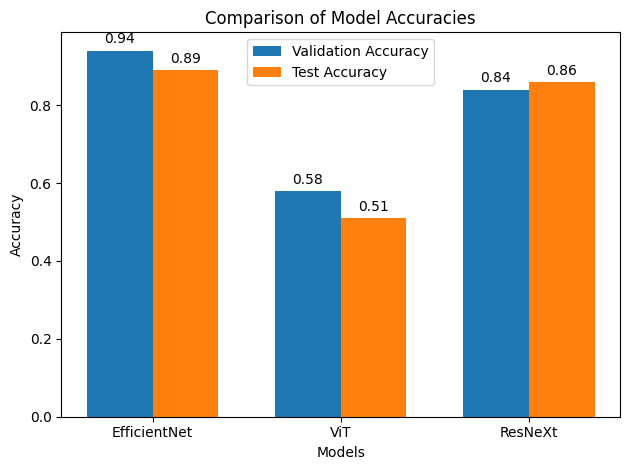

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['EfficientNet', 'ViT', 'ResNeXt']
validation_accuracies = [0.94, 0.58, 0.84]
test_accuracies = [0.89, 0.51, 0.86]

# Plotting
x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, validation_accuracies, width, label='Validation Accuracy')
bars2 = ax.bar(x + width/2, test_accuracies, width, label='Test Accuracy')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Model Accuracies')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Attach a text label above each bar in *bars*, displaying its height.
def attach_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

attach_labels(bars1)
attach_labels(bars2)

fig.tight_layout()

plt.show()



Extract SIFT features from images.
Use k-means clustering to create a visual vocabulary (Bag of Visual Words model).
Convert images into histograms of visual words.
Train an SVM classifier using these histograms.
Evaluate the classifier on the test set.

In [ ]:
# import os
# import cv2
# import numpy as np
# import pandas as pd
# from sklearn.preprocessing import LabelEncoder
# from sklearn.svm import SVC
# from sklearn.cluster import KMeans
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import classification_report, accuracy_score
# from tqdm import tqdm

# # Specify paths
# train_csv = '/content/train.csv'
# val_csv = '/content/val.csv'
# test_csv = '/content/test.csv'
# dataset_path = '/content/waste_images'  # Adjust this to your dataset path

# # Load CSV files
# train_df = pd.read_csv(train_csv)
# val_df = pd.read_csv(val_csv)
# test_df = pd.read_csv(test_csv)

# # Extract image paths and labels
# train_paths, train_labels = train_df['image_path'].values, train_df['label'].values
# val_paths, val_labels = val_df['image_path'].values, val_df['label'].values
# test_paths, test_labels = test_df['image_path'].values, test_df['label'].values

# # Encode labels
# label_encoder = LabelEncoder()
# train_labels_enc = label_encoder.fit_transform(train_labels)
# val_labels_enc = label_encoder.transform(val_labels)
# test_labels_enc = label_encoder.transform(test_labels)

# # Initialize SIFT detector
# sift = cv2.SIFT_create()

# # Function to extract SIFT features from an image
# def extract_sift_features(image_path):
#     img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
#     keypoints, descriptors = sift.detectAndCompute(img, None)
#     return descriptors

# # Extract SIFT features from all images
# def extract_features(image_paths):
#     all_descriptors = []
#     for image_path in tqdm(image_paths):
#         full_path = os.path.join(dataset_path, image_path)
#         descriptors = extract_sift_features(full_path)
#         if descriptors is not None:
#             all_descriptors.append(descriptors)
#     return all_descriptors

# train_descriptors = extract_features(train_paths)
# val_descriptors = extract_features(val_paths)
# test_descriptors = extract_features(test_paths)

# # Flatten the list of descriptors
# train_descriptors = [desc for descriptors in train_descriptors for desc in descriptors]
# val_descriptors = [desc for descriptors in val_descriptors for desc in descriptors]
# test_descriptors = [desc for descriptors in test_descriptors for desc in descriptors]

# # Use k-means clustering to create the visual vocabulary
# num_clusters = 100  # Adjust based on your needs
# kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=0)
# kmeans.fit(train_descriptors)

# # Function to convert an image to a histogram of visual words
# def compute_histogram(descriptors, kmeans, num_clusters):
#     histogram = np.zeros(num_clusters)
#     cluster_result = kmeans.predict(descriptors)
#     for i in cluster_result:
#         histogram[i] += 1.0
#     return histogram

# # Convert all images to histograms of visual words
# def create_histograms(descriptors_list, kmeans, num_clusters):
#     histograms = []
#     for descriptors in descriptors_list:
#         if descriptors is not None:
#             histogram = compute_histogram(descriptors, kmeans, num_clusters)
#             histograms.append(histogram)
#         else:
#             histograms.append(np.zeros(num_clusters))
#     return np.array(histograms)

# # Create histograms
# train_histograms = create_histograms(train_descriptors, kmeans, num_clusters)
# val_histograms = create_histograms(val_descriptors, kmeans, num_clusters)
# test_histograms = create_histograms(test_descriptors, kmeans, num_clusters)

# # Train an SVM classifier
# svm = make_pipeline(StandardScaler(), SVC(kernel='linear', probability=True))
# svm.fit(train_histograms, train_labels_enc)

# # Evaluate the classifier
# val_predictions = svm.predict(val_histograms)
# test_predictions = svm.predict(test_histograms)

# val_accuracy = accuracy_score(val_labels_enc, val_predictions)
# test_accuracy = accuracy_score(test_labels_enc, test_predictions)

# print(f"\nValidation Accuracy: {val_accuracy:.4f}")
# print(f"Test Accuracy: {test_accuracy:.4f}")

# # Print classification report for validation and test data
# val_report = classification_report(val_labels_enc, val_predictions, target_names=label_encoder.classes_)
# test_report = classification_report(test_labels_enc, test_predictions, target_names=label_encoder.classes_)

# # Save classification reports to text files
# val_report_path = '/content/validation_report.txt'
# test_report_path = '/content/test_report.txt'

# with open(val_report_path, 'w') as f:
#     f.write(val_report)

# with open(test_report_path, 'w') as f:
#     f.write(test_report)

# print(f"\nClassification Report for Validation Data saved to {val_report_path}")
# print(f"\nClassification Report for Test Data saved to {test_report_path}")


100%|██████████| 100/100 [00:03<00:00, 28.91it/s]
